In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import seaborn
import datetime
import random

<ipython-input-75-d168930f9365>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


# Analisi su indici

In [ ]:
indici=[["S&P500","^GSPC"],["FTSE UK","^FTSE"],["Russell 2000 USA small caps","^RUT"],
     ["STOXX 50 Europa","^STOXX50E"],["Nikkei Giaoppone","^N225"],["Hang Seng HK","^HSI"],
     ["SSE composite Cina","000001.SS"],["Bond US 1 anno","^IRX"],["Bond US 10 anni","^TNX"]] 
bond_tickers=["^IRX","^TNX"]
indici.append(["Bitcoin","BTC-EUR"])

nomi=list(np.array(indici)[:,0])
tickers=list(np.array(indici)[:,1])

In [ ]:
dati=yf.download(tickers)["Adj Close"]

[*********************100%***********************]  10 of 10 completed


In [ ]:
# rimetto a posto le colonne che non ho capito perché me le scombina
dati=dati.reindex(tickers, axis=1)

In [ ]:
dati.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25337 entries, 1927-12-30 to 2023-05-01
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ^GSPC      23946 non-null  float64
 1   ^FTSE      9933 non-null   float64
 2   ^RUT       8981 non-null   float64
 3   ^STOXX50E  4033 non-null   float64
 4   ^N225      14343 non-null  float64
 5   ^HSI       8969 non-null   float64
 6   000001.SS  6257 non-null   float64
 7   ^IRX       15843 non-null  float64
 8   ^TNX       15344 non-null  float64
 9   BTC-EUR    3149 non-null   float64
dtypes: float64(10)
memory usage: 2.1 MB


In [ ]:
dati

^GSPC        ^FTSE         ^RUT    ^STOXX50E         ^N225  \
Date                                                                           
1927-12-30    17.660000          NaN          NaN          NaN           NaN   
1928-01-03    17.760000          NaN          NaN          NaN           NaN   
1928-01-04    17.719999          NaN          NaN          NaN           NaN   
1928-01-05    17.549999          NaN          NaN          NaN           NaN   
1928-01-06    17.660000          NaN          NaN          NaN           NaN   
...                 ...          ...          ...          ...           ...   
2023-04-27  4135.350098  7831.600098  1751.219971  4358.049805  28457.679688   
2023-04-28  4169.479980  7870.600098  1768.989990  4359.310059  28856.439453   
2023-04-29          NaN          NaN          NaN          NaN           NaN   
2023-04-30          NaN          NaN          NaN          NaN           NaN   
2023-05-01          NaN          NaN  1775.248291          NaN  29123.179688   

                    ^HSI    000001.SS   ^IRX   ^TNX       BTC-EUR  
Date                                                               
1927-12-30           NaN          NaN    NaN    NaN           NaN  
1928-01-03           NaN          NaN    NaN    NaN           NaN  
1928-01-04           NaN          NaN    NaN    NaN           NaN  
1928-01-05           NaN          NaN    NaN    NaN           NaN  
1928-01-06           NaN          NaN    NaN    NaN           NaN  
...                  ...          ...    ...    ...           ...  
2023-04-27  19840.279297  3285.879883  5.000  3.528  25732.861328  
2023-04-28  19894.570312  3323.270020  4.923  3.452  26717.722656  
2023-04-29           NaN          NaN    NaN    NaN  26368.093750  
2023-04-30           NaN          NaN    NaN    NaN  26284.855469  
2023-05-01           NaN          NaN  4.948  3.477  25836.886719  

[25337 rows x 10 columns]

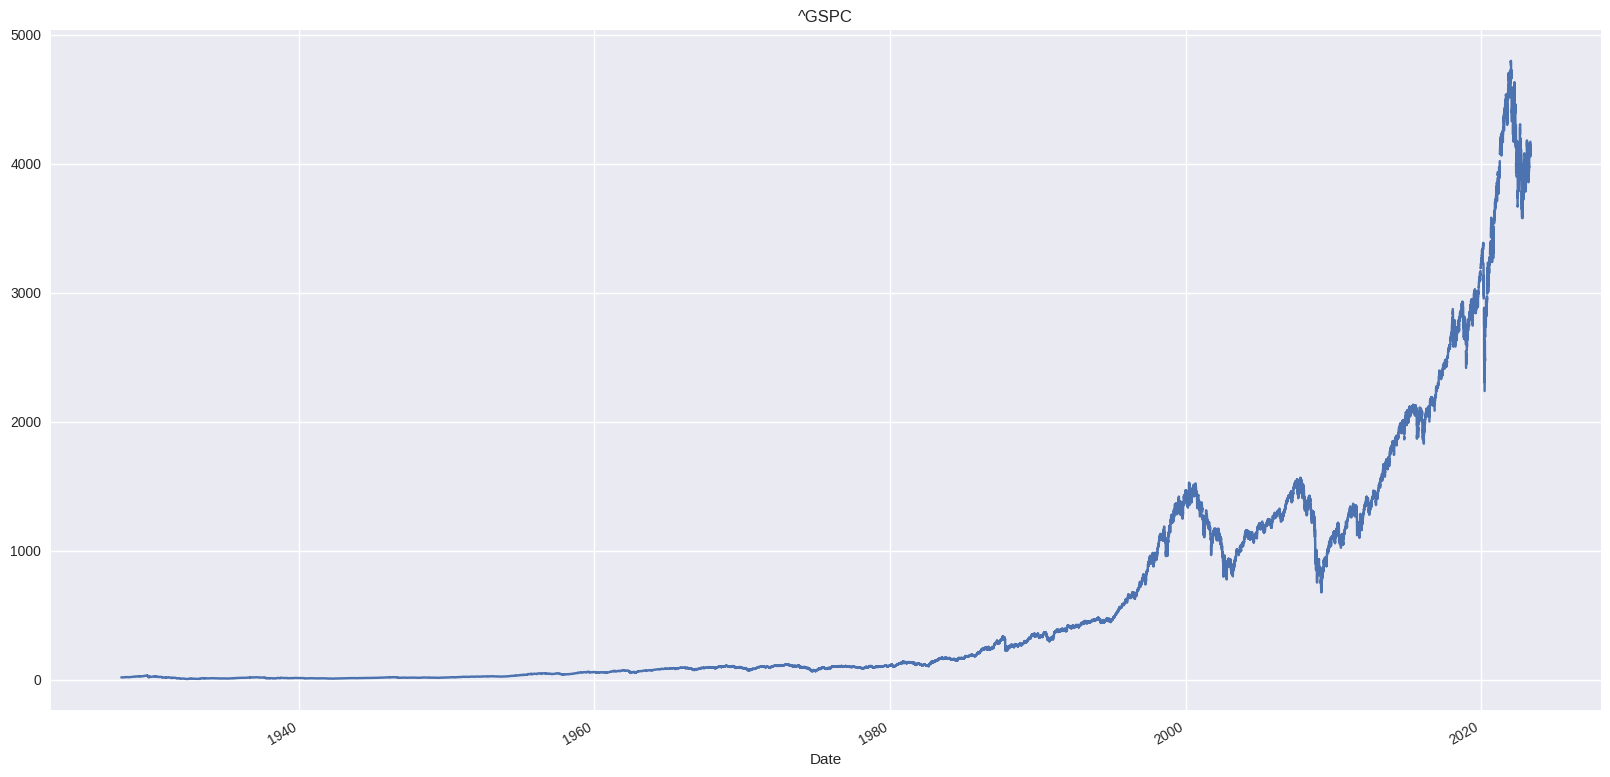

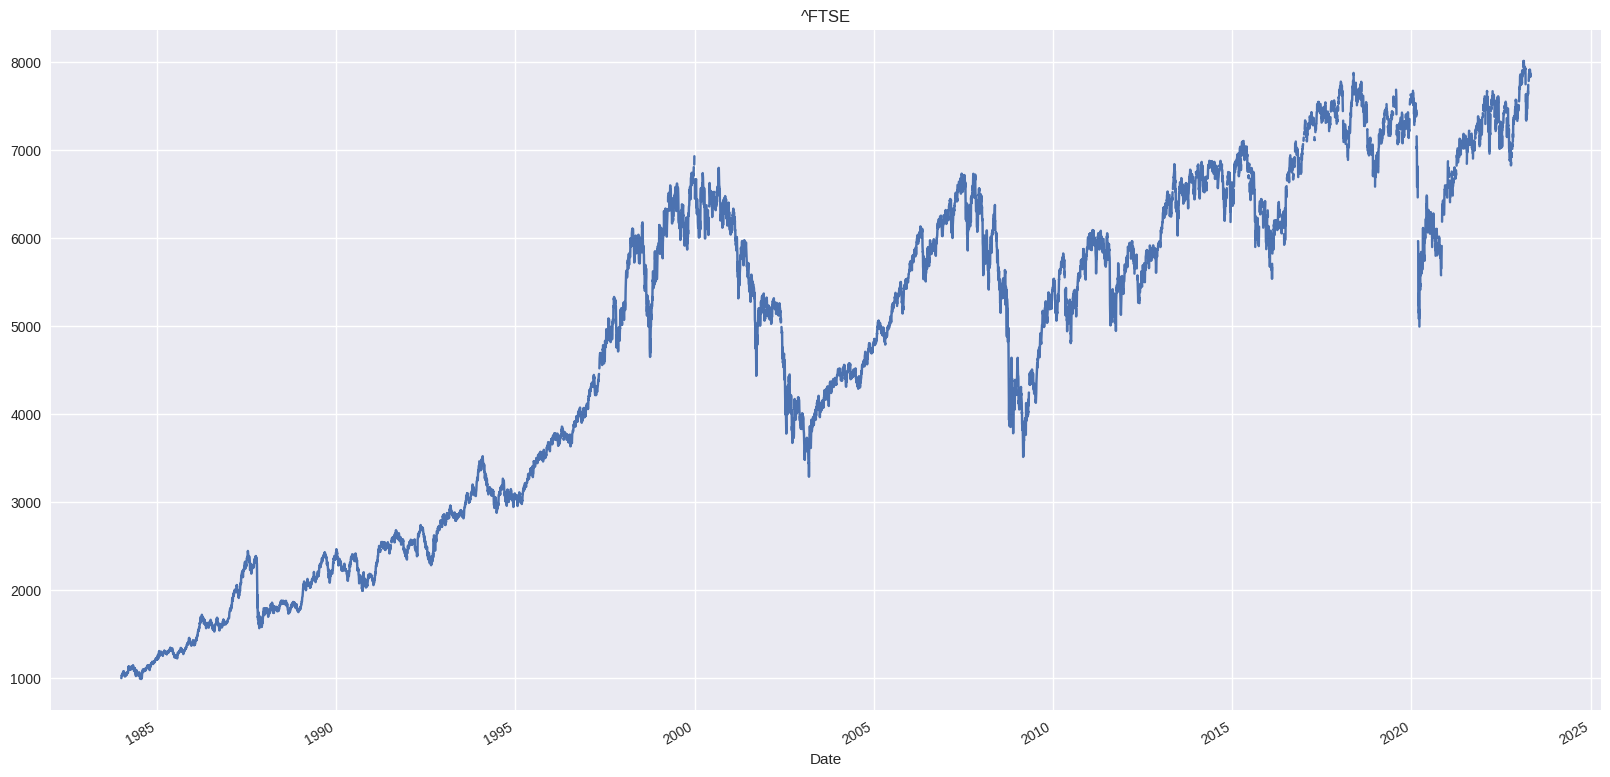

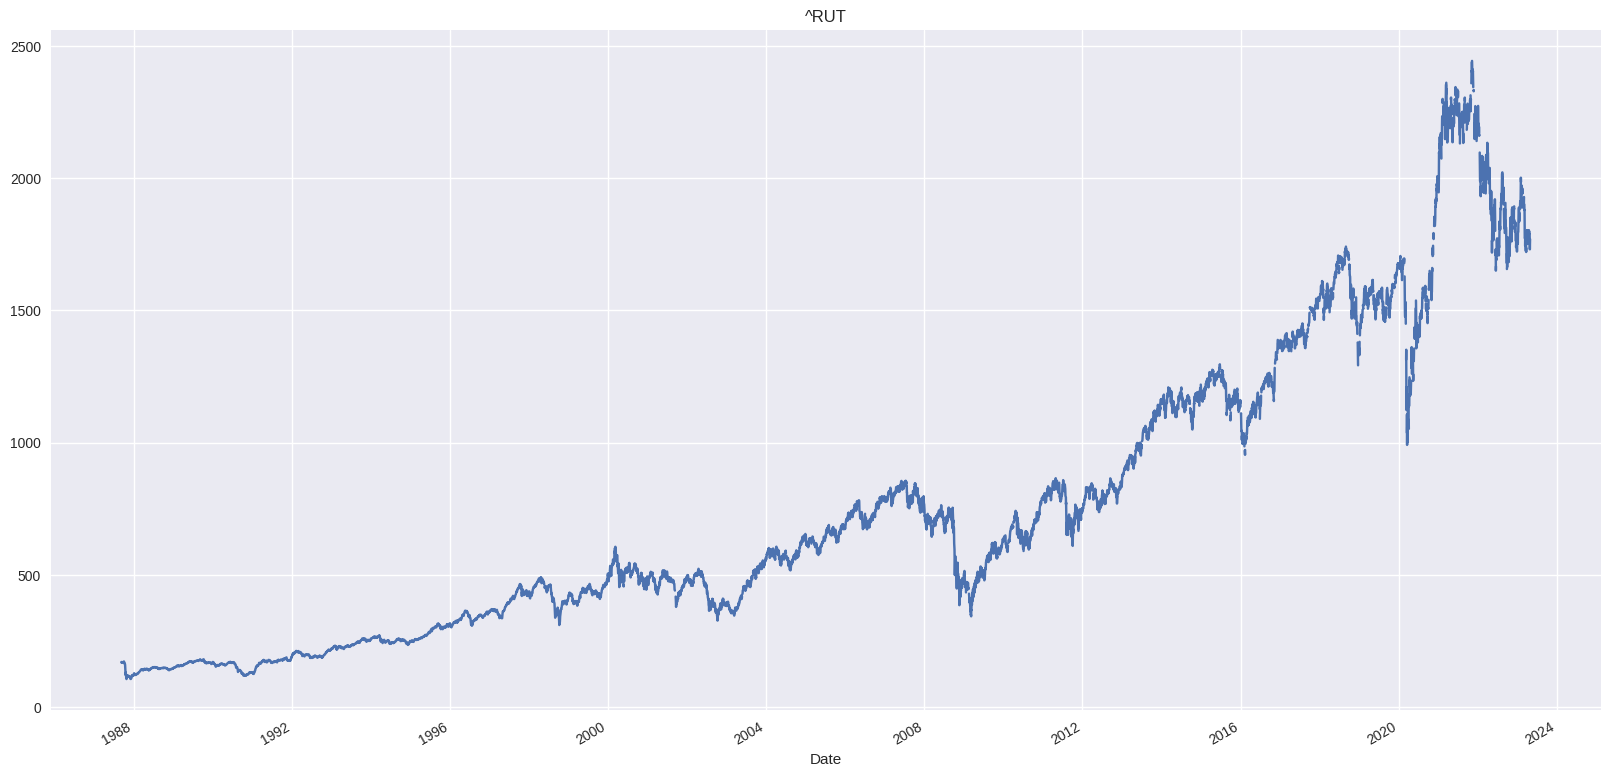

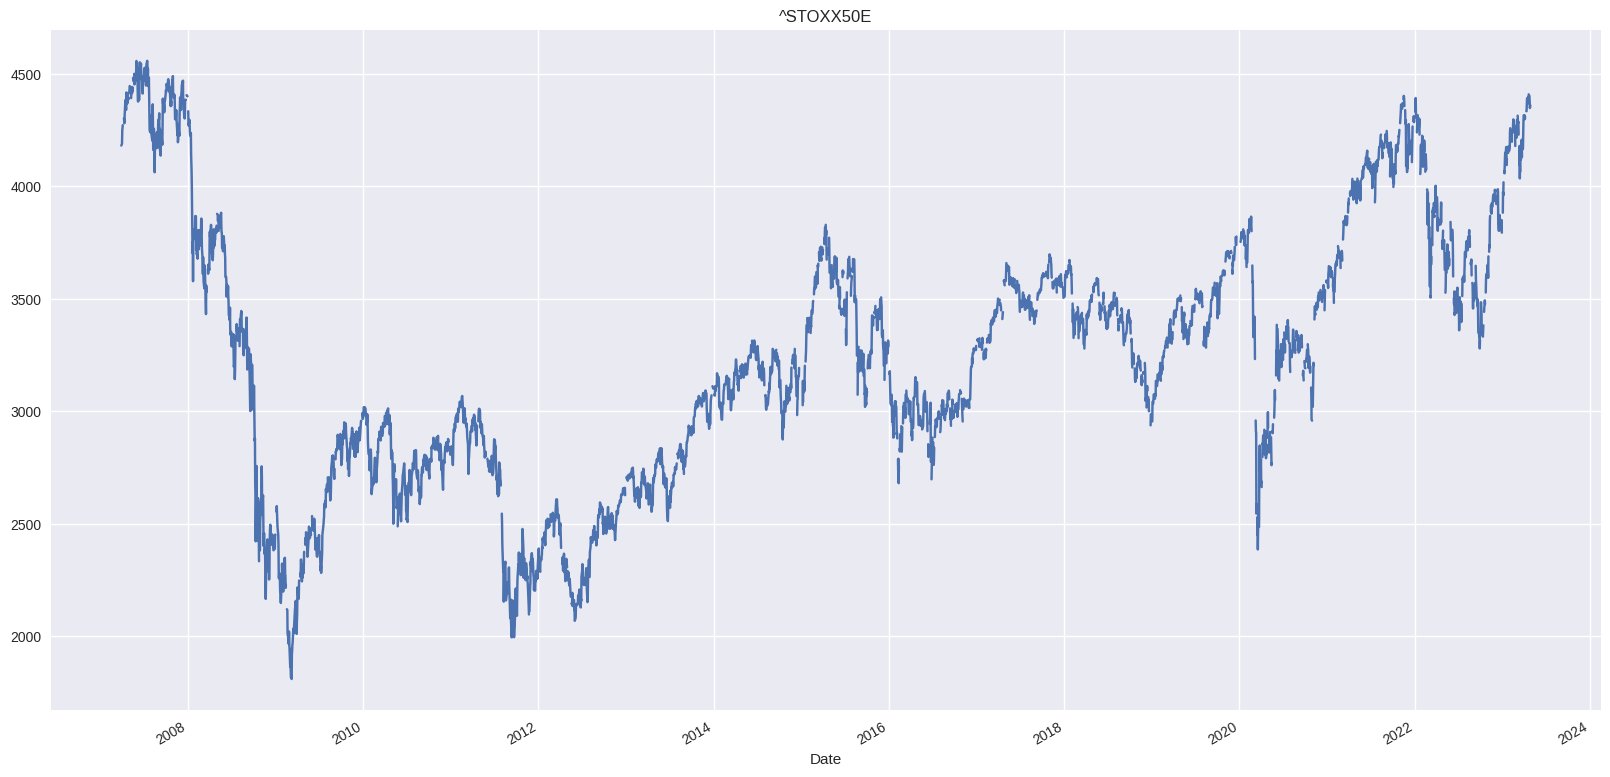

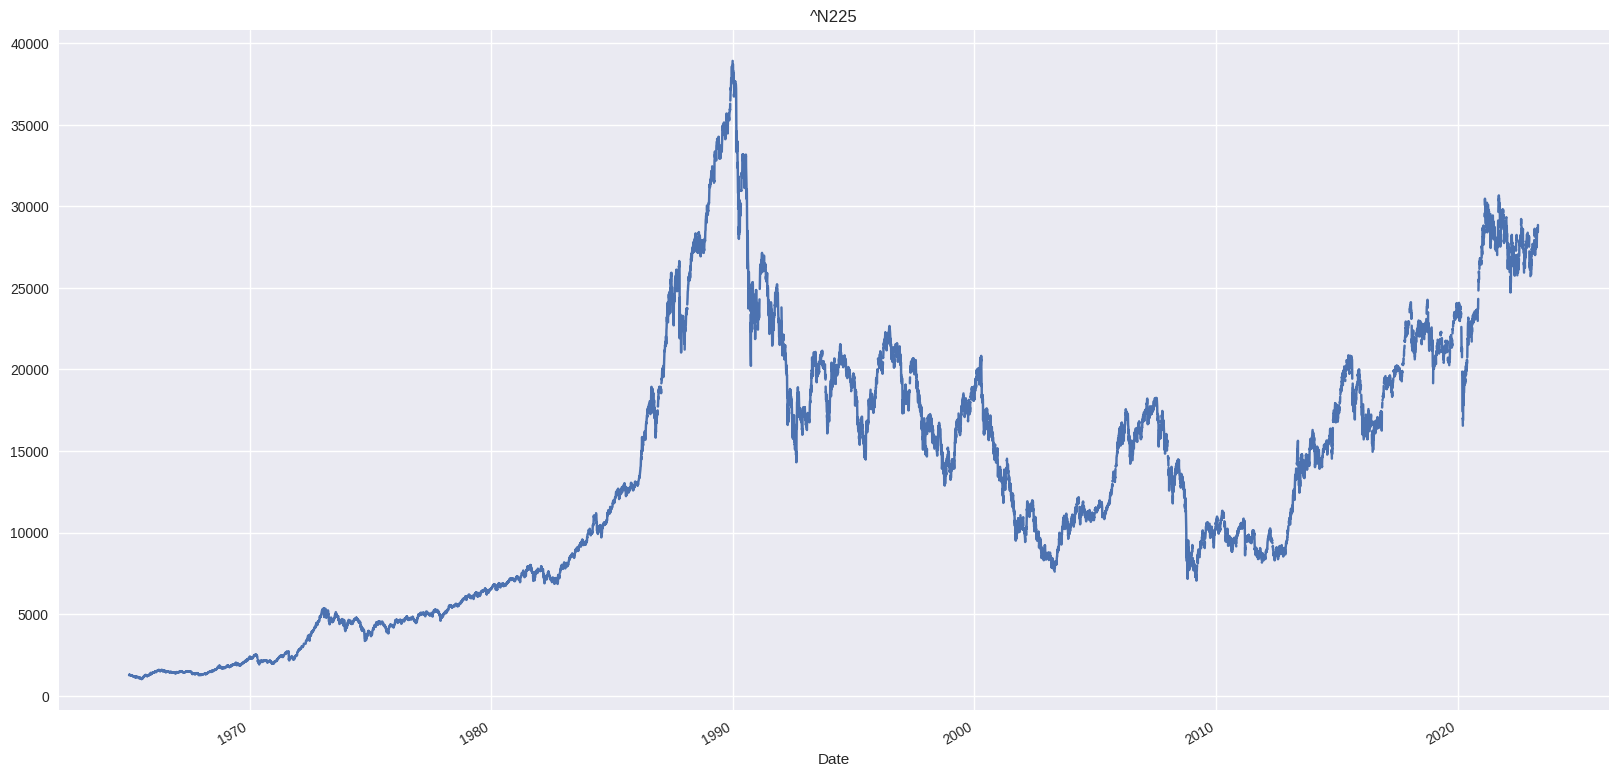

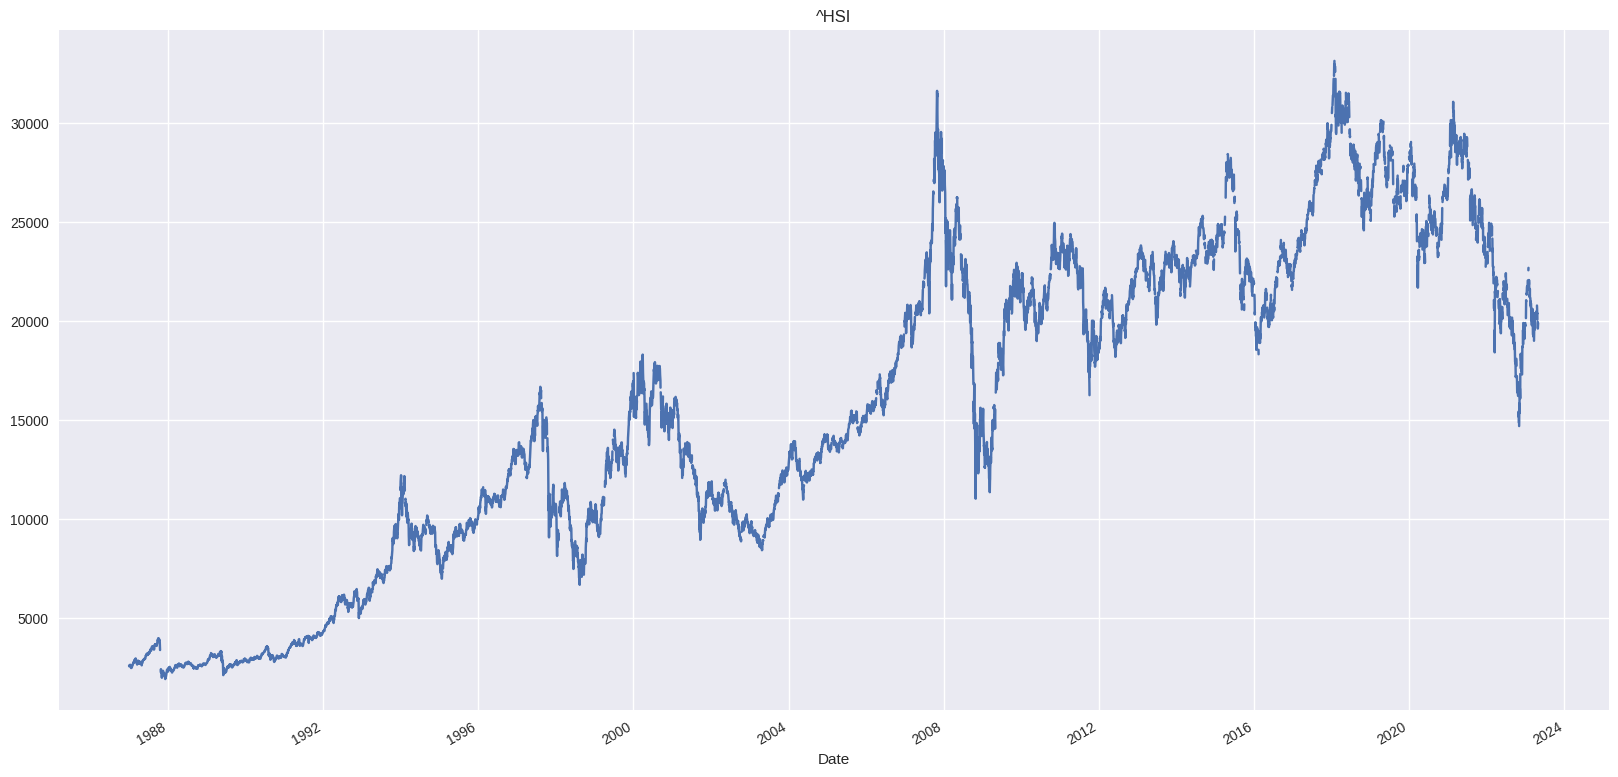

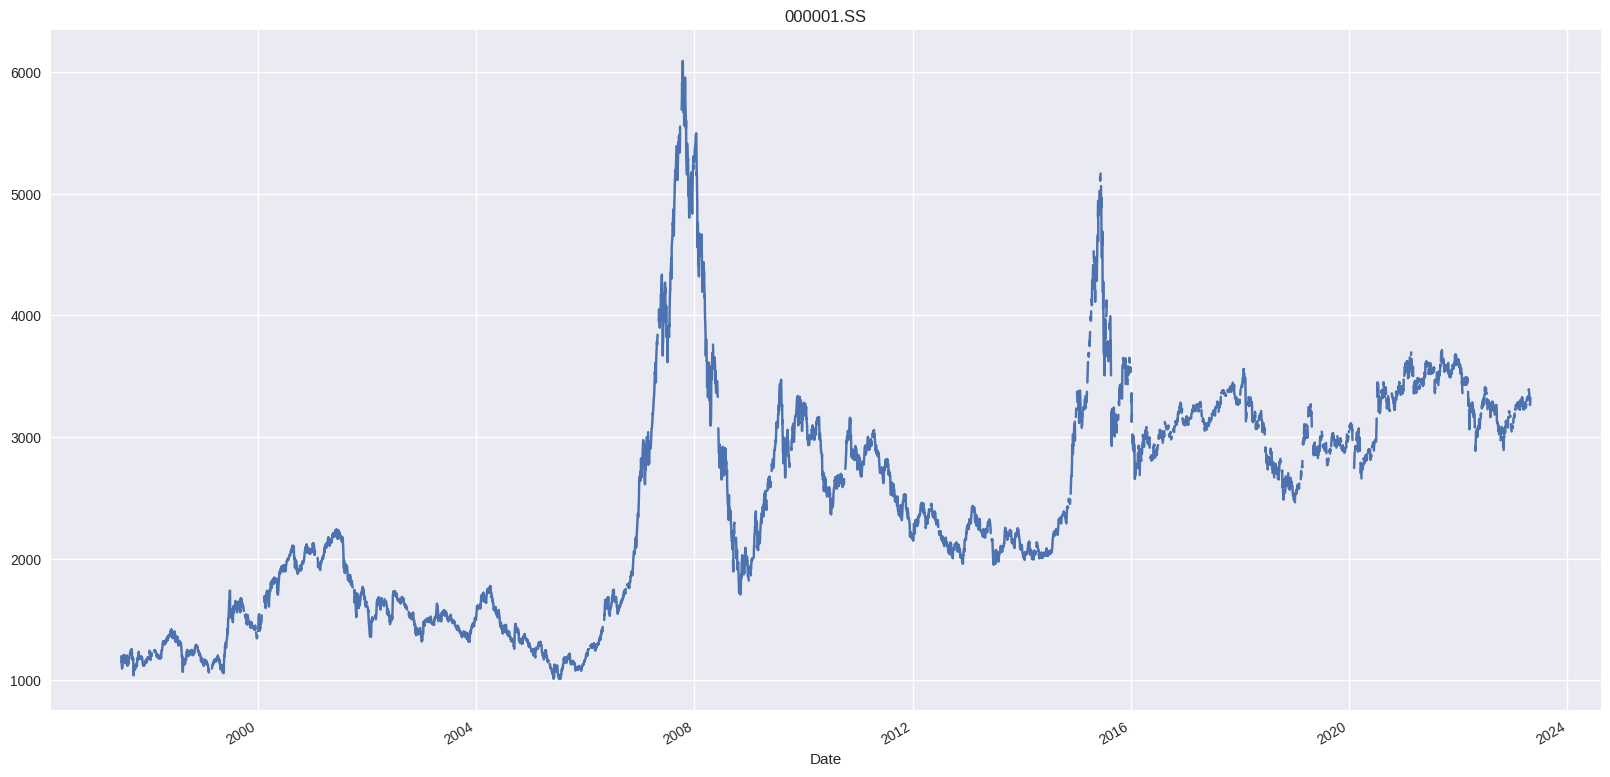

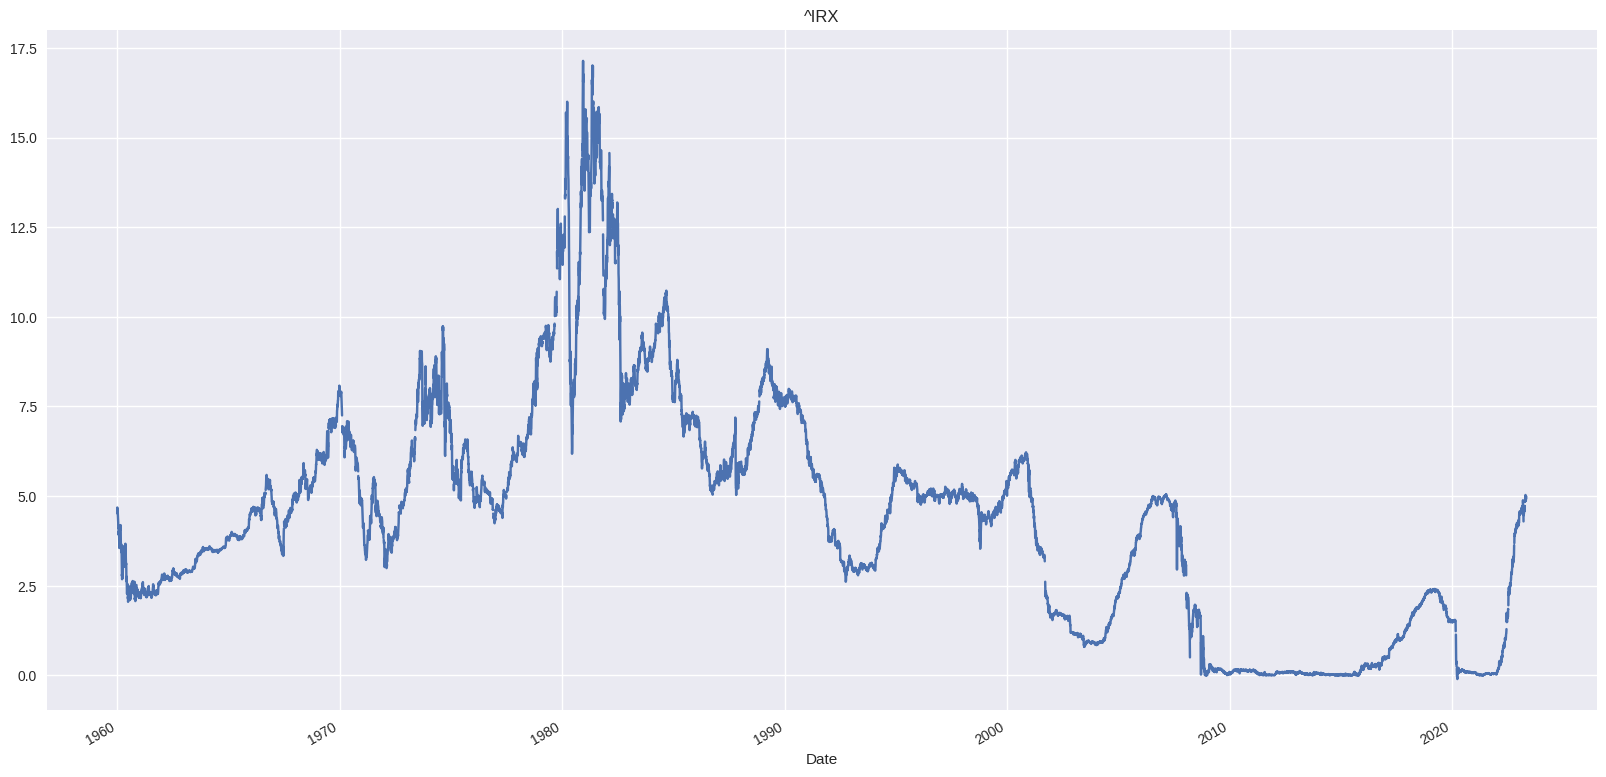

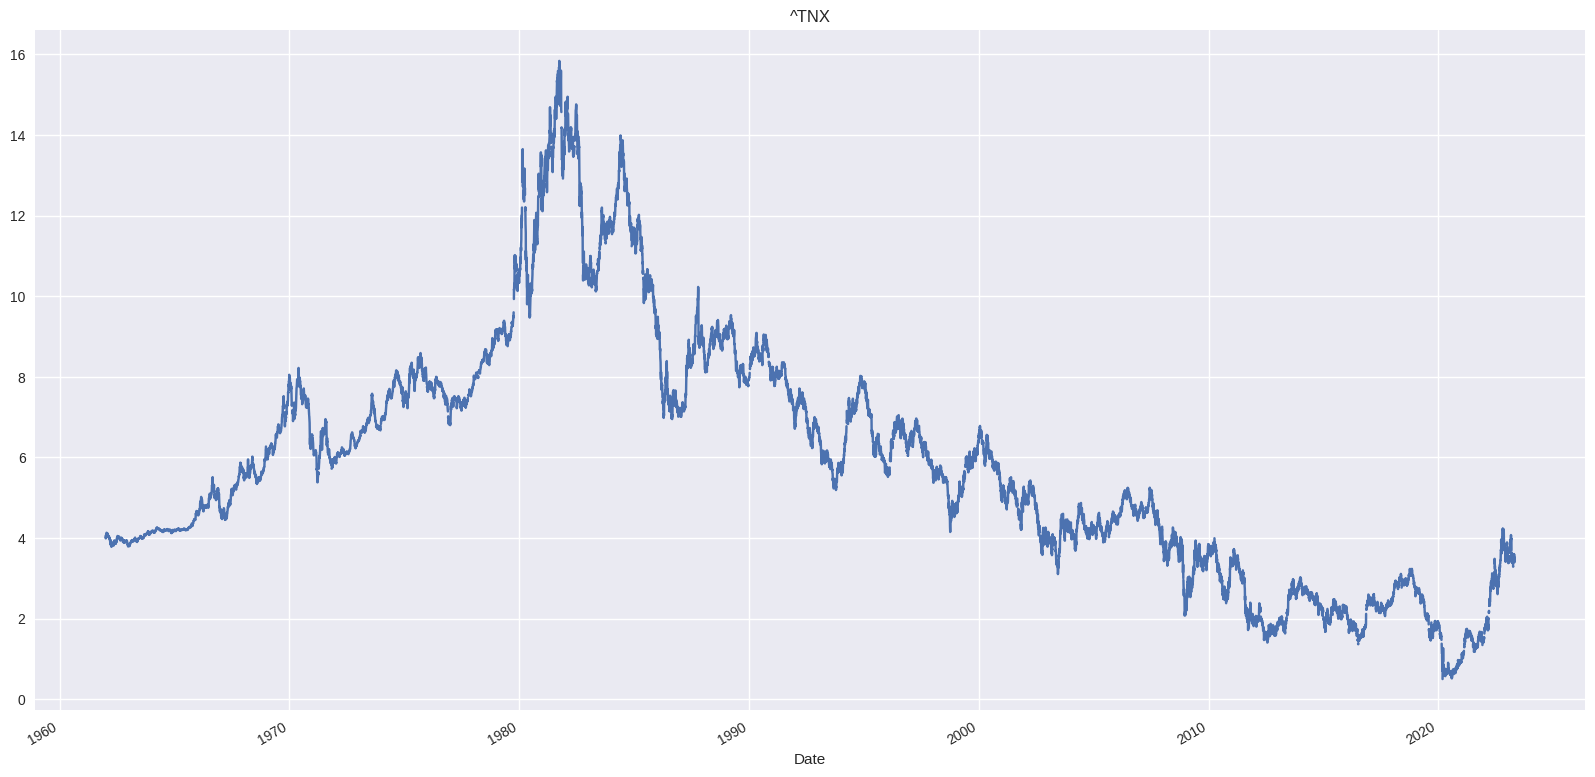

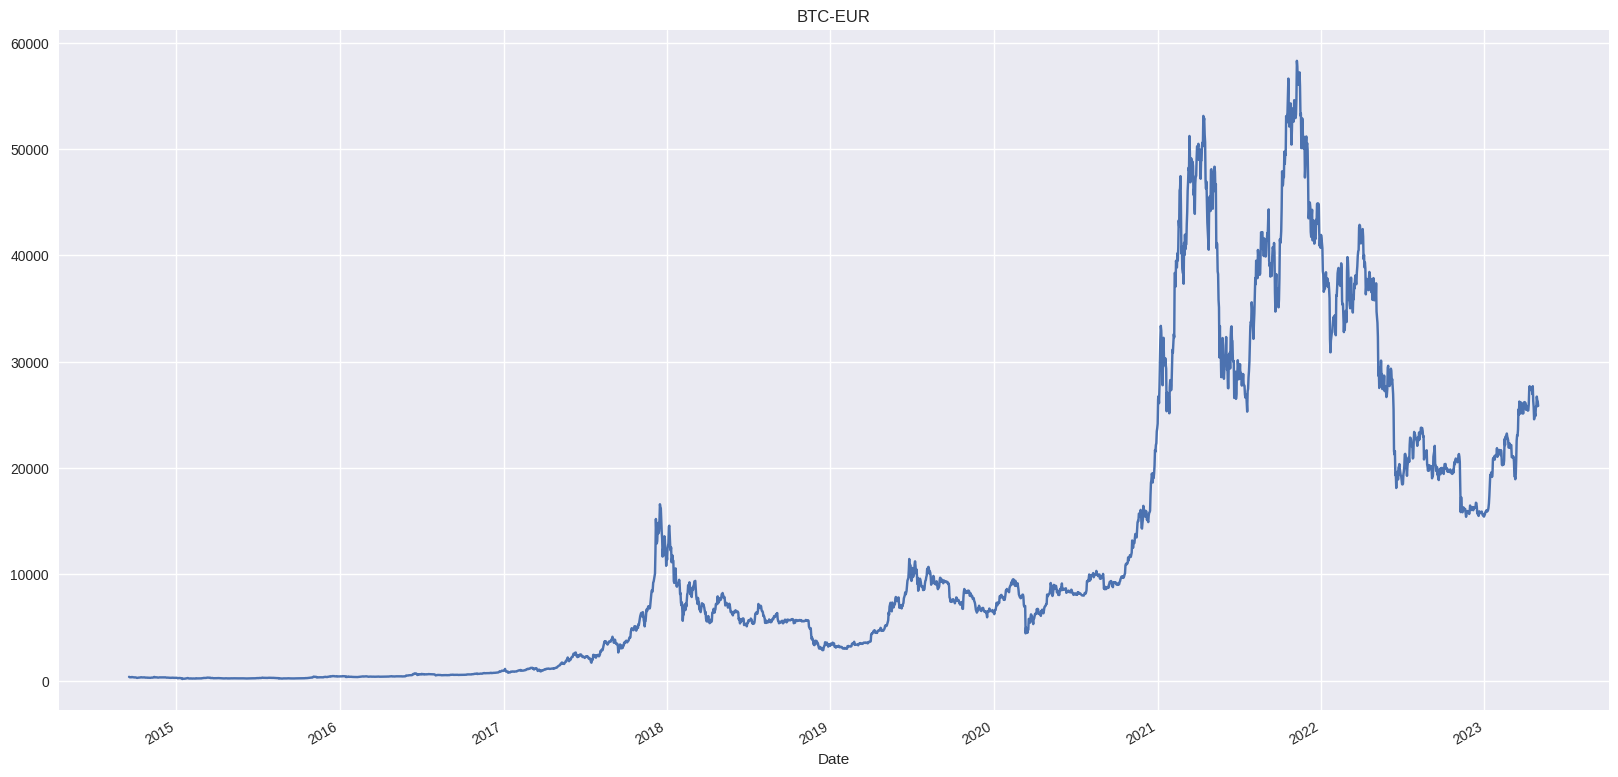

In [ ]:
for c in dati.columns:
  plt.figure()
  plt.title(c)
  dati[c].plot(figsize=(20,10))
  plt.show()

In [ ]:
# riempio i missing di al massimo una settimana
dati.ffill(limit=5,inplace=True)

In [ ]:
rendimenti = dati.pct_change(1)
# DEVO SISTEMARE I DATI SULLE OBBLIGAZIONI CHE NON SONO I PREZZI MA I RENDIMENTI!!!
rendimenti[bond_tickers] = (1+dati[bond_tickers]/100)**(1/253)-1

(rendimenti.mean()+1)**253-1

^GSPC        0.074432
^FTSE        0.062351
^RUT         0.082396
^STOXX50E    0.023188
^N225        0.069992
^HSI         0.082476
000001.SS    0.059292
^IRX         0.041343
^TNX         0.056455
BTC-EUR      0.695135
dtype: float64

<Axes: >

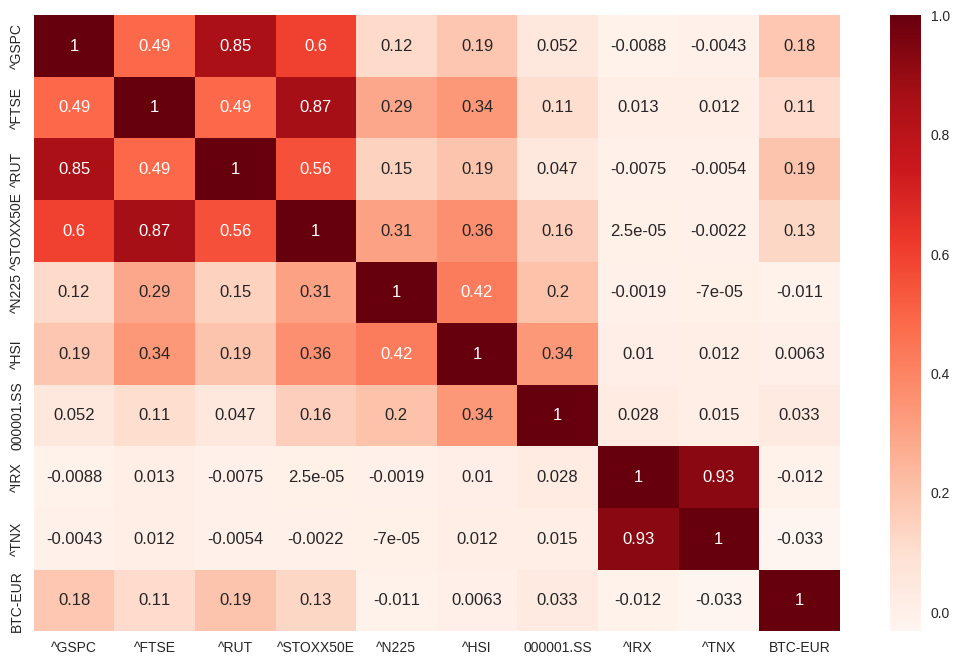

In [ ]:
plt.figure(figsize=(13,8))
#seaborn.set(font_scale=1.2)
seaborn.heatmap(rendimenti.corr(),cmap="Reds", annot=True, annot_kws={"size":12})

In [ ]:
# se io volessi analizzare tutti i portafogli equally weighted di N etf, quanti casi dovrei analizzare?
x=np.math.factorial(len(dati.columns))
for i in range(2,len(dati.columns)):
  print(i,x/np.math.factorial(len(dati.columns)-i))

2 90.0
3 720.0
4 5040.0
5 30240.0
6 151200.0
7 604800.0
8 1814400.0
9 3628800.0


In [ ]:
quante=10000
cov = rendimenti.cov()*100*253
medie = ((rendimenti.mean()+1)**253-1)*100
tabella = pd.DataFrame(columns=["rendimento","varianza","quasi Sharpe"]+nomi)
tabella1 = pd.DataFrame(columns=["rendimento","varianza","quasi Sharpe"]+nomi)
for k in range(len(dati.columns)):
  w = np.zeros(len(dati.columns))
  w[k]=1.00
  w = w/sum(w)
  rend = np.dot(medie,w)
  vol = np.dot(w,np.dot(cov,w))
  tabella1.loc[k]=[rend,vol,rend/vol]+list(w*100)
for k in range(quante):
#  w = np.random.random(len(dati.columns))
  w=np.random.normal(1,0.2,len(dati.columns))
  w[w>1]=w[w>1]-1
  w = w/sum(w)
  rend = np.dot(medie,w)
  vol = np.dot(w,np.dot(cov,w))
  tabella.loc[k]=[rend,vol,rend/vol]+list(w*100)
  if k%1000==0:
    print(k)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


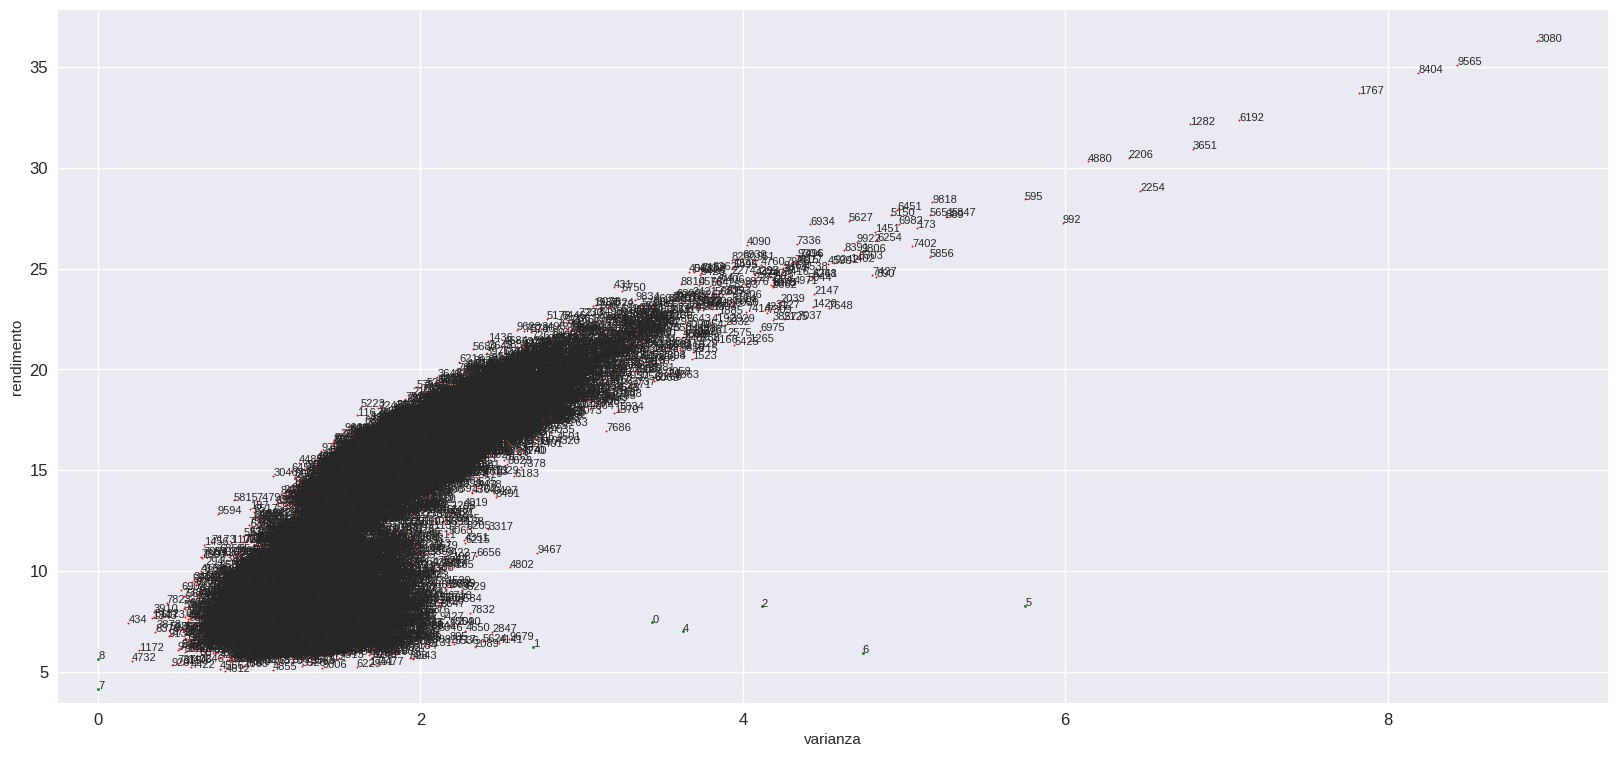

In [ ]:
ax = tabella.plot.scatter(x="varianza",y="rendimento", figsize=(20,9),fontsize=12,s=1,color="r")
axes = plt.gca()
x=axes.get_xlim()
y=axes.get_ylim()
tabella1.plot.scatter(ax=ax,x="varianza",y="rendimento", figsize=(20,9),fontsize=12,s=3,color="g",xlim=x,ylim=y)
for i in tabella.index:
    plt.annotate(i,xy=(tabella.loc[i,"varianza"],tabella.loc[i,"rendimento"]),size=8)
for i in tabella1.index:
    plt.annotate(i,xy=(tabella1.loc[i,"varianza"],tabella1.loc[i,"rendimento"]),size=8)

In [ ]:
tabella.loc[9594]

rendimento                     12.828290
varianza                        0.743509
quasi Sharpe                   17.253712
S&P500                          0.869048
FTSE UK                        12.061717
Russell 2000 USA small caps     1.406746
STOXX 50 Europa                 1.056853
Nikkei Giaoppone                0.713696
Hang Seng HK                   10.573109
SSE composite Cina              9.819124
Bond US 1 anno                 10.148294
Bond US 10 anni                42.492367
Bitcoin                        10.859045
Name: 9594, dtype: float64

In [ ]:
tabella1

rendimento  varianza  quasi Sharpe  S&P500  FTSE UK  \
0    7.730256  3.567048      2.167130   100.0      0.0   
1    6.807127  2.940420      2.315019     0.0    100.0   
2    9.071964  4.521402      2.006450     0.0      0.0   
3    2.829284  5.067512      0.558318     0.0      0.0   
4    7.433545  3.845382      1.933110     0.0      0.0   
5    9.075235  6.304288      1.439534     0.0      0.0   
6    6.757232  5.385199      1.254779     0.0      0.0   
7    4.307737  0.000363  11873.961570     0.0      0.0   
8    5.848918  0.000310  18870.152021     0.0      0.0   

   Russell 2000 USA small caps  STOXX 50 Europa  Nikkei Giaoppone  \
0                          0.0              0.0               0.0   
1                          0.0              0.0               0.0   
2                        100.0              0.0               0.0   
3                          0.0            100.0               0.0   
4                          0.0              0.0             100.0   
5                          0.0              0.0               0.0   
6                          0.0              0.0               0.0   
7                          0.0              0.0               0.0   
8                          0.0              0.0               0.0   

   Hang Seng HK  SSE composite Cina  Bond US 1 anno  Bond US 10 anni  
0           0.0                 0.0             0.0              0.0  
1           0.0                 0.0             0.0              0.0  
2           0.0                 0.0             0.0              0.0  
3           0.0                 0.0             0.0              0.0  
4           0.0                 0.0             0.0              0.0  
5         100.0                 0.0             0.0              0.0  
6           0.0               100.0             0.0              0.0  
7           0.0                 0.0           100.0              0.0  
8           0.0                 0.0             0.0            100.0

In [ ]:
tabella["rendimento"].idxmax(),tabella.loc[tabella["rendimento"].idxmax()]

(3080,
 rendimento                     36.280594
 varianza                        8.929793
 quasi Sharpe                    4.062871
 S&P500                          5.667051
 FTSE UK                         5.265078
 Russell 2000 USA small caps     3.479620
 STOXX 50 Europa                 6.613619
 Nikkei Giaoppone                6.038210
 Hang Seng HK                    5.591354
 SSE composite Cina             12.605696
 Bond US 1 anno                  0.331535
 Bond US 10 anni                 6.850442
 Bitcoin                        47.557397
 Name: 3080, dtype: float64)

In [ ]:
tabella["varianza"].idxmin(),tabella.loc[tabella["varianza"].idxmin()]

(5199,
 rendimento                      5.467645
 varianza                        0.102229
 quasi Sharpe                   53.484462
 S&P500                          7.502119
 FTSE UK                         0.370432
 Russell 2000 USA small caps     0.647326
 STOXX 50 Europa                 3.618447
 Nikkei Giaoppone                5.823952
 Hang Seng HK                    1.297650
 SSE composite Cina              4.157222
 Bond US 1 anno                 39.546135
 Bond US 10 anni                37.036718
 Name: 5199, dtype: float64)

In [ ]:
tabella["quasi Sharpe"].idxmax(),tabella.loc[tabella["quasi Sharpe"].idxmax()]

(5199,
 rendimento                      5.467645
 varianza                        0.102229
 quasi Sharpe                   53.484462
 S&P500                          7.502119
 FTSE UK                         0.370432
 Russell 2000 USA small caps     0.647326
 STOXX 50 Europa                 3.618447
 Nikkei Giaoppone                5.823952
 Hang Seng HK                    1.297650
 SSE composite Cina              4.157222
 Bond US 1 anno                 39.546135
 Bond US 10 anni                37.036718
 Name: 5199, dtype: float64)

# Analisi su ETF azionari geografici

In [ ]:
# escludo: replica swap, leva, settoriali, ESG e similari, strategie di trading, sotto 100M di capitalizzazione, identici ad altri indici
etf=[["iShares Core S&P 500","CSSPX",0.07,False],["iShares Core MSCI World","SWDA",0.20,True],["iShares Core MSCI Emerging Markets IMI","EIMI",0.18,True],
     ["iShares Nasdaq 100","CSNDX",0.33,False],["iShares MSCI ACWI","IUSQ",0.20,True],["Vanguard FTSE All-World","VWCE",0.22,True],
     ["iShares Core DAX","EXS1",0.16,False],["Lyxor Core STOXX Europe 600 (DR)","MEUD",0.07,True],["iShares Core MSCI Europe","SMEA",0.12,True],
     ["Xtrackers MSCI USA","XD9U",0.07,False],["Xtrackers MSCI Emerging Markets","XMME",0.18,True],["iShares Core EURO STOXX 50","CSSX5E",0.10,True],
     ["iShares Edge MSCI World Value Factor","IWVL",0.30,True],["iShares Core MSCI Japan IMI","SJPA",0.15,False],["iShares Core MSCI EMU","CSEMU",0.12,True],
     ["iShares Edge MSCI World Minimum Volatility","MVOL",0.30,True],["iShares Edge MSCI Europe Value Factor","IEVL",0.25,True],["iShares MSCI China A","36BZ",0.40,False],
     ["iShares Core MSCI Pacific ex Japan","CSPXJ",0.20,True],["Xtrackers S&P 500 Equal Weight","XDEW",0.20,False],["iShares MSCI World Small Cap","IUSN",0.35,True],
     ["iShares Edge MSCI World Quality Factor","IWQU",0.30,True],["iShares MSCI EM Asia","CSEMAS",0.20,True],["UBS ETF (LU) MSCI UK","UKGBPB",0.20,False],
     ["SPDR S&P 400 US Mid Cap","SPY4",0.30,False],["iShares Edge S&P 500 Minimum Volatility","MVUS",0.20,False],["iShares MSCI India","QDV5",0.65,False],
     ["UBS ETF (LU) MSCI Switzerland 20/35","SW2CHB",0.20,False],["SPDR Russell 2000 US Small Cap","R2US",0.30,False],["iShares MSCI Canada","CSCA",0.48,False],
     ["Xtrackers MSCI China","XCS6",0.65,False],["Amundi CAC 40","C40",0.25,False],["Xtrackers MSCI Europe Small Cap","XXSC",0.30,True],
     ["Vanguard FTSE North America","VNRA",0.10,True],["Amundi ETF MSCI Europe Value Factor","VCEU",0.23,True],["Amundi MSCI Europe Quality Factor","QCEU",0.23,True],
     ["iShares MSCI Australia","SAUS",0.50,False],["Amundi ETF MSCI World ex EMU","CM9",0.35,True],["Shares MSCI Saudi Arabia Capped","IUSS",0.60,False],
     ["Franklin FTSE Korea","FLXK",0.09,False],["WisdomTree US Quality Dividend Growth","DGRA",0.33,False],["Lyxor MSCI Brazil","BRA",0.65,False],
     ["Lyxor MSCI Emerging Markets Ex China","EMXC",0.15,True],["Vanguard FTSE Emerging Markets","VFEA",0.22,True],["iShares Edge MSCI World Size Factor","IWSZ",0.30,False],
     ["Amundi Japan Topix","XAMY",0.20,False],["Vanguard FTSE Developed Europe ex UK","VERE",0.10,False],["Fidelity US Quality Income","FUSA",0.25,False],
     ["Franklin FTSE China","FLXC",0.19,False],["iShares MSCI UK Small Cap","SXRD",0.58,False],["Franklin FTSE India","FLXI",0.19,False],
     ["iShares Nikkei 225","CSNKY",0.48,False],["Amundi MSCI Nordic","CN1",0.25,False],["iShares Edge MSCI Europe Multifactor","IFSE",0.45,True],
     ["Amundi MSCI Europe Minimum Volatility Factor","MIVO",0.23,True],["iShares MSCI EMU Large Cap","EMUL",0.49,True],["Xtrackers MSCI North America High Dividend Yield","XDND",0.39,False],
     ["Amundi ETF MSCI Switzerland","18MN",0.25,False],["iShares MSCI EMU Mid Cap","IS3H",0.49,True],["iShares MSCI Korea","CSKR",0.65,False],
     ["SPDR MSCI Europe Small Cap","SMCX",0.30,True],["Xtrackers MSCI Mexico","XMEX",0.65,False],["Lyxor MSCI Eastern Europe ex Russia","EST",0.50,False],
     ["iShares Edge MSCI USA Size Factor","QDVC",0.20,False],["SPDR MSCI USA Value Weighted","ZPRU",0.20,False],["Xtrackers MSCI Taiwan","XMTW",0.65,False]]
# da esludere: tutti quelli che pur avendo un indice diverso si sovrappongono e tutti quelli globali che hanno sotto coperto da altri con ter dignitosi e quelli "excluding" se non servono
etf=[["iShares Core S&P 500","CSSPX",0.07,False],["iShares Nasdaq 100","CSNDX",0.33,False],["iShares Core DAX","EXS1",0.16,False],["iShares Core MSCI Japan IMI","SJPA",0.15,False],
     ["iShares Edge MSCI Europe Value Factor","IEVL",0.25,True],["iShares MSCI China A","36BZ",0.40,False],["iShares Core MSCI Pacific ex Japan","CSPXJ",0.20,True],
     ["Xtrackers S&P 500 Equal Weight","XDEW",0.20,False],["UBS ETF (LU) MSCI UK","UKGBPB",0.20,False],
     ["SPDR S&P 400 US Mid Cap","SPY4",0.30,False],["iShares Edge S&P 500 Minimum Volatility","MVUS",0.20,False],["iShares MSCI India","QDV5",0.65,False],
     ["UBS ETF (LU) MSCI Switzerland 20/35","SW2CHB",0.20,False],["SPDR Russell 2000 US Small Cap","R2US",0.30,False],["iShares MSCI Canada","CSCA",0.48,False],["Amundi CAC 40","C40",0.25,False],["Xtrackers MSCI Europe Small Cap","XXSC",0.30,True],
     ["Amundi ETF MSCI Europe Value Factor","VCEU",0.23,True],["Amundi MSCI Europe Quality Factor","QCEU",0.23,True],["iShares MSCI Australia","SAUS",0.50,False],
     ["Shares MSCI Saudi Arabia Capped","IUSS",0.60,False],["Franklin FTSE Korea","FLXK",0.09,False],["WisdomTree US Quality Dividend Growth","DGRA",0.33,False],
     ["Lyxor MSCI Brazil","BRA",0.65,False],["iShares MSCI UK Small Cap","SXRD",0.58,False],["Amundi MSCI Nordic","CN1",0.25,False],
     ["Amundi MSCI Europe Minimum Volatility Factor","MIVO",0.23,True],["iShares MSCI EMU Large Cap","EMUL",0.49,True],["Xtrackers MSCI North America High Dividend Yield","XDND",0.39,False],
     ["iShares MSCI EMU Mid Cap","IS3H",0.49,True],["Xtrackers MSCI Mexico","XMEX",0.65,False],["Lyxor MSCI Eastern Europe ex Russia","EST",0.50,False],["iShares Edge MSCI USA Size Factor","QDVC",0.20,False],
     ["SPDR MSCI USA Value Weighted","ZPRU",0.20,False],["Xtrackers MSCI Taiwan","XMTW",0.65,False]]
# escludiamo anche le versioni su base di criteri contabili e quelle lievemente sovrapposte (addio Nasdaq), tengo solo le small caps Russell
etf=[["iShares Core S&P 500","CSSPX",0.07,False],["iShares Core DAX","EXS1",0.16,False],["iShares Core MSCI Japan IMI","SJPA",0.15,False],
     ["iShares MSCI China A","36BZ",0.40,False],["UBS ETF (LU) MSCI UK","UKGBPB",0.20,False],["iShares MSCI India","QDV5",0.65,False],
     ["UBS ETF (LU) MSCI Switzerland 20/35","SW2CHB",0.20,False],["SPDR Russell 2000 US Small Cap","R2US",0.30,False],["iShares MSCI Canada","CSCA",0.48,False],
     ["Amundi CAC 40","C40",0.25,False],["iShares MSCI Australia","SAUS",0.50,False],["Shares MSCI Saudi Arabia Capped","IUSS",0.60,False],["Franklin FTSE Korea","FLXK",0.09,False],["Lyxor MSCI Brazil","BRA",0.65,False],
     ["Amundi MSCI Nordic","CN1",0.25,False],["Xtrackers MSCI Mexico","XMEX",0.65,False],["Lyxor MSCI Eastern Europe ex Russia","EST",0.50,False],
     ["Xtrackers MSCI Taiwan","XMTW",0.65,False]]


nomi=list(np.array(etf)[:,0])
tickers=list(np.array(etf)[:,1])
ter=list(np.array(etf)[:,2])
globali=list(np.array(etf)[:,3])
tickersMI=[t + ".MI" for t in tickers]
tickersF=[t + ".F" for t in tickers]
tickersPA=[t + ".PA" for t in tickers]


In [ ]:
datiMI=yf.download(tickersMI)["Adj Close"]
datiF=yf.download(tickersF)["Adj Close"]
datiPA=yf.download(tickersPA)["Adj Close"]

[*********************100%***********************]  18 of 18 completed

3 Failed downloads:
- QDV5.MI: No timezone found, symbol may be delisted
- IUSS.MI: No timezone found, symbol may be delisted
- 36BZ.MI: No timezone found, symbol may be delisted
[*********************100%***********************]  18 of 18 completed

12 Failed downloads:
- CSSPX.F: No timezone found, symbol may be delisted
- UKGBPB.F: No timezone found, symbol may be delisted
- CSCA.F: No timezone found, symbol may be delisted
- SAUS.F: No timezone found, symbol may be delisted
- XMTW.F: No timezone found, symbol may be delisted
- SW2CHB.F: No timezone found, symbol may be delisted
- R2US.F: No timezone found, symbol may be delisted
- C40.F: No timezone found, symbol may be delisted
- EST.F: No timezone found, symbol may be delisted
- SJPA.F: No timezone found, symbol may be delisted
- CN1.F: No timezone found, symbol may be delisted
- XMEX.F: No timezone found, symbol may be delisted
[*********************100%****

In [ ]:
# rimetto a posto le colonne che non ho capito perché me le scombina
datiMI=datiMI.reindex(tickersMI, axis=1)
datiPA=datiPA.reindex(tickersPA, axis=1)
datiF=datiF.reindex(tickersF, axis=1)
# cambio i nomi alle colonne mettendoli uguali
datiMI.rename(columns = dict(zip(tickersMI, tickers)),inplace=True)
datiF.rename(columns = dict(zip(tickersF, tickers)),inplace=True)
datiPA.rename(columns = dict(zip(tickersPA, tickers)),inplace=True)
# stesso indice per tutti!
dati = datiMI.reindex( index=datiMI.index.union(datiPA.index).union(datiF.index) )
datiPA = datiPA.reindex( index=dati.index )
datiF = datiF.reindex( index=dati.index )

In [ ]:
# BRA.F non è BRA.MI.... 'azzo di tickers e chi li ha inventati!
if "BRA" in tickers:
  datiF["BRA"]=np.nan

# mi vergogno di questo pezzo qui sotto...
for i in dati.index:
  for c in dati:
    if np.isnan(dati[c].loc[i]):
      if not np.isnan(datiF[c].loc[i]):
        dati[c].loc[i] = datiF[c].loc[i]
      elif not np.isnan(datiPA[c].loc[i]):
        dati[c].loc[i] = datiPA[c].loc[i]
dati        

CSSPX        EXS1       SJPA    36BZ     UKGBPB   QDV5  \
Date                                                                      
2008-01-02         NaN         NaN        NaN     NaN        NaN    NaN   
2008-01-03         NaN         NaN        NaN     NaN        NaN    NaN   
2008-01-04         NaN         NaN        NaN     NaN        NaN    NaN   
2008-01-07         NaN         NaN        NaN     NaN        NaN    NaN   
2008-01-08         NaN         NaN        NaN     NaN        NaN    NaN   
...                ...         ...        ...     ...        ...    ...   
2023-04-24  380.549988  125.800003  41.384998  4.3810  30.860001  6.234   
2023-04-25  380.549988  125.800003  41.384998  4.3360  30.860001  6.246   
2023-04-26  380.549988  125.800003  41.384998  4.3310  30.860001  6.234   
2023-04-27  380.549988  125.800003  41.384998  4.3605  30.860001  6.292   
2023-04-28  380.549988  125.800003  41.384998  4.4035        NaN  6.358   

            SW2CHB    R2US        CSCA         C40       SAUS   IUSS  \
Date                                                                   
2008-01-02     NaN     NaN         NaN   55.610001        NaN    NaN   
2008-01-03     NaN     NaN         NaN   55.570000        NaN    NaN   
2008-01-04     NaN     NaN         NaN   54.570000        NaN    NaN   
2008-01-07     NaN     NaN         NaN   54.630001        NaN    NaN   
2008-01-08     NaN     NaN         NaN   55.060001        NaN    NaN   
...            ...     ...         ...         ...        ...    ...   
2023-04-24   24.43  45.125  146.839996  110.300003  39.205002  5.539   
2023-04-25   24.43  45.125  146.839996  110.300003  39.205002  5.580   
2023-04-26   24.43  45.125  146.839996  110.300003  39.205002  5.556   
2023-04-27   24.43  45.125  146.839996  110.300003  39.205002  5.539   
2023-04-28   24.43  45.125  146.839996  110.300003  39.205002  5.550   

                 FLXK        BRA         CN1  XMEX    EST   XMTW  
Date                                                              
2008-01-02        NaN        NaN         NaN   NaN    NaN  11.81  
2008-01-03        NaN        NaN         NaN   NaN    NaN  11.46  
2008-01-04        NaN        NaN         NaN   NaN    NaN  11.45  
2008-01-07        NaN        NaN         NaN   NaN    NaN  11.45  
2008-01-08        NaN        NaN         NaN   NaN    NaN  11.14  
...               ...        ...         ...   ...    ...    ...  
2023-04-24  27.745001  16.698000  539.200012  5.54  15.74    NaN  
2023-04-25  27.745001  16.572001  539.200012  5.54  15.74    NaN  
2023-04-26  27.745001  16.514000  539.200012  5.54  15.74    NaN  
2023-04-27  27.745001  16.642000  539.200012  5.54  15.74    NaN  
2023-04-28  27.745001  16.780001  539.200012  5.54  15.74    NaN  

[3925 rows x 18 columns]

In [ ]:
dati.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3925 entries, 2008-01-02 00:00:00 to 2023-04-28 00:00:00
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CSSPX   3293 non-null   float64
 1   EXS1    3860 non-null   float64
 2   SJPA    3378 non-null   float64
 3   36BZ    2048 non-null   float64
 4   UKGBPB  2426 non-null   float64
 5   QDV5    1249 non-null   float64
 6   SW2CHB  2408 non-null   float64
 7   R2US    1847 non-null   float64
 8   CSCA    3386 non-null   float64
 9   C40     3919 non-null   float64
 10  SAUS    2290 non-null   float64
 11  IUSS    1030 non-null   float64
 12  FLXK    996 non-null    float64
 13  BRA     1050 non-null   float64
 14  CN1     3738 non-null   float64
 15  XMEX    3153 non-null   float64
 16  EST     1050 non-null   float64
 17  XMTW    2771 non-null   float64
dtypes: float64(18)
memory usage: 711.7+ KB


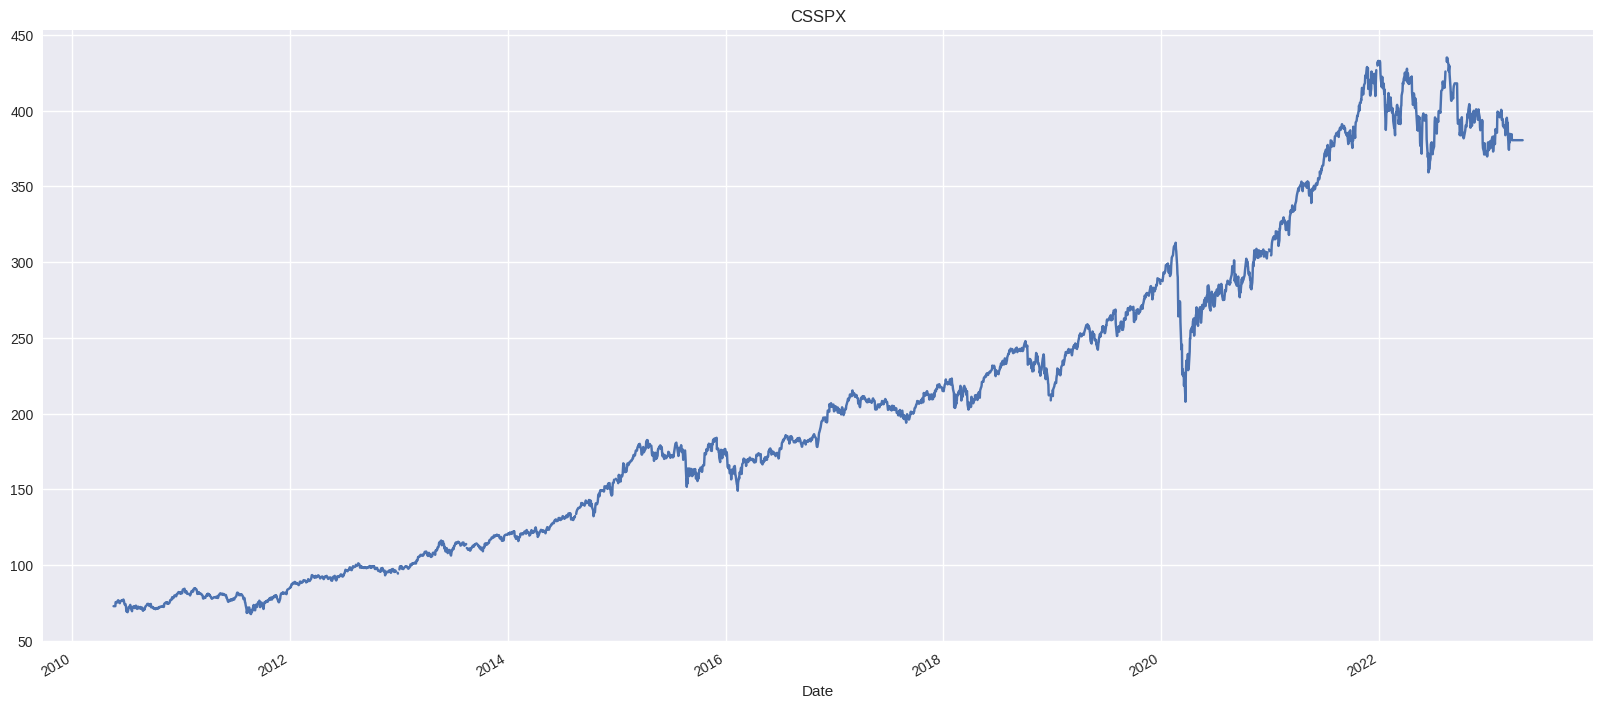

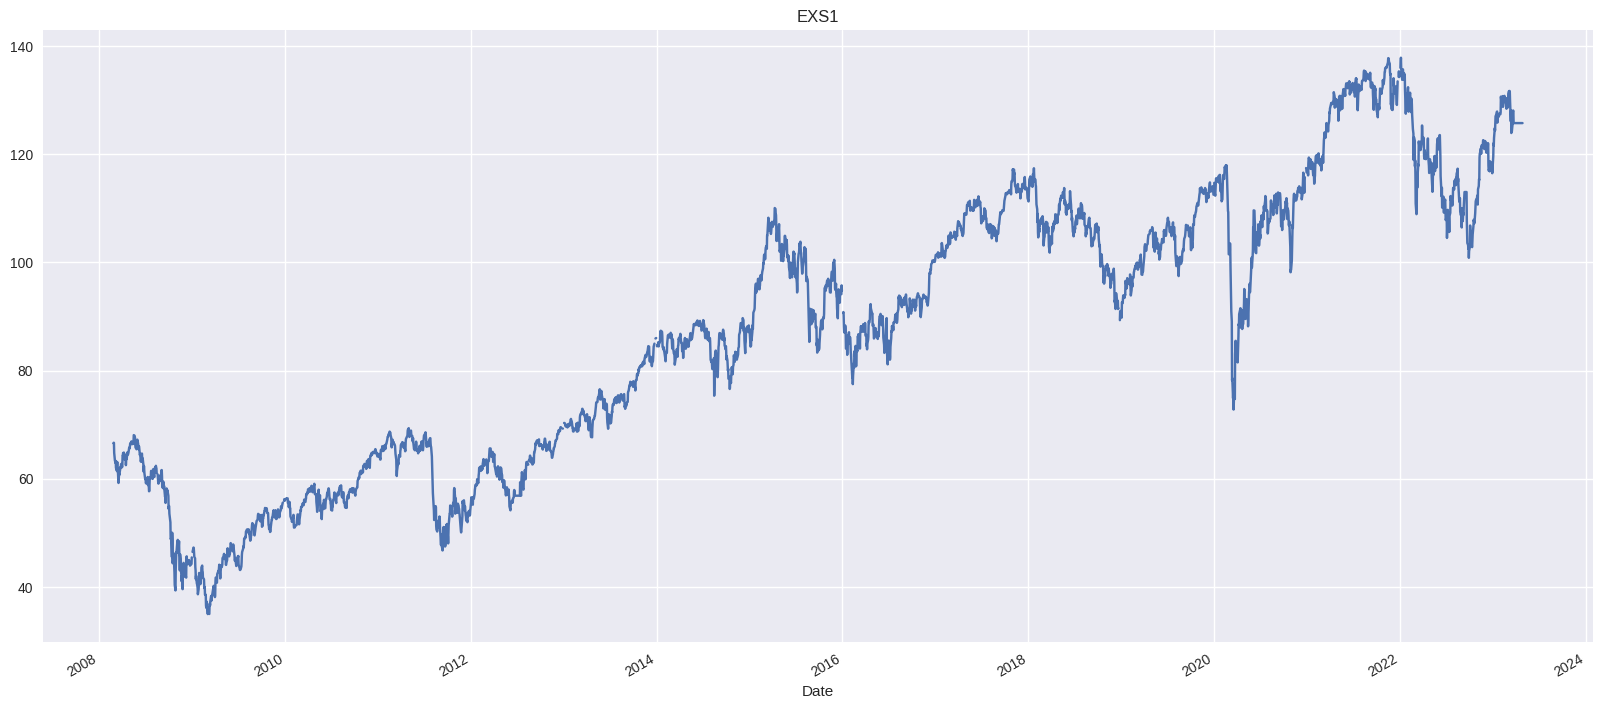

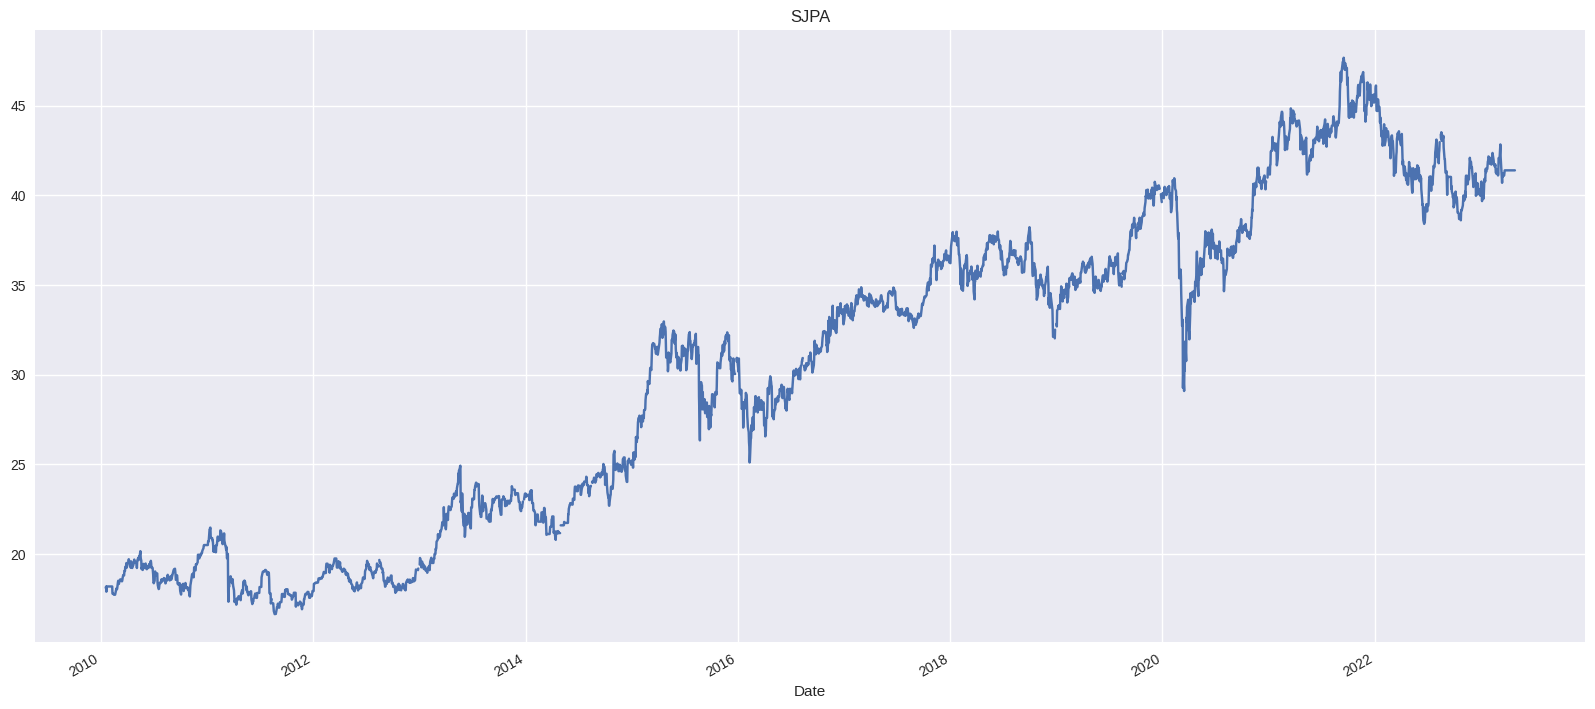

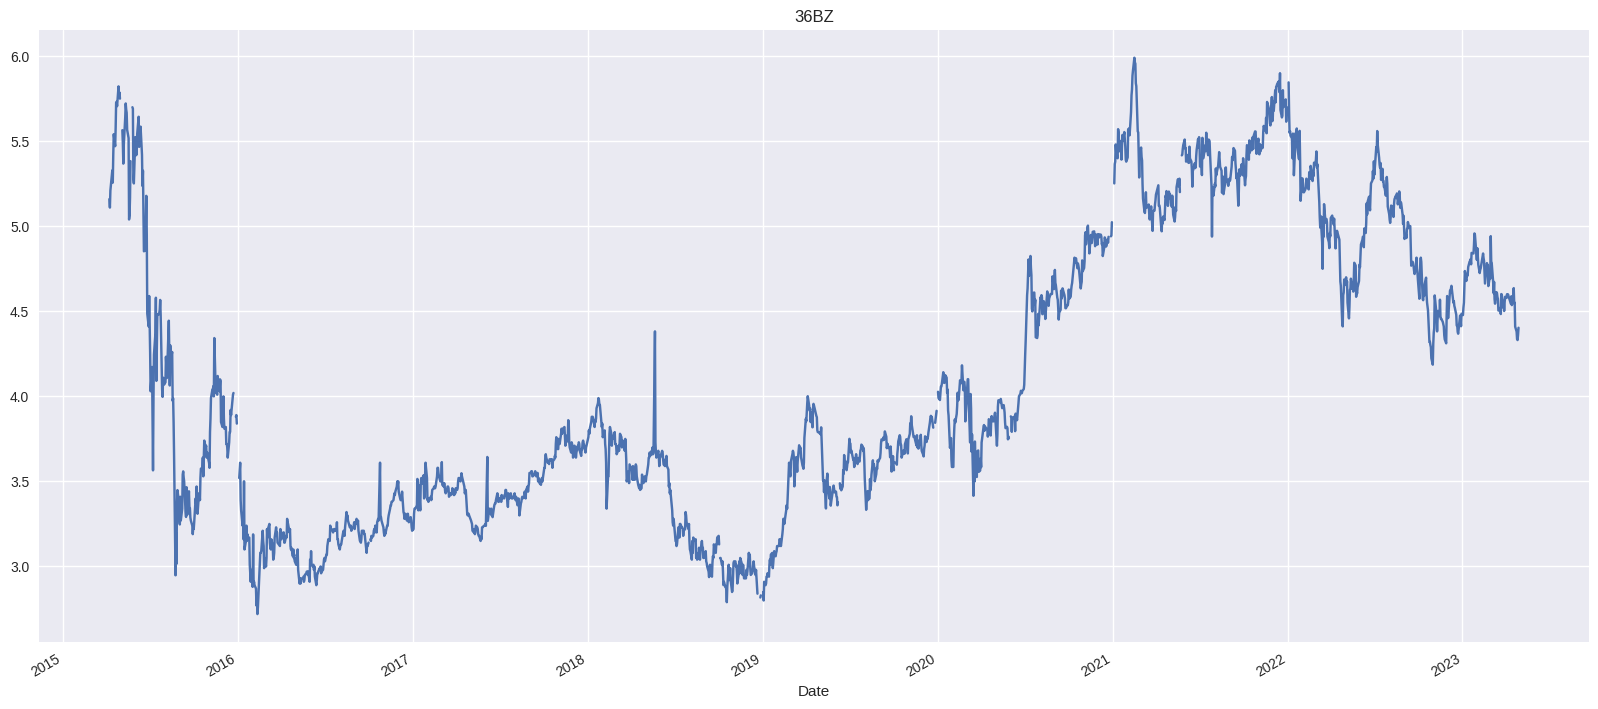

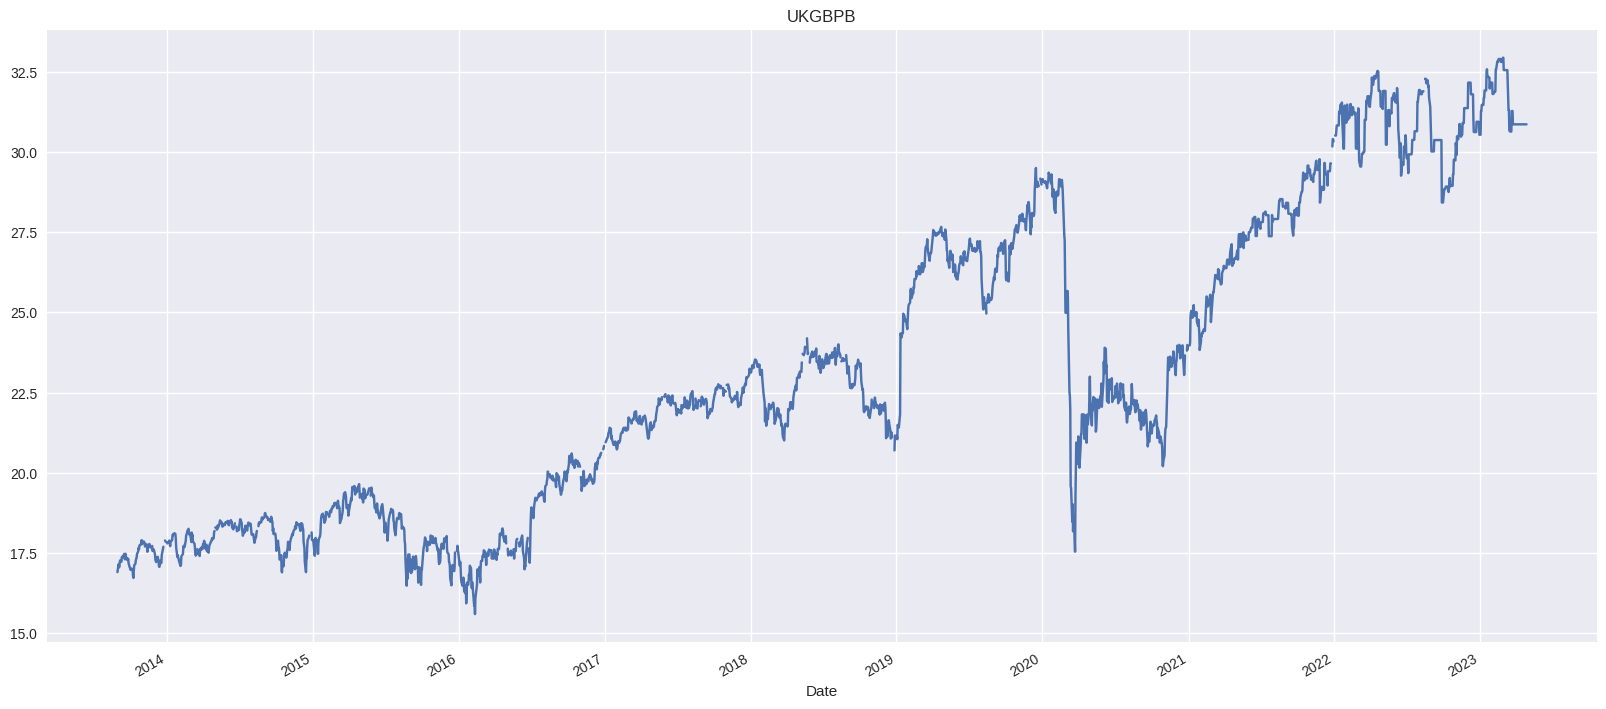

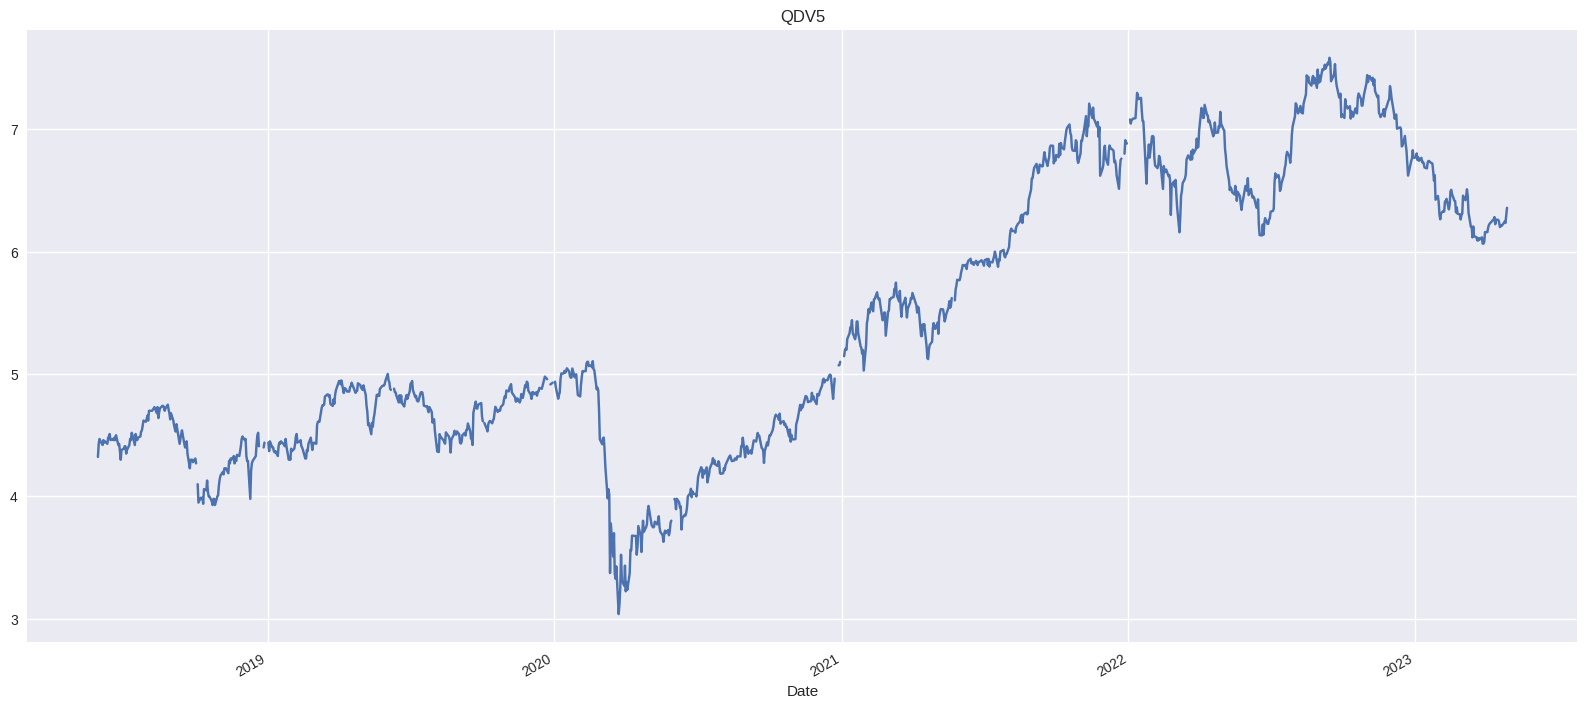

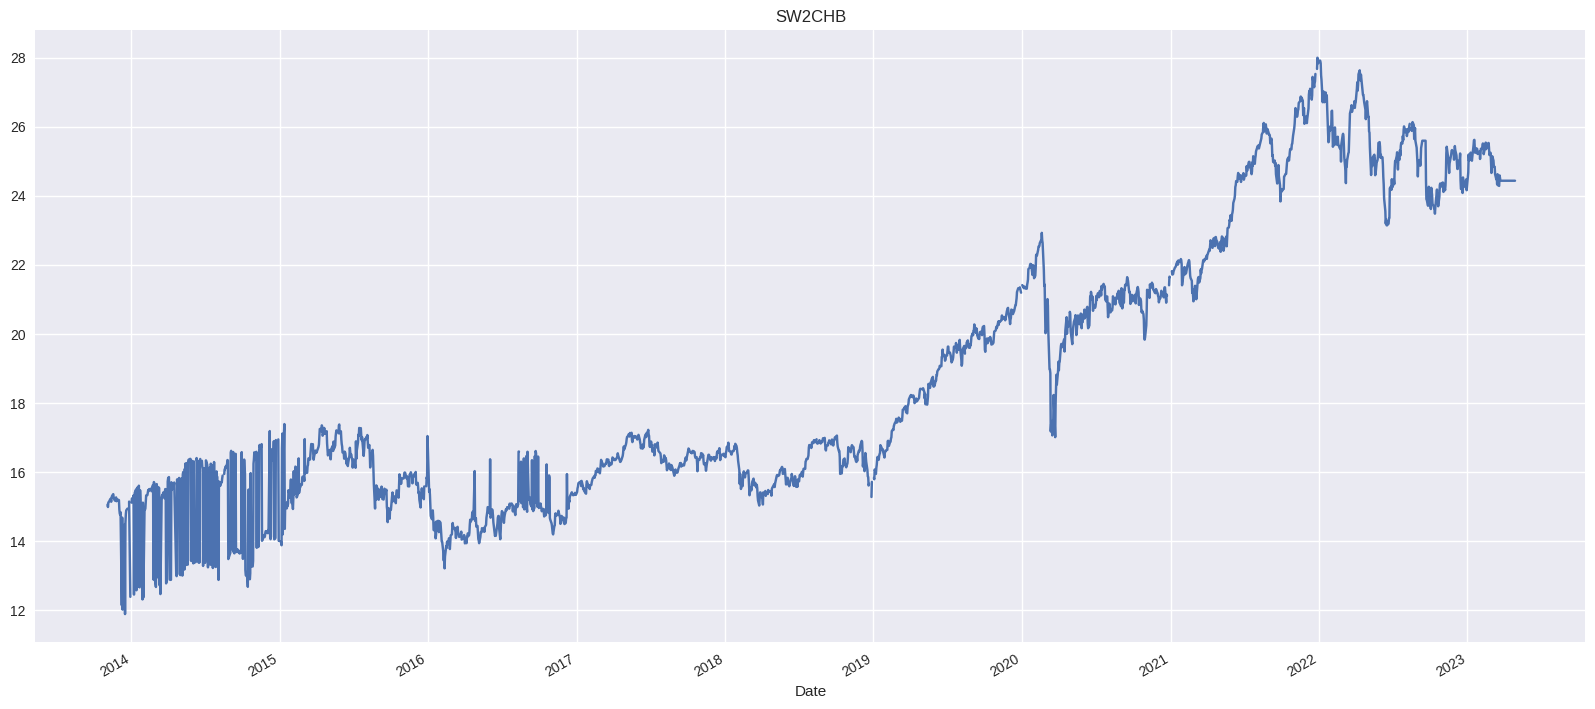

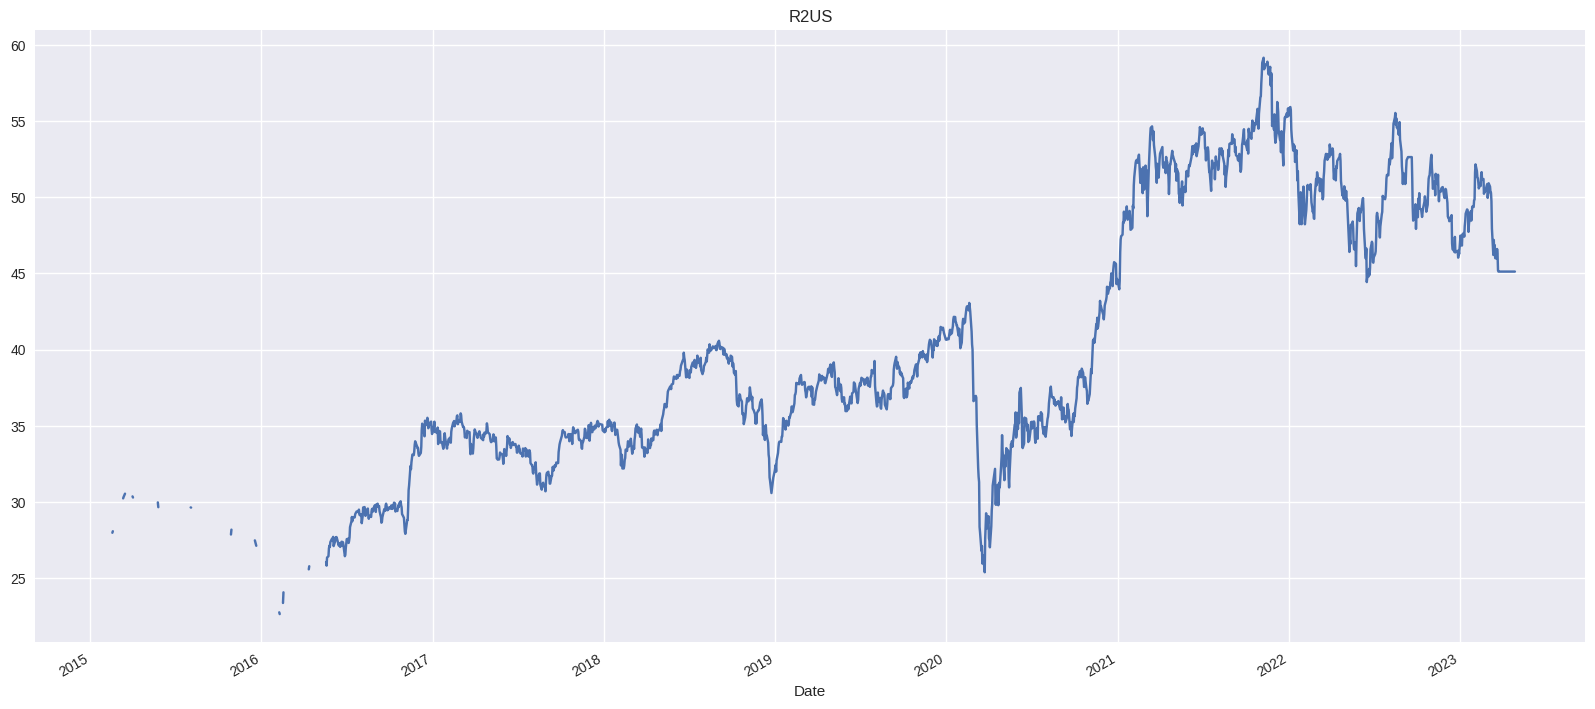

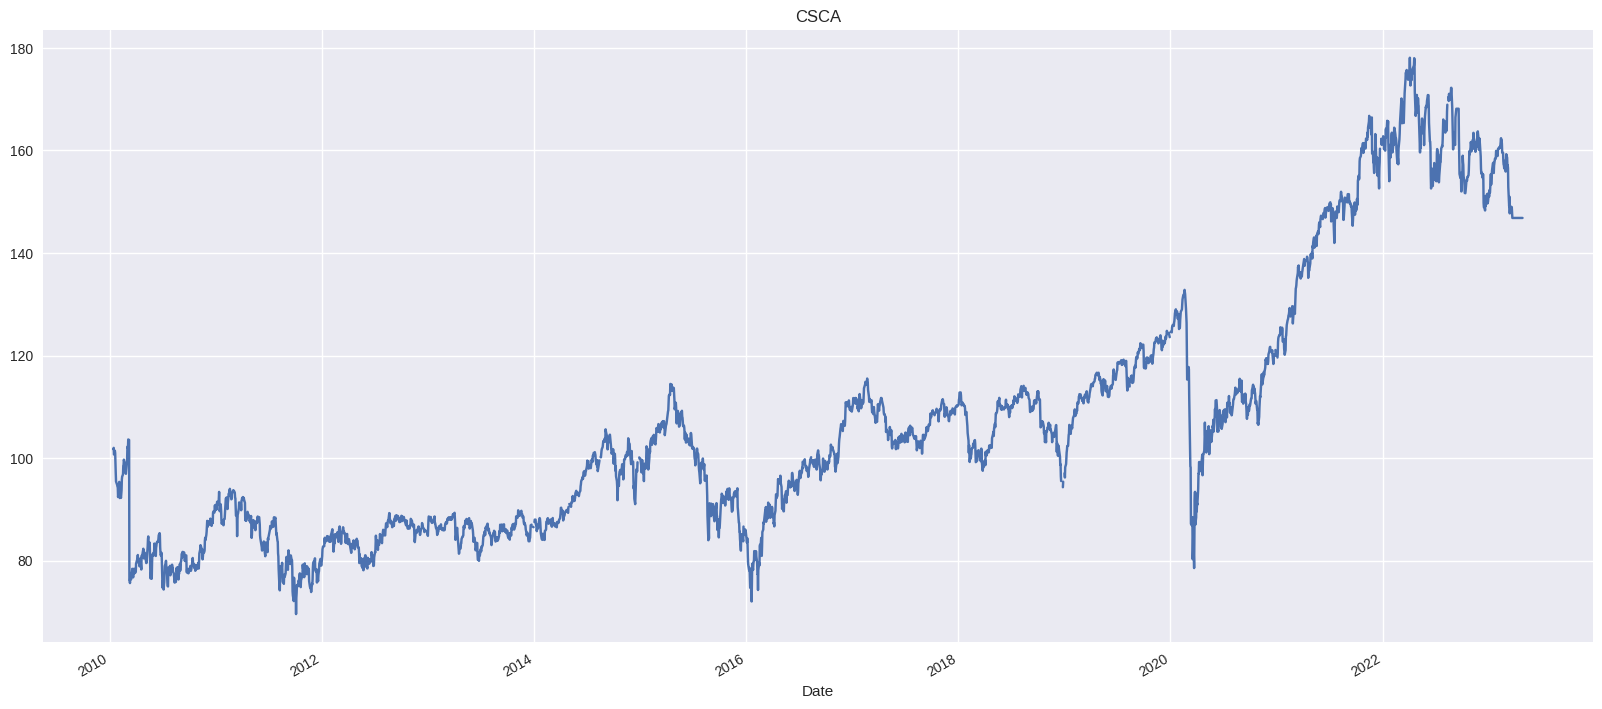

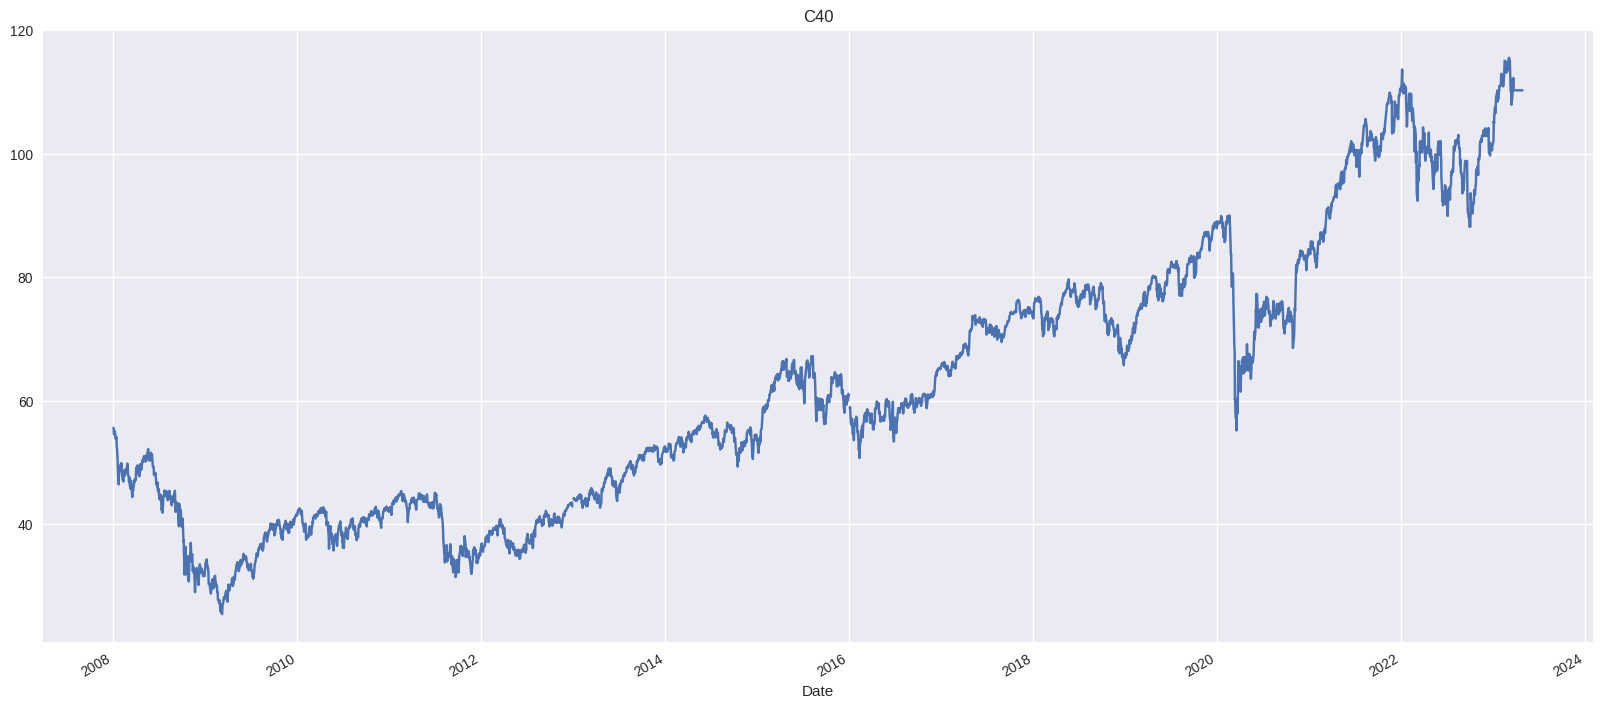

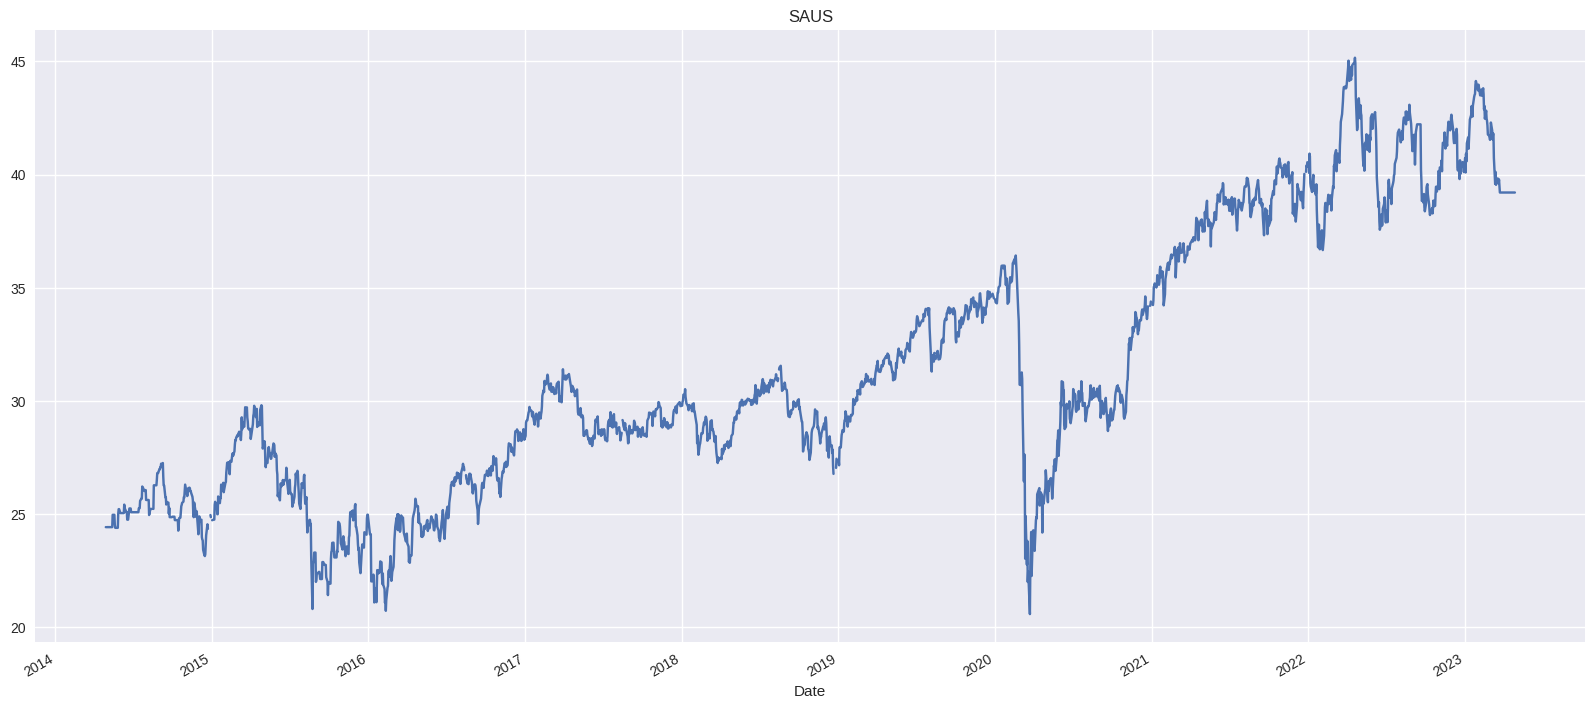

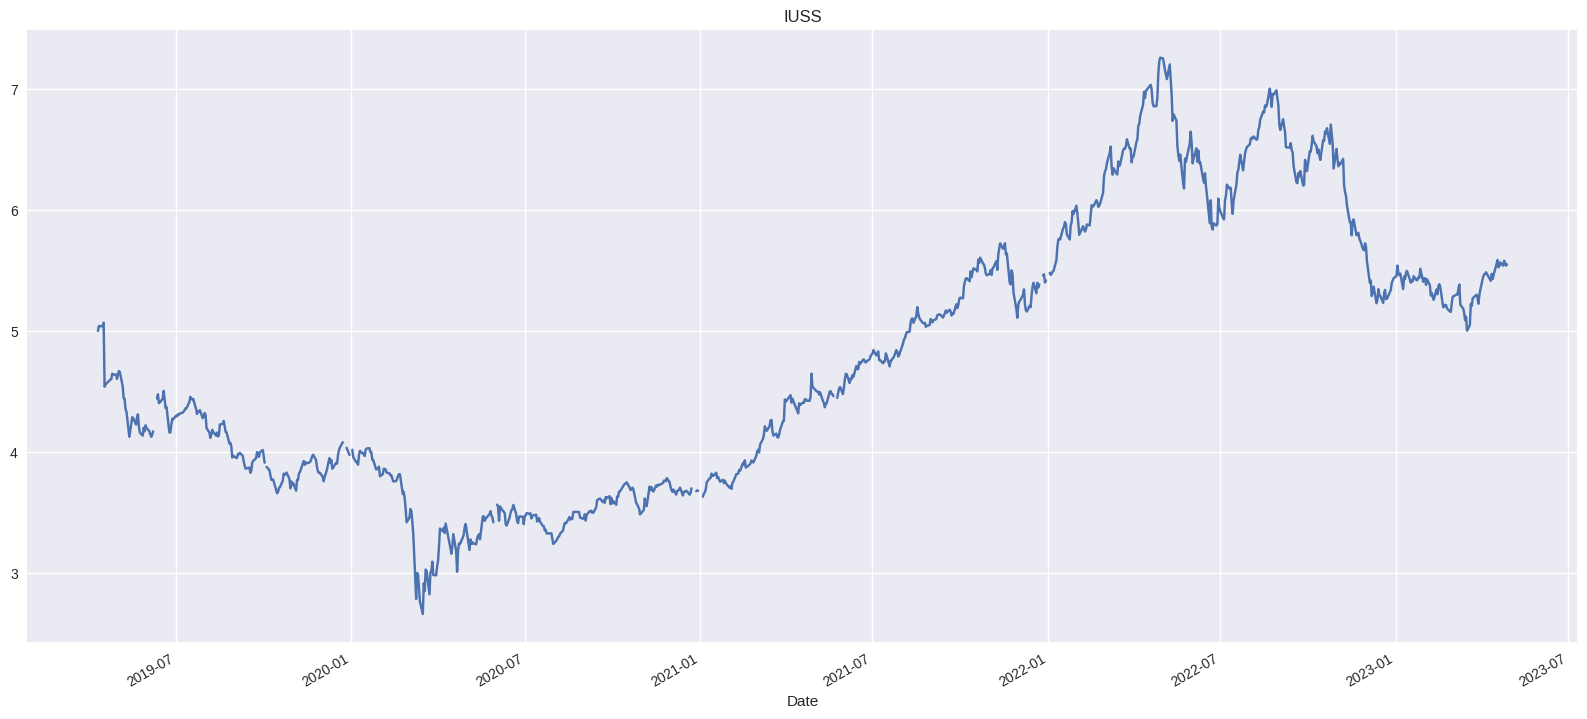

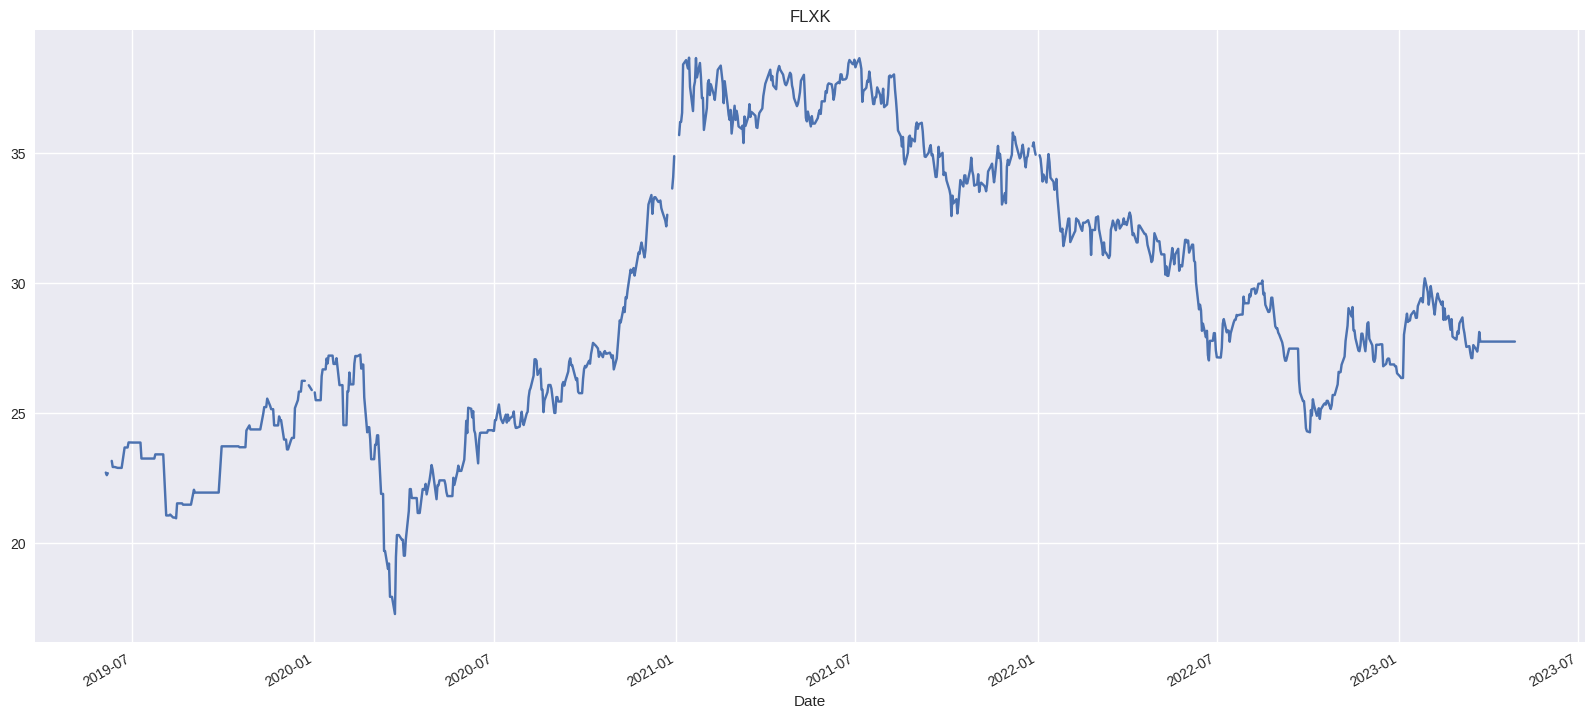

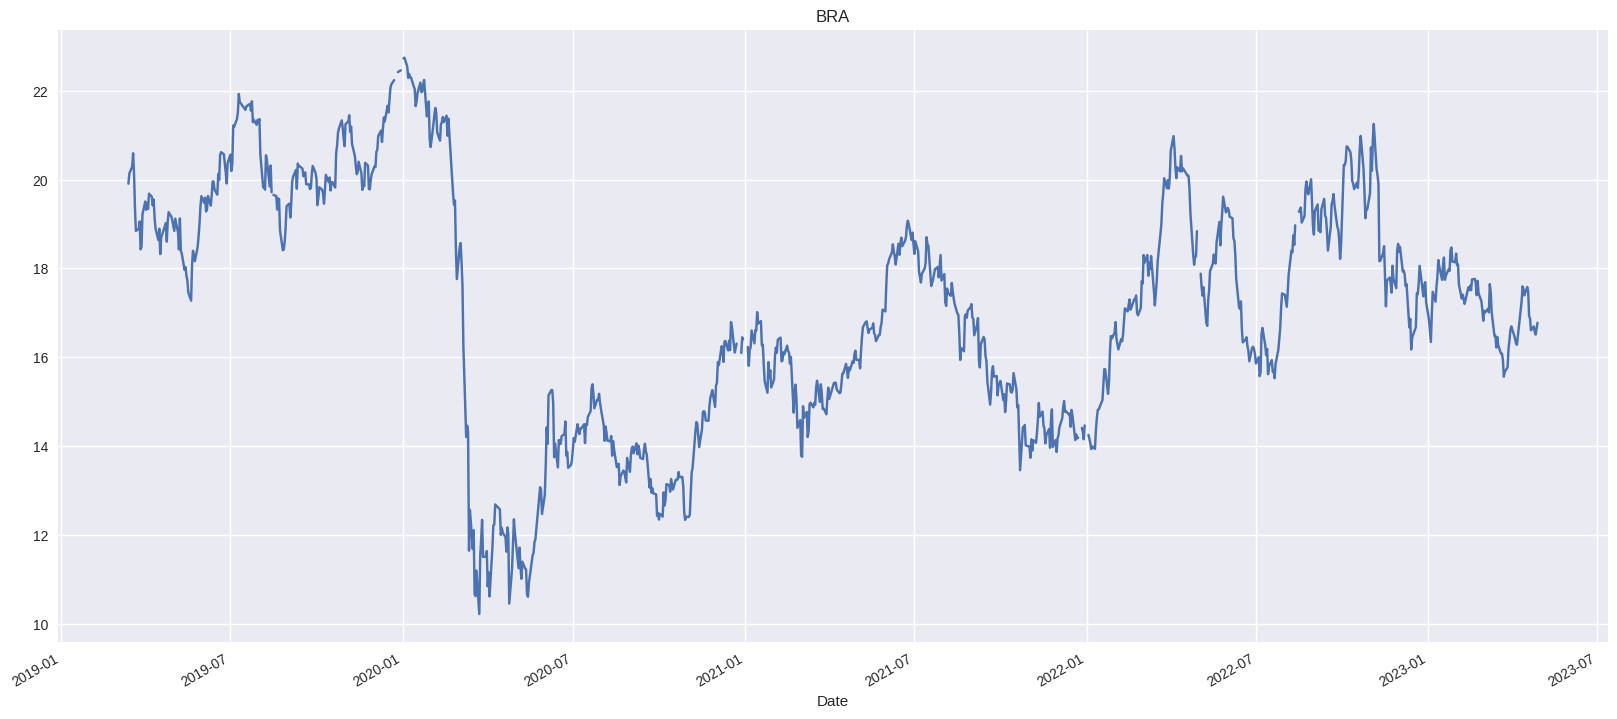

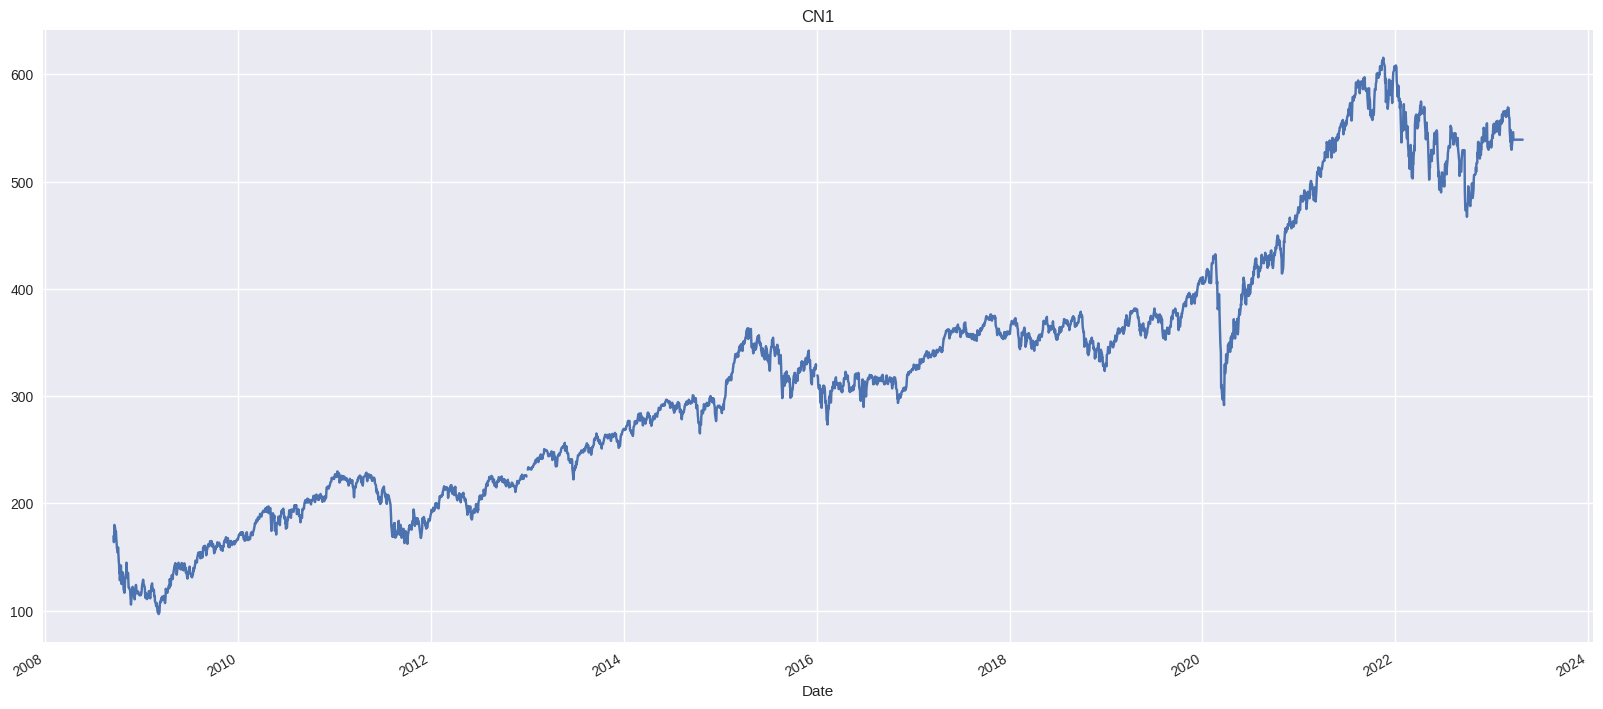

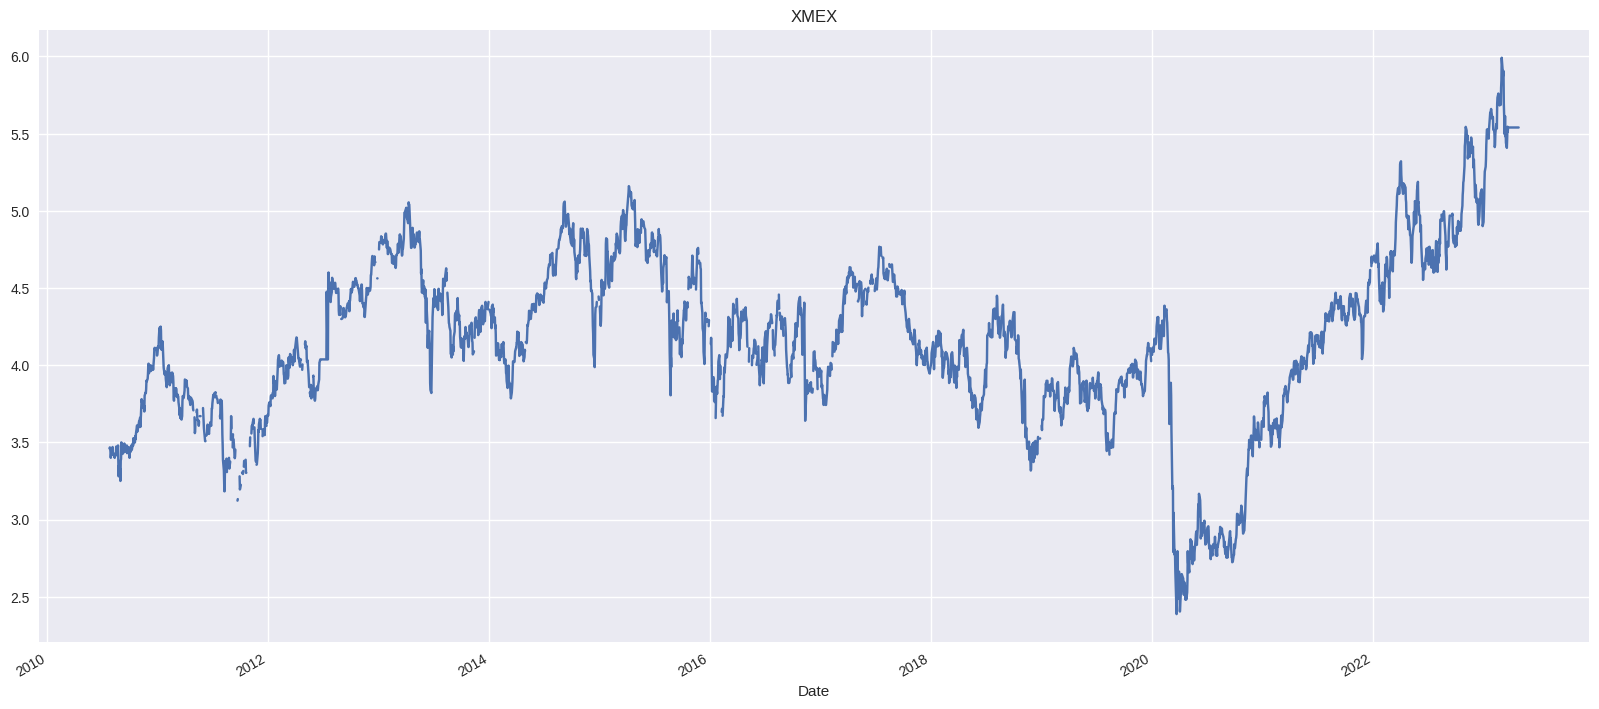

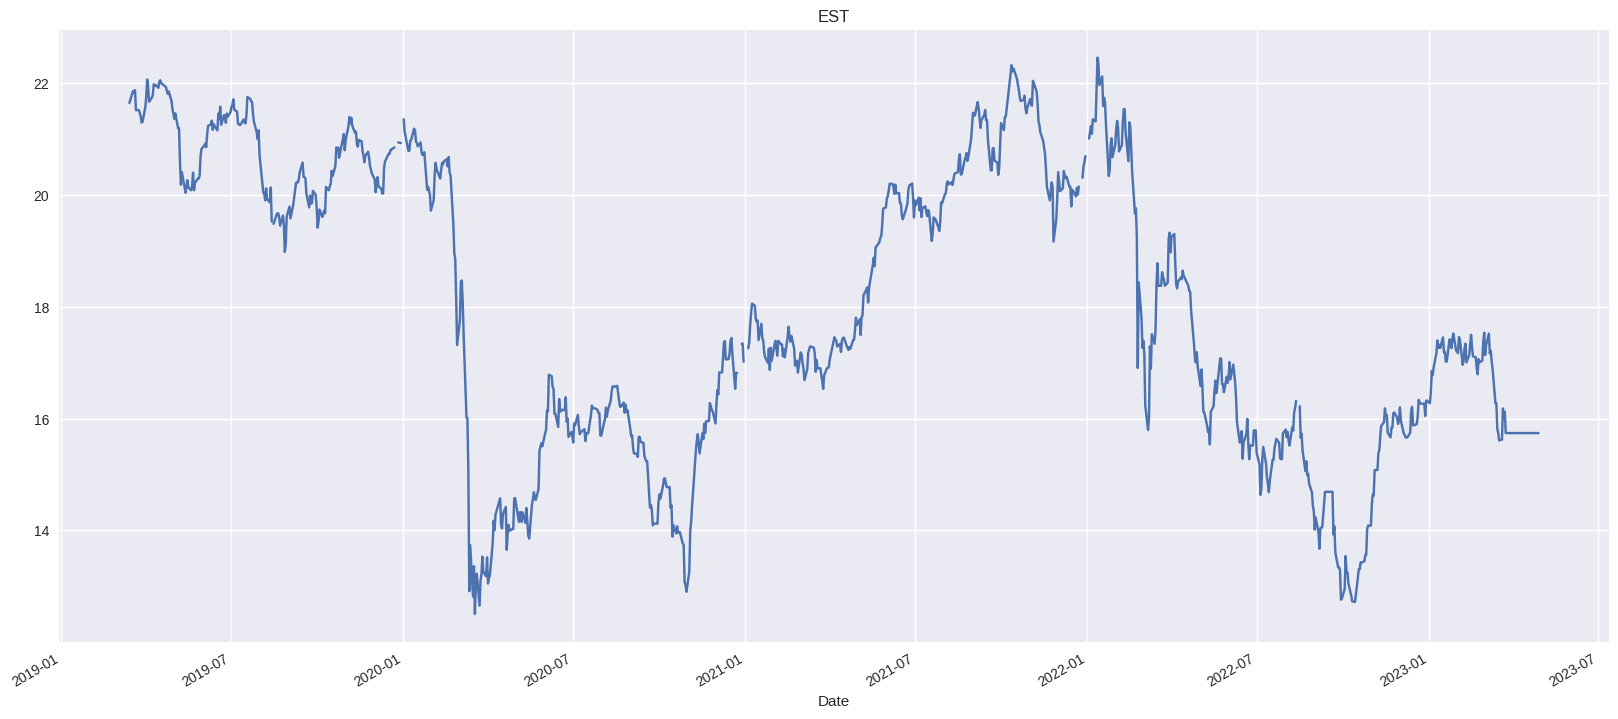

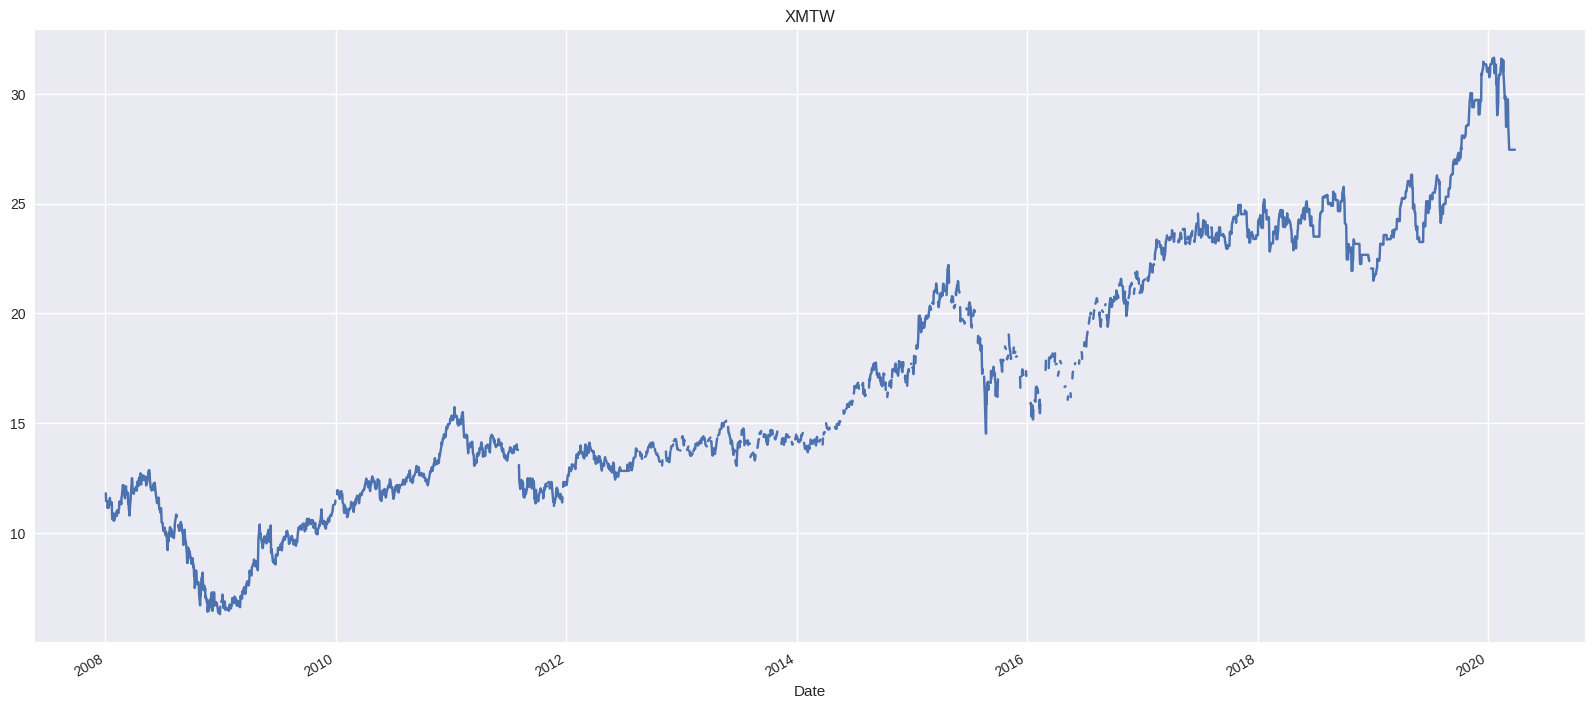

In [ ]:
for c in dati.columns:
  plt.figure()
  plt.title(c)
  dati[c].plot(figsize=(20,9))
  plt.show()

36BZ -> da 6-2018

CSCA -> da 3-2010

SW2CHB -> da 1-2017




In [ ]:
if "36BZ" in dati.columns:
  dati["36BZ"].loc[:pd.to_datetime("2018-06-01")]=np.nan
if "CSCA" in dati.columns:
  dati["CSCA"].loc[:pd.to_datetime("2010-03-01")]=np.nan
if "SW2CHB" in dati.columns:
  dati["SW2CHB"].loc[:pd.to_datetime("2017-01-01")]=np.nan

In [ ]:
# riempio i missing di al massimo una settimana
dati.ffill(limit=5,inplace=True)

In [ ]:
rendimenti = dati.pct_change(1)
(rendimenti.mean()+1)**253-1

CSSPX     0.149932
EXS1      0.068186
SJPA      0.080067
36BZ      0.072714
UKGBPB    0.078736
QDV5      0.112502
SW2CHB    0.085585
R2US      0.090893
CSCA      0.049732
C40       0.072744
SAUS      0.077917
IUSS      0.055996
FLXK      0.083946
BRA       0.030401
CN1       0.107200
XMEX      0.066715
EST      -0.041415
XMTW      0.078978
dtype: float64

<Axes: >

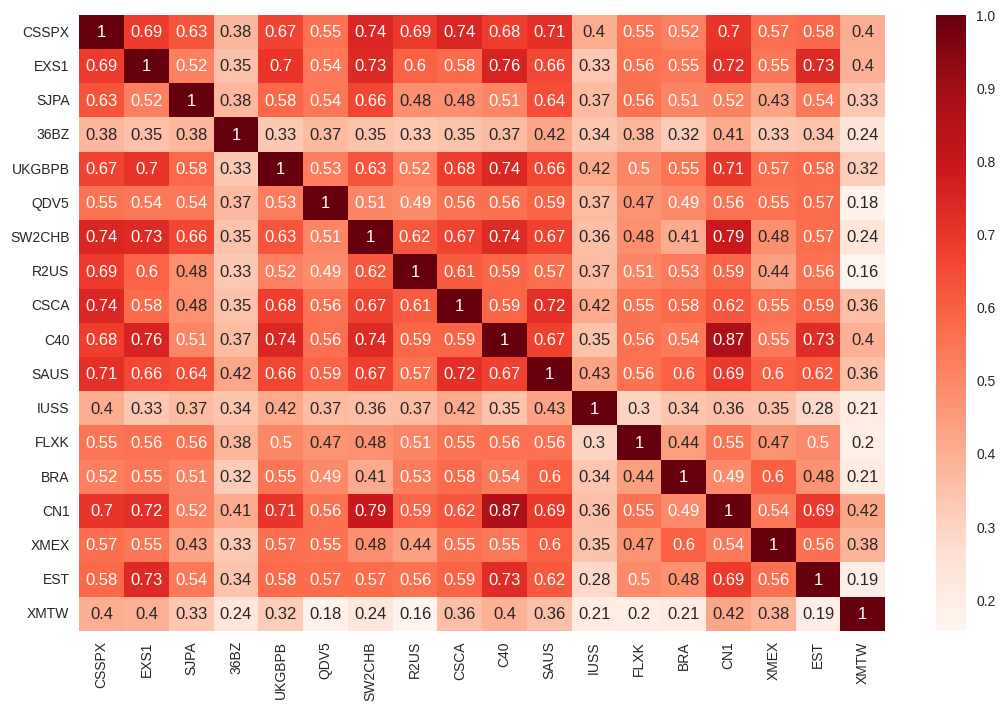

In [ ]:
plt.figure(figsize=(13,8))
#seaborn.set(font_scale=1.2)
seaborn.heatmap(rendimenti.corr(),cmap="Reds", annot=True, annot_kws={"size":12})

In [ ]:
# se io volessi analizzare tutti i portafogli equally weighted di N etf, quanti casi dovrei analizzare?
x=np.math.factorial(len(dati.columns))
for i in range(2,len(dati.columns)):
  print(i,x/np.math.factorial(len(dati.columns)-i))

2 306.0
3 4896.0
4 73440.0
5 1028160.0
6 13366080.0
7 160392960.0
8 1764322560.0
9 17643225600.0
10 158789030400.0
11 1270312243200.0
12 8892185702400.0
13 53353114214400.0
14 266765571072000.0
15 1067062284288000.0
16 3201186852864000.0
17 6402373705728000.0


In [ ]:
quante=10000
cov = rendimenti.cov()*100*253
medie = ((rendimenti.mean()+1)**253-1)*100
tabella = pd.DataFrame(columns=["rendimento","varianza","quasi Sharpe"]+nomi)
tabella1 = pd.DataFrame(columns=["rendimento","varianza","quasi Sharpe"]+nomi)
for k in range(len(dati.columns)):
  w = np.zeros(len(dati.columns))
  w[k]=1.00
  w = w/sum(w)
  rend = np.dot(medie,w)
  vol = np.dot(w,np.dot(cov,w))
  tabella1.loc[k]=[rend,vol,rend/vol]+list(w*100)
for k in range(quante):
#  w = np.random.random(len(dati.columns))
  w=np.random.normal(1,0.2,len(dati.columns))
  w[w>1]=w[w>1]-1
  w = w/sum(w)
  rend = np.dot(medie,w)
  vol = np.dot(w,np.dot(cov,w))
  tabella.loc[k]=[rend,vol,rend/vol]+list(w*100)
  if k%1000==0:
    print(k)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


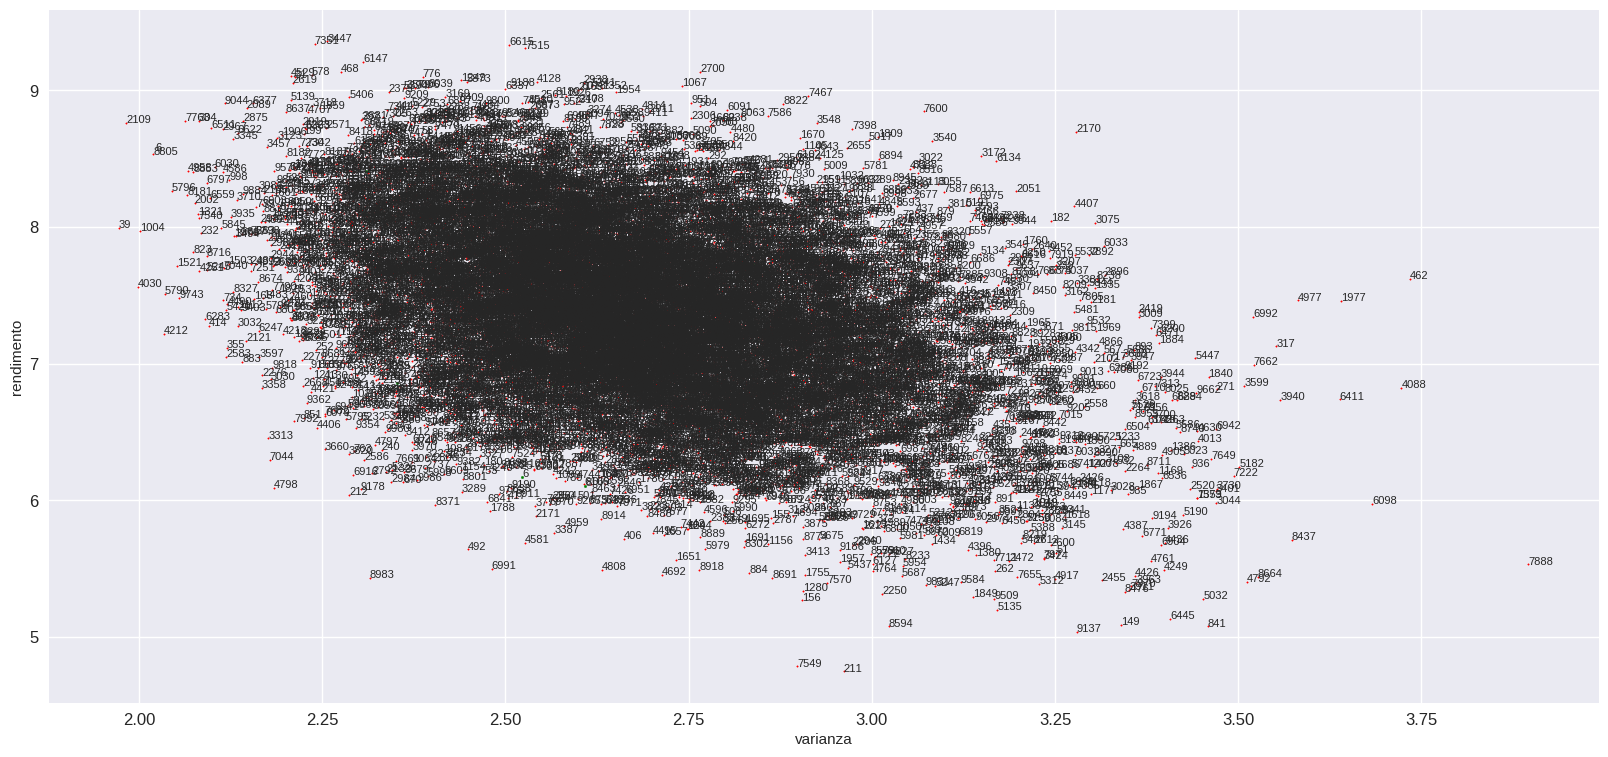

In [ ]:
ax = tabella.loc[len(dati.columns):].plot.scatter(x="varianza",y="rendimento", figsize=(20,9),fontsize=12,s=1,color="r")
axes = plt.gca()
x=axes.get_xlim()
y=axes.get_ylim()
tabella.loc[:len(dati.columns)].plot.scatter(ax=ax,x="varianza",y="rendimento", figsize=(20,9),fontsize=12,s=3,color="g",xlim=x,ylim=y)
for i in tabella.index:
    plt.annotate(i,xy=(tabella.loc[i,"varianza"],tabella.loc[i,"rendimento"]),size=8)
for i in tabella1.index:
    plt.annotate(i,xy=(tabella1.loc[i,"varianza"],tabella1.loc[i,"rendimento"]),size=8)

In [ ]:
tabella1

rendimento   varianza  quasi Sharpe  iShares Core S&P 500  \
0    14.993246   2.722570      5.507020                 100.0   
1     6.818609   4.897509      1.392260                   0.0   
2     8.006729   3.092285      2.589260                   0.0   
3     7.271400   6.721188      1.081862                   0.0   
4     7.873558   2.854855      2.757953                   0.0   
5    11.250214   5.780090      1.946373                   0.0   
6     8.558481   2.021946      4.232794                   0.0   
7     9.089275   5.012390      1.813362                   0.0   
8     4.973174   4.052818      1.227090                   0.0   
9     7.274397   5.209301      1.396425                   0.0   
10    7.791654   4.577650      1.702108                   0.0   
11    5.599637   5.743777      0.974905                   0.0   
12    8.394630   5.999935      1.399120                   0.0   
13    3.040139  13.969615      0.217625                   0.0   
14   10.720035   4.722373      2.270053                   0.0   
15    6.671482   5.613717      1.188425                   0.0   
16   -4.141515   6.680758     -0.619917                   0.0   
17    7.897764   4.327666      1.824948                   0.0   

    iShares Core DAX  iShares Core MSCI Japan IMI  iShares MSCI China A  \
0                0.0                          0.0                   0.0   
1              100.0                          0.0                   0.0   
2                0.0                        100.0                   0.0   
3                0.0                          0.0                 100.0   
4                0.0                          0.0                   0.0   
5                0.0                          0.0                   0.0   
6                0.0                          0.0                   0.0   
7                0.0                          0.0                   0.0   
8                0.0                          0.0                   0.0   
9                0.0                          0.0                   0.0   
10               0.0                          0.0                   0.0   
11               0.0                          0.0                   0.0   
12               0.0                          0.0                   0.0   
13               0.0                          0.0                   0.0   
14               0.0                          0.0                   0.0   
15               0.0                          0.0                   0.0   
16               0.0                          0.0                   0.0   
17               0.0                          0.0                   0.0   

    UBS ETF (LU) MSCI UK  iShares MSCI India  \
0                    0.0                 0.0   
1                    0.0                 0.0   
2                    0.0                 0.0   
3                    0.0                 0.0   
4                  100.0                 0.0   
5                    0.0               100.0   
6                    0.0                 0.0   
7                    0.0                 0.0   
8                    0.0                 0.0   
9                    0.0                 0.0   
10                   0.0                 0.0   
11                   0.0                 0.0   
12                   0.0                 0.0   
13                   0.0                 0.0   
14                   0.0                 0.0   
15                   0.0                 0.0   
16                   0.0                 0.0   
17                   0.0                 0.0   

    UBS ETF (LU) MSCI Switzerland 20/35  ...  iShares MSCI Canada  \
0                                   0.0  ...                  0.0   
1                                   0.0  ...                  0.0   
2                                   0.0  ...                  0.0   
3                                   0.0  ...                  0.0   
4                                   0.0  ...                  0.0   
5              

In [ ]:
tabella.loc[7888]

rendimento                              5.532397
varianza                                3.895602
quasi Sharpe                            1.420165
iShares Core S&P 500                    0.698120
iShares Core DAX                        0.511023
iShares Core MSCI Japan IMI             0.699272
iShares MSCI China A                    1.967319
UBS ETF (LU) MSCI UK                    3.277965
iShares MSCI India                     15.219930
UBS ETF (LU) MSCI Switzerland 20/35     0.175726
SPDR Russell 2000 US Small Cap          4.406288
iShares MSCI Canada                     2.081929
Amundi CAC 40                           3.305088
iShares MSCI Australia                  6.191047
Shares MSCI Saudi Arabia Capped         3.539981
Franklin FTSE Korea                     1.597666
Lyxor MSCI Brazil                      15.908446
Amundi MSCI Nordic                      5.893693
Xtrackers MSCI Mexico                  16.214296
Lyxor MSCI Eastern Europe ex Russia    16.564045
Xtrackers MSCI Taiwa

In [ ]:
tabella["rendimento"].idxmax(),tabella.loc[tabella["rendimento"].idxmax()]

(3447,
 rendimento                              9.358480
 varianza                                2.256569
 quasi Sharpe                            4.147217
 iShares Core S&P 500                   13.815521
 iShares Core DAX                        2.103059
 iShares Core MSCI Japan IMI             1.378541
 iShares MSCI China A                    2.866262
 UBS ETF (LU) MSCI UK                   13.810504
 iShares MSCI India                     11.971262
 UBS ETF (LU) MSCI Switzerland 20/35     4.352062
 SPDR Russell 2000 US Small Cap         12.479200
 iShares MSCI Canada                     1.026548
 Amundi CAC 40                           1.797039
 iShares MSCI Australia                  1.711859
 Shares MSCI Saudi Arabia Capped         0.444628
 Franklin FTSE Korea                     1.918239
 Lyxor MSCI Brazil                       0.116384
 Amundi MSCI Nordic                     12.071304
 Xtrackers MSCI Mexico                   2.988278
 Lyxor MSCI Eastern Europe ex Russia     2.

In [ ]:
tabella["varianza"].idxmin(),tabella.loc[tabella["varianza"].idxmin()]

(39,
 rendimento                              7.993109
 varianza                                1.972540
 quasi Sharpe                            4.052192
 iShares Core S&P 500                    4.308711
 iShares Core DAX                        0.682843
 iShares Core MSCI Japan IMI            15.043611
 iShares MSCI China A                    2.593440
 UBS ETF (LU) MSCI UK                   13.285191
 iShares MSCI India                      9.500504
 UBS ETF (LU) MSCI Switzerland 20/35     5.560253
 SPDR Russell 2000 US Small Cap          3.965235
 iShares MSCI Canada                     4.052172
 Amundi CAC 40                           2.562140
 iShares MSCI Australia                  1.440040
 Shares MSCI Saudi Arabia Capped        13.795801
 Franklin FTSE Korea                     0.745788
 Lyxor MSCI Brazil                       0.731965
 Amundi MSCI Nordic                      2.209017
 Xtrackers MSCI Mexico                   3.029291
 Lyxor MSCI Eastern Europe ex Russia     1.18

In [ ]:
tabella["quasi Sharpe"].idxmax(),tabella.loc[tabella["quasi Sharpe"].idxmax()]

(2109,
 rendimento                              8.759713
 varianza                                1.982570
 quasi Sharpe                            4.418363
 iShares Core S&P 500                   16.460810
 iShares Core DAX                       11.215162
 iShares Core MSCI Japan IMI            10.791049
 iShares MSCI China A                    1.404665
 UBS ETF (LU) MSCI UK                   15.658647
 iShares MSCI India                      0.331169
 UBS ETF (LU) MSCI Switzerland 20/35     5.069286
 SPDR Russell 2000 US Small Cap          2.620365
 iShares MSCI Canada                     3.194743
 Amundi CAC 40                           0.612556
 iShares MSCI Australia                  1.153582
 Shares MSCI Saudi Arabia Capped         4.728704
 Franklin FTSE Korea                     1.241795
 Lyxor MSCI Brazil                       0.280004
 Amundi MSCI Nordic                      2.584817
 Xtrackers MSCI Mexico                   5.517717
 Lyxor MSCI Eastern Europe ex Russia     0.

# Analisi su ETF per asset class

In [ ]:
etf=[["iShares MSCI North America","INAA"],["iShares STOXX Europe 600","EXSA"],
     ["Lyxor MSCI Emerging Markets Ex China","EMXC"],["iShares MSCI China A","36BZ"],
     ["Vanguard USD Treasury Bond","VDTA"],
     ["Xtrackers Eurozone Government Bond","XGLE"],["iShares Euro Inflation Linked Government Bond","IBCI"],["Xtrackers II EUR Corporate Bond","XBLC"],
     ["Invesco Physical Gold","SGLD"],["Invesco Bloomberg Commodity","CMOD"],["ETC Group Physical Bitcoin","BTCE"],
     ["iShares Developed Markets Property Yield","IWDP"]] 

nomi=list(np.array(etf)[:,0])
tickers=list(np.array(etf)[:,1])
tickersMI=[t + ".MI" for t in tickers]
tickersF=[t + ".F" for t in tickers]
tickersPA=[t + ".PA" for t in tickers]

In [ ]:
datiMI=yf.download(tickersMI)["Adj Close"]
datiF=yf.download(tickersF)["Adj Close"]
datiPA=yf.download(tickersPA)["Adj Close"]

[*********************100%***********************]  12 of 12 completed

2 Failed downloads:
- BTCE.MI: No timezone found, symbol may be delisted
- 36BZ.MI: No timezone found, symbol may be delisted
[*********************100%***********************]  12 of 12 completed

7 Failed downloads:
- VDTA.F: No timezone found, symbol may be delisted
- IWDP.F: No timezone found, symbol may be delisted
- SGLD.F: No timezone found, symbol may be delisted
- CMOD.F: No timezone found, symbol may be delisted
- XBLC.F: No timezone found, symbol may be delisted
- INAA.F: No timezone found, symbol may be delisted
- BTCE.F: No timezone found, symbol may be delisted
[*********************100%***********************]  12 of 12 completed

9 Failed downloads:
- XBLC.PA: No timezone found, symbol may be delisted
- EMXC.PA: No timezone found, symbol may be delisted
- SGLD.PA: No timezone found, symbol may be delisted
- XGLE.PA: No timezone found, symbol may be delisted
- INAA.PA: 1d data not available for start

In [ ]:
# rimetto a posto le colonne che non ho capito perché me le scombina
datiMI=datiMI.reindex(tickersMI, axis=1)
datiPA=datiPA.reindex(tickersPA, axis=1)
datiF=datiF.reindex(tickersF, axis=1)
# cambio i nomi alle colonne mettendoli uguali
datiMI.rename(columns = dict(zip(tickersMI, tickers)),inplace=True)
datiF.rename(columns = dict(zip(tickersF, tickers)),inplace=True)
datiPA.rename(columns = dict(zip(tickersPA, tickers)),inplace=True)
# stesso indice per tutti!
dati = datiMI.reindex( index=datiMI.index.union(datiPA.index).union(datiF.index) )
datiPA = datiPA.reindex( index=dati.index )
datiF = datiF.reindex( index=dati.index )

In [ ]:
# BRA.F non è BRA.MI.... 'azzo di tickers e chi li ha inventati!
if "BRA" in tickers:
  datiF["BRA"]=np.nan

# mi vergogno di questo pezzo qui sotto...
for i in dati.index:
  for c in dati:
    if np.isnan(dati[c].loc[i]):
      if not np.isnan(datiF[c].loc[i]):
        dati[c].loc[i] = datiF[c].loc[i]
      elif not np.isnan(datiPA[c].loc[i]):
        dati[c].loc[i] = datiPA[c].loc[i]
dati        

INAA  EXSA    EMXC    36BZ    VDTA        XGLE        IBCI  \
Date                                                                          
2005-11-21        NaN   NaN     NaN     NaN     NaN         NaN  155.800003   
2005-11-22        NaN   NaN     NaN     NaN     NaN         NaN  155.800003   
2005-11-23        NaN   NaN     NaN     NaN     NaN         NaN  157.600006   
2005-11-24        NaN   NaN     NaN     NaN     NaN         NaN  158.500000   
2005-11-25        NaN   NaN     NaN     NaN     NaN         NaN  159.100006   
...               ...   ...     ...     ...     ...         ...         ...   
2023-04-24  67.709999  43.5  19.788  4.3810  23.605  210.179993  223.350006   
2023-04-25  67.709999  43.5  19.788  4.3360  23.605  210.179993  223.350006   
2023-04-26  67.709999  43.5  19.788  4.3310  23.605  210.179993  223.350006   
2023-04-27  67.709999  43.5  19.788  4.3605  23.605  210.179993  223.350006   
2023-04-28  67.709999  43.5  19.788  4.4035  23.605  210.179993  223.350006   

                  XBLC        SGLD  CMOD       BTCE    IWDP  
Date                                                         
2005-11-21         NaN         NaN   NaN        NaN     NaN  
2005-11-22         NaN         NaN   NaN        NaN     NaN  
2005-11-23         NaN         NaN   NaN        NaN     NaN  
2005-11-24         NaN         NaN   NaN        NaN     NaN  
2005-11-25         NaN         NaN   NaN        NaN     NaN  
...                ...         ...   ...        ...     ...  
2023-04-24  142.369995  178.229996  20.5  23.469999  19.468  
2023-04-25  142.369995  178.229996  20.5  23.379999  19.468  
2023-04-26  142.369995  178.229996  20.5  25.344000  19.468  
2023-04-27  142.369995  178.229996  20.5  24.896000  19.468  
2023-04-28  142.369995  178.229996  20.5  25.124001  19.468  

[4356 rows x 12 columns]

In [ ]:
dati.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4356 entries, 2005-11-21 00:00:00 to 2023-04-28 00:00:00
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   INAA    3876 non-null   float64
 1   EXSA    3859 non-null   float64
 2   EMXC    971 non-null    float64
 3   36BZ    2048 non-null   float64
 4   VDTA    1068 non-null   float64
 5   XGLE    3605 non-null   float64
 6   IBCI    4349 non-null   float64
 7   XBLC    2435 non-null   float64
 8   SGLD    2110 non-null   float64
 9   CMOD    1597 non-null   float64
 10  BTCE    494 non-null    float64
 11  IWDP    3930 non-null   float64
dtypes: float64(12)
memory usage: 571.4+ KB


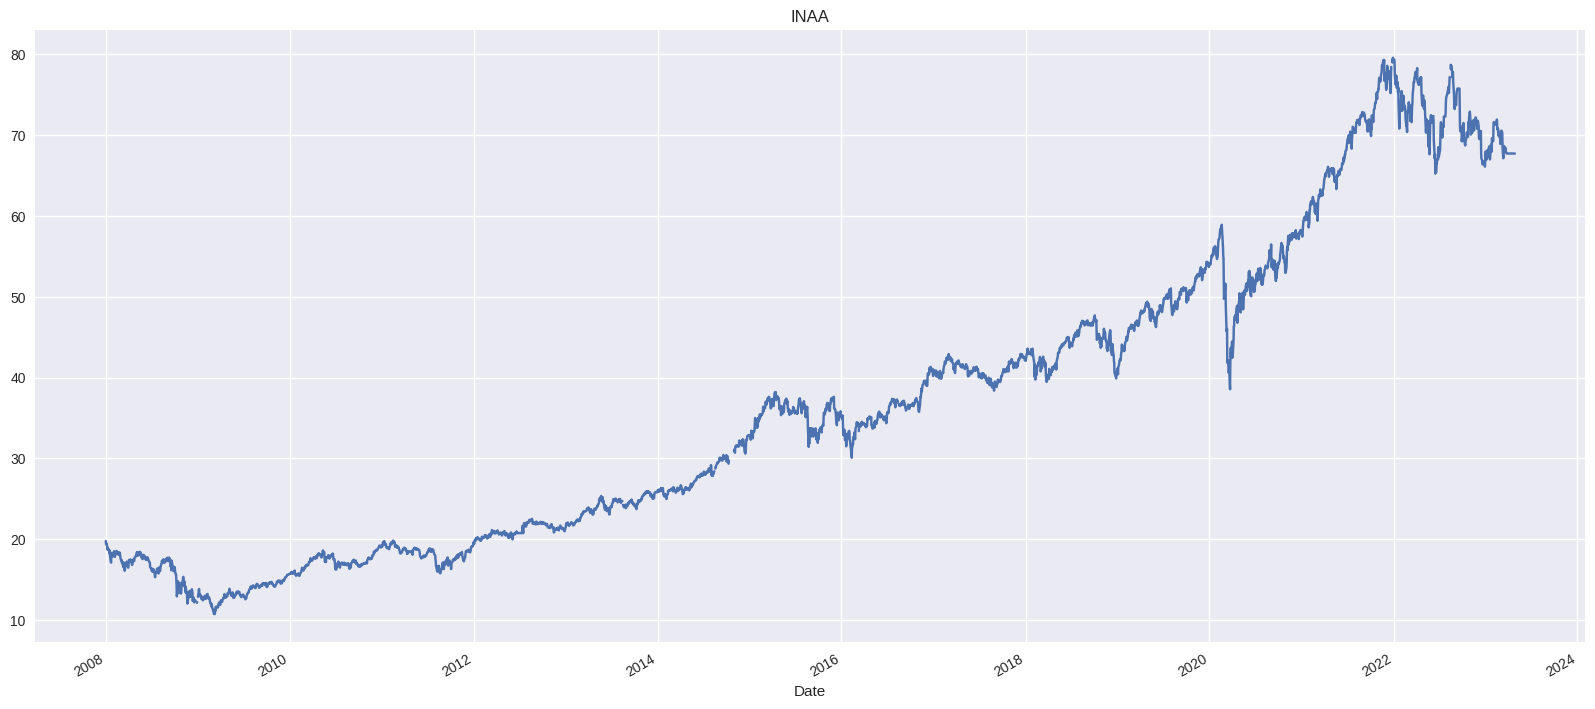

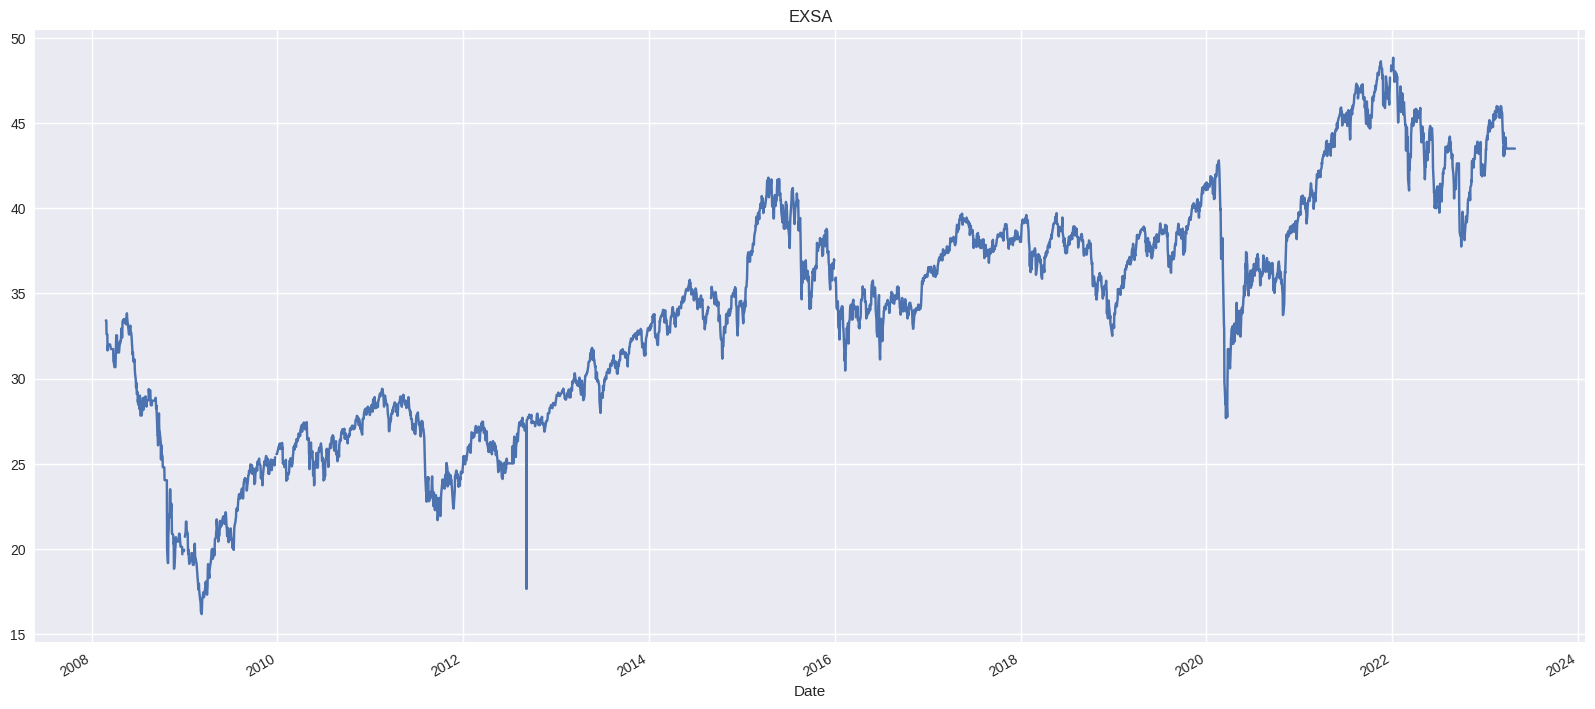

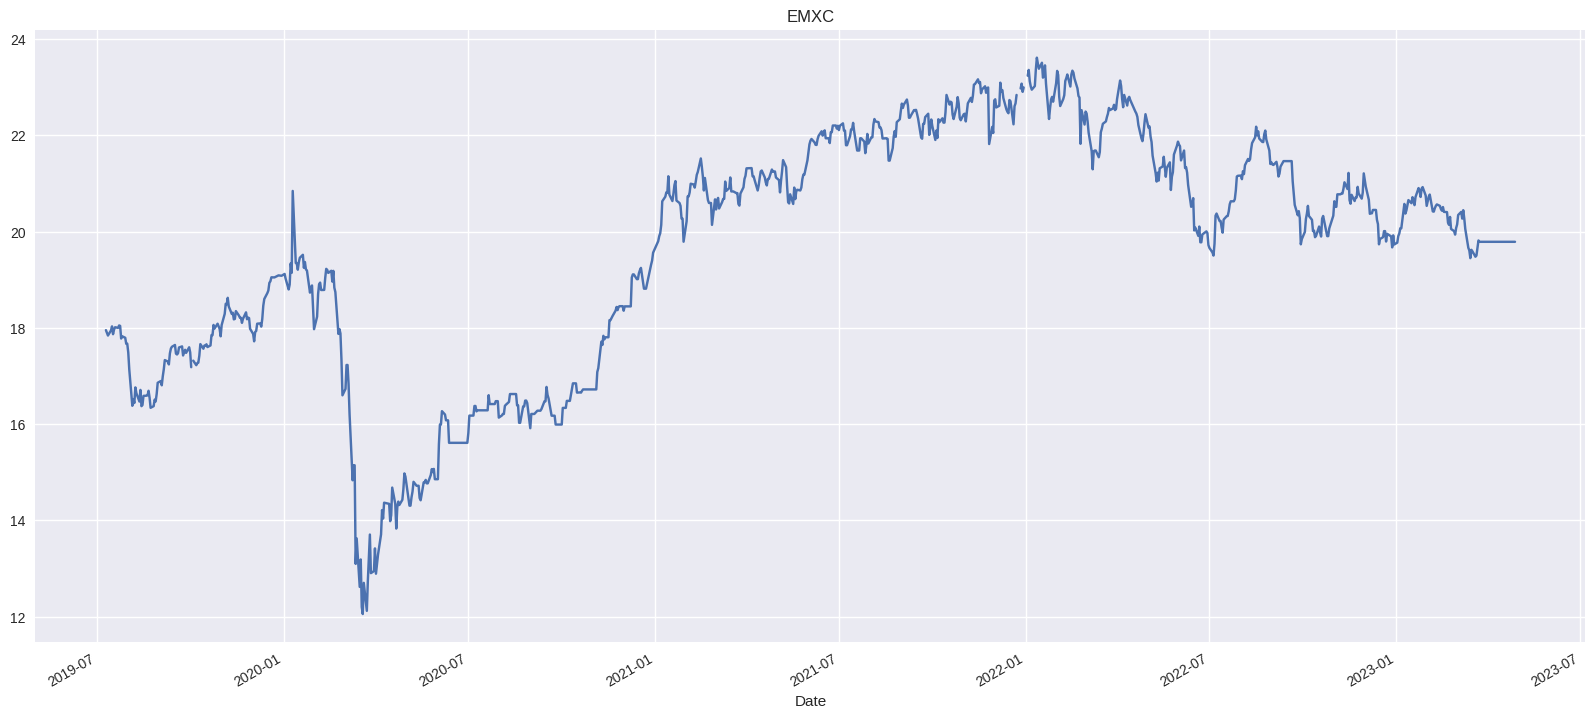

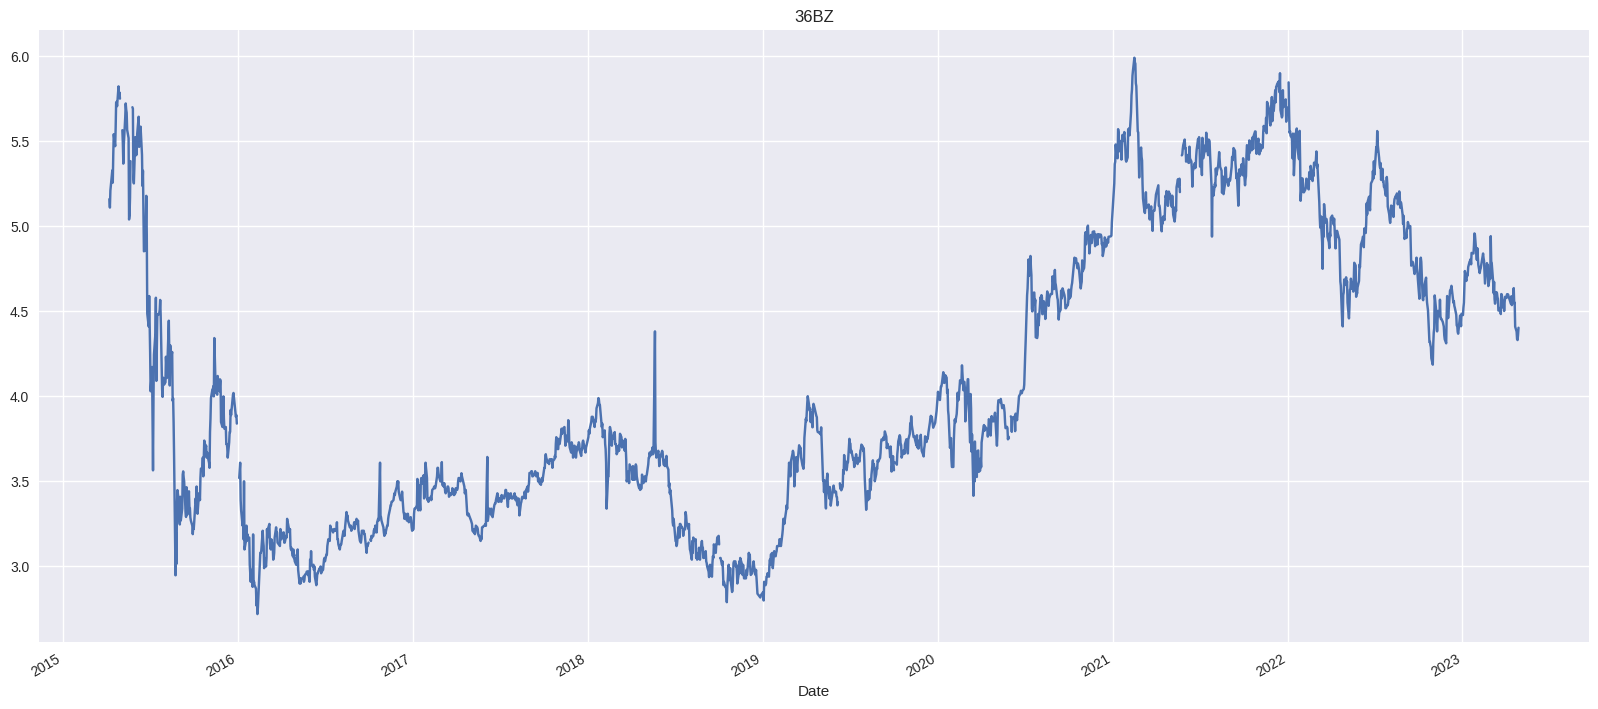

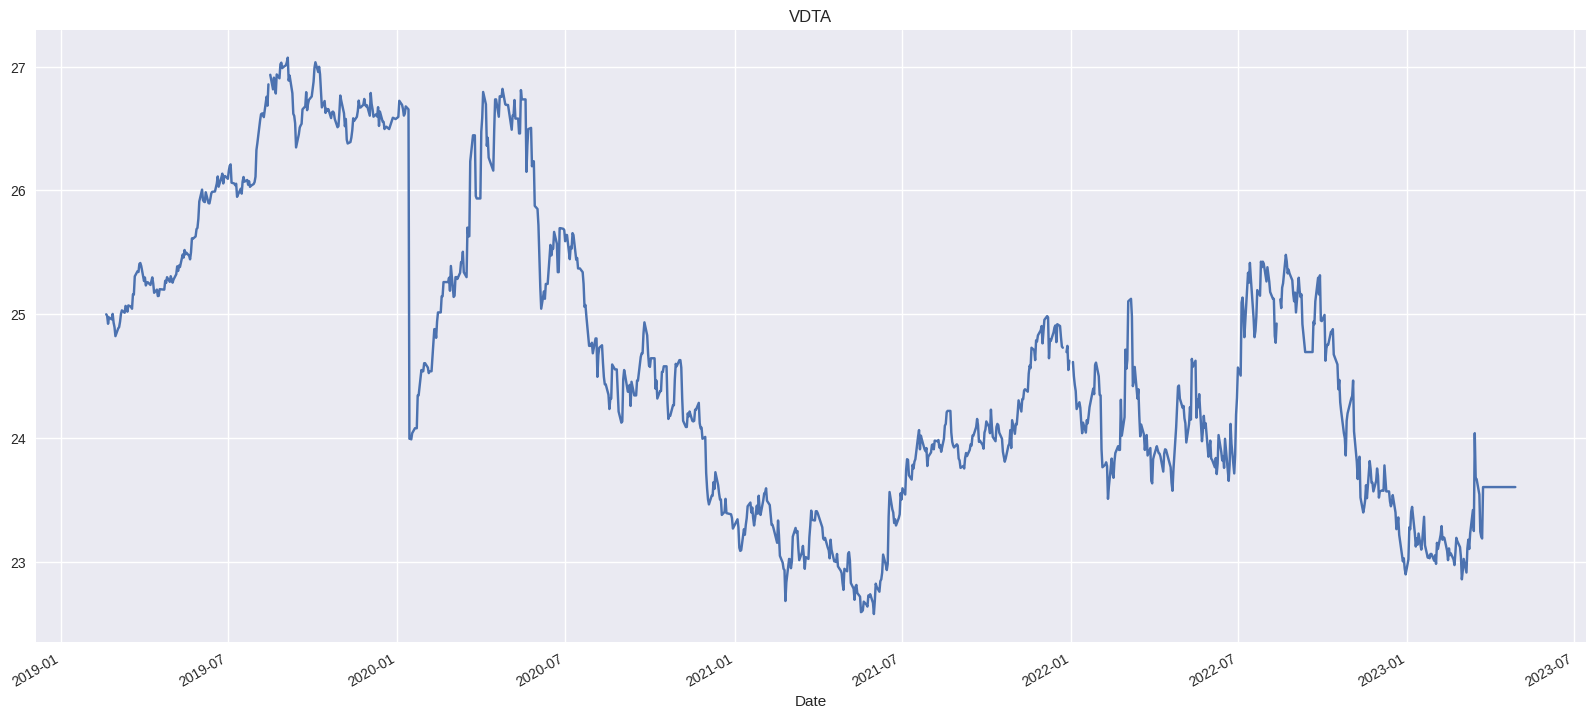

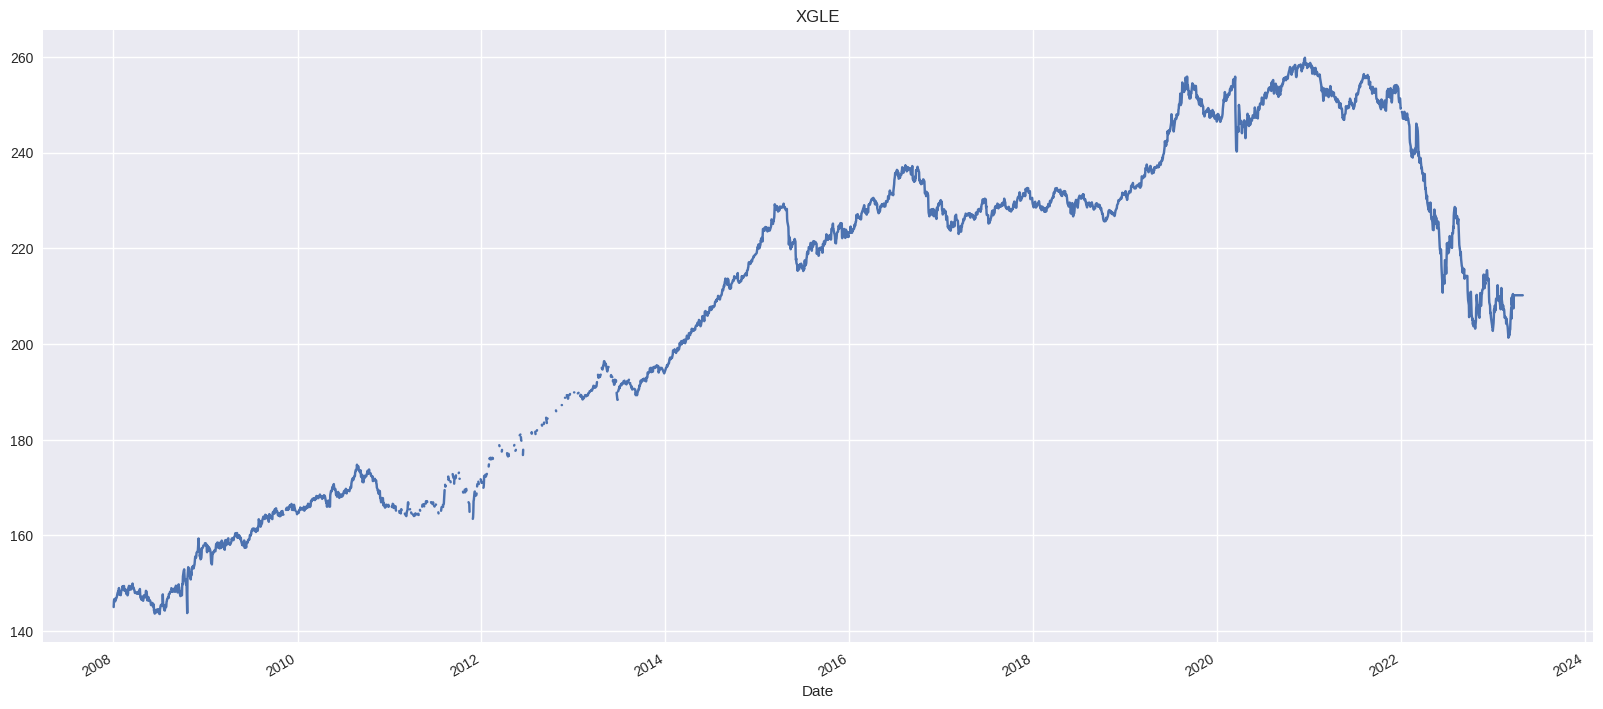

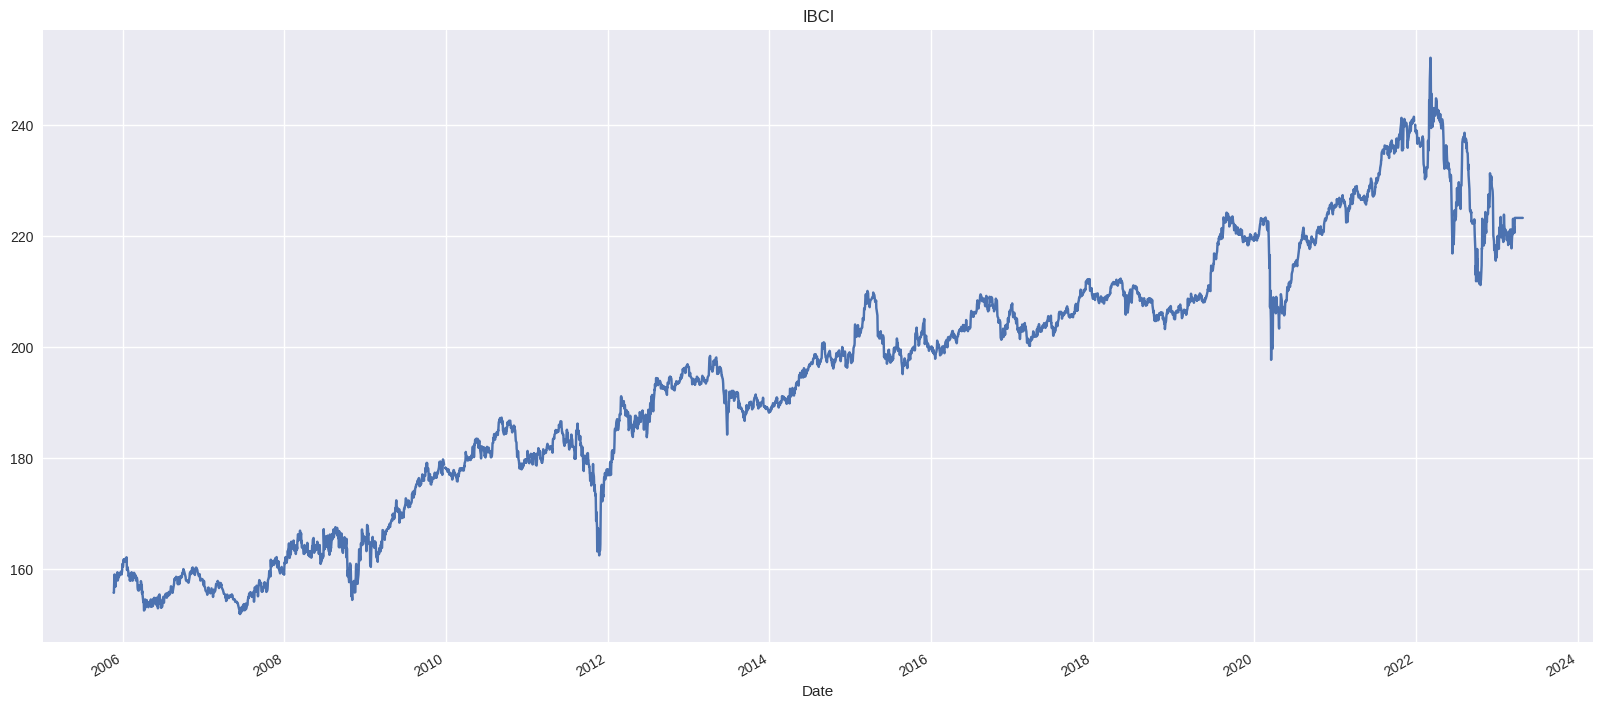

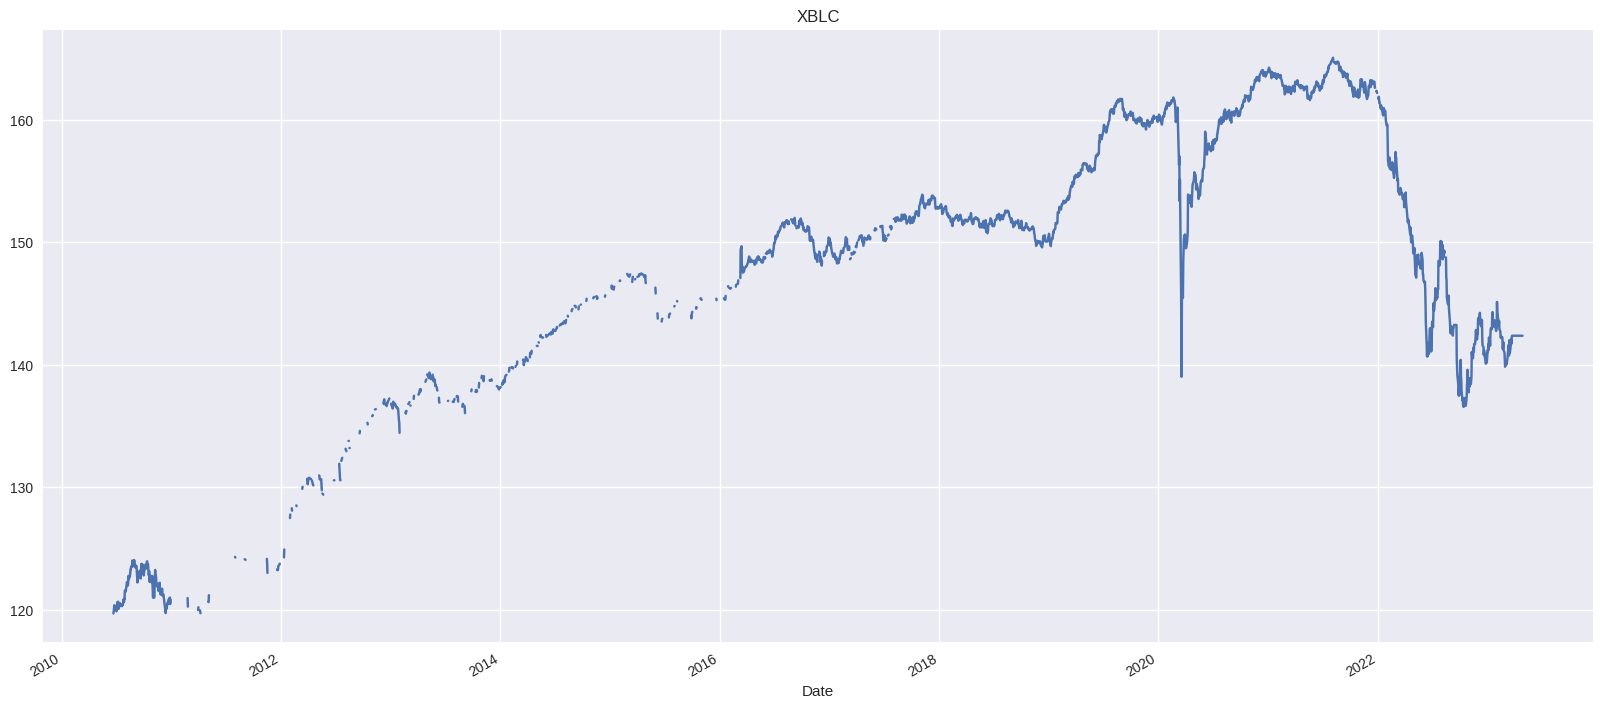

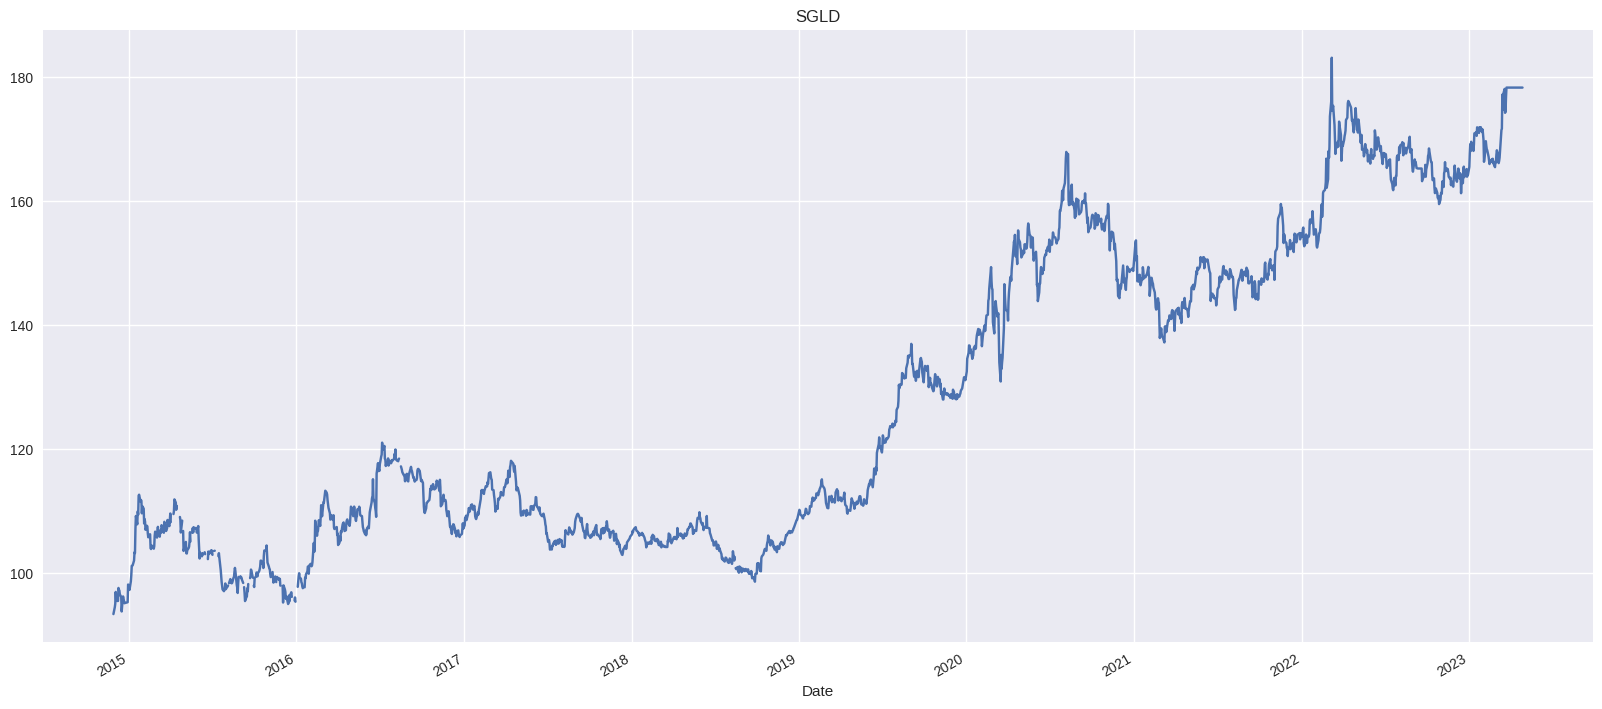

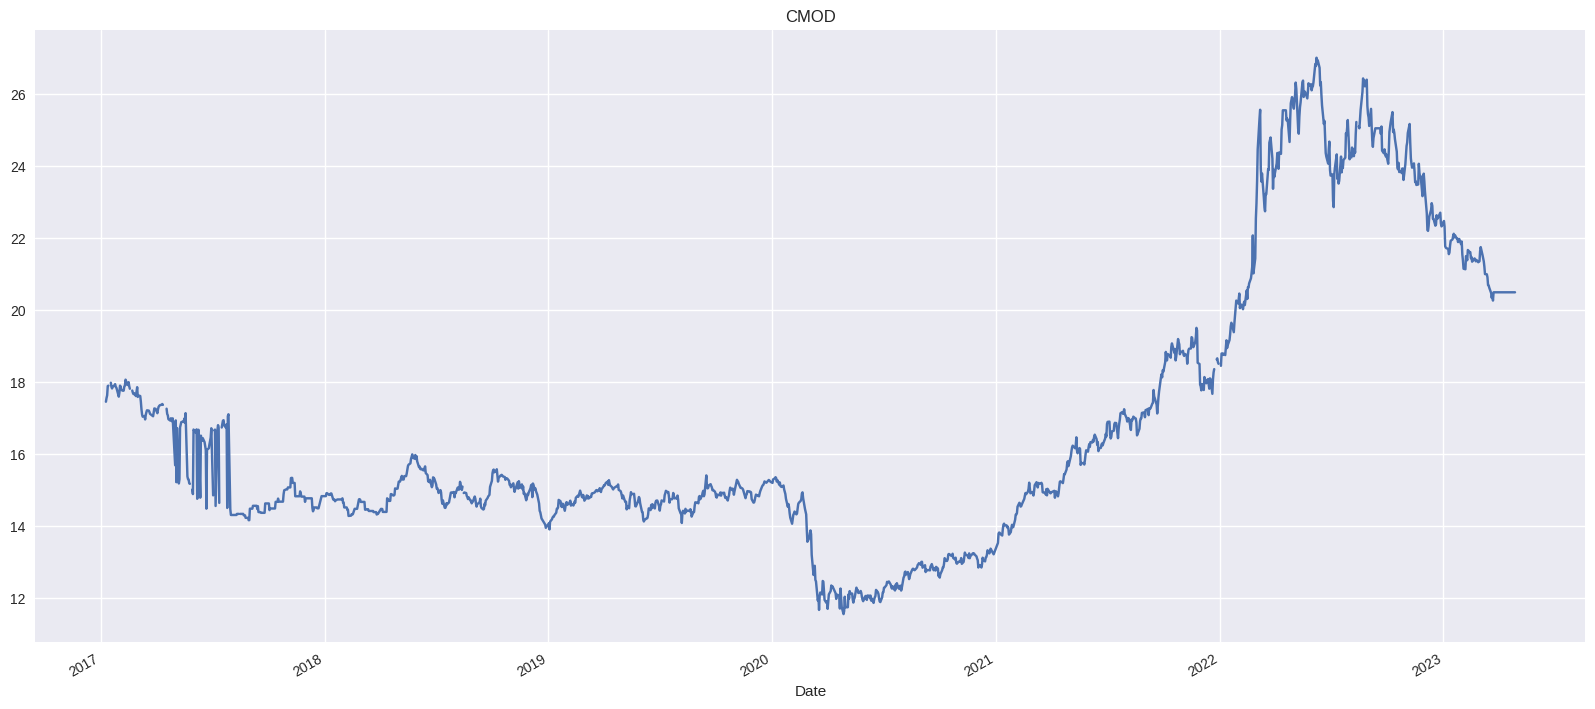

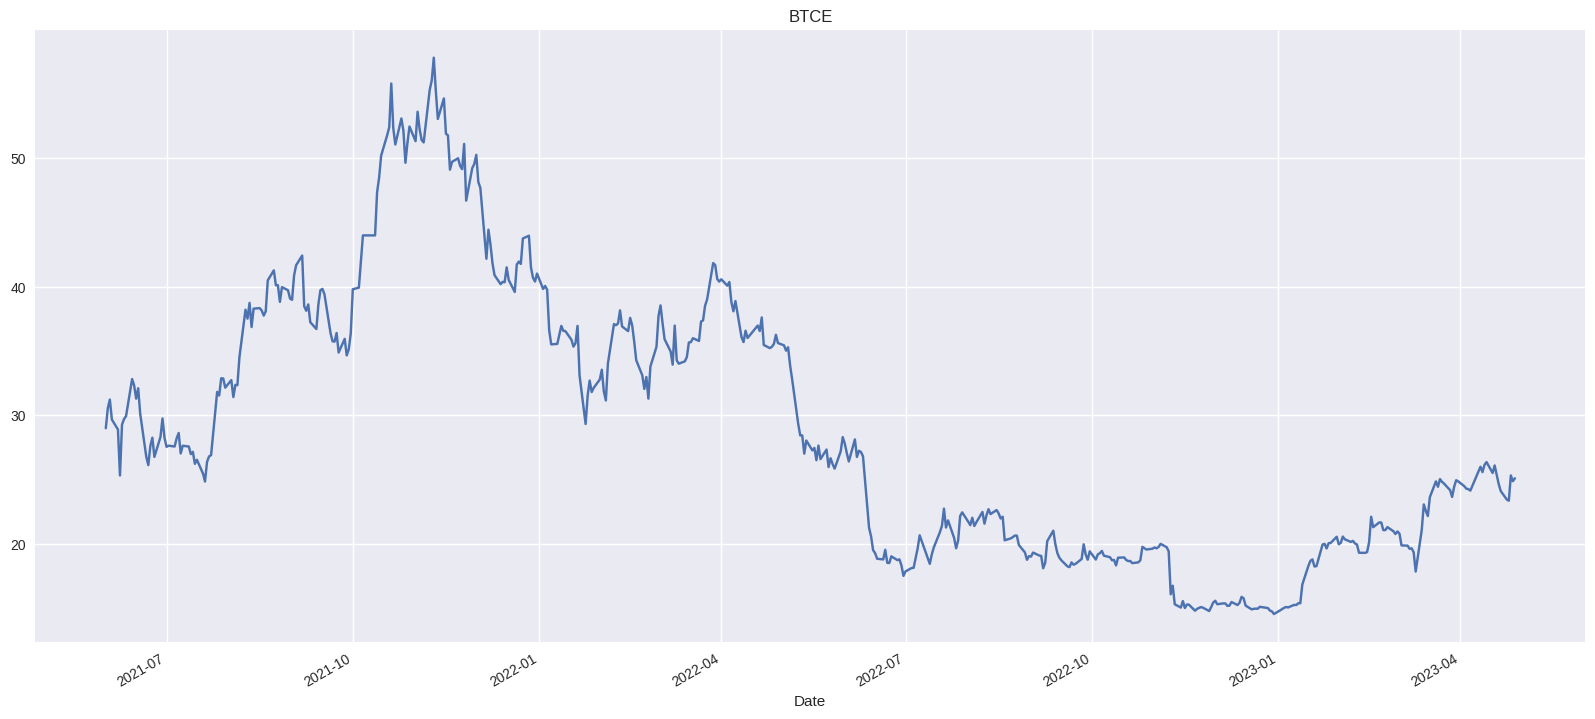

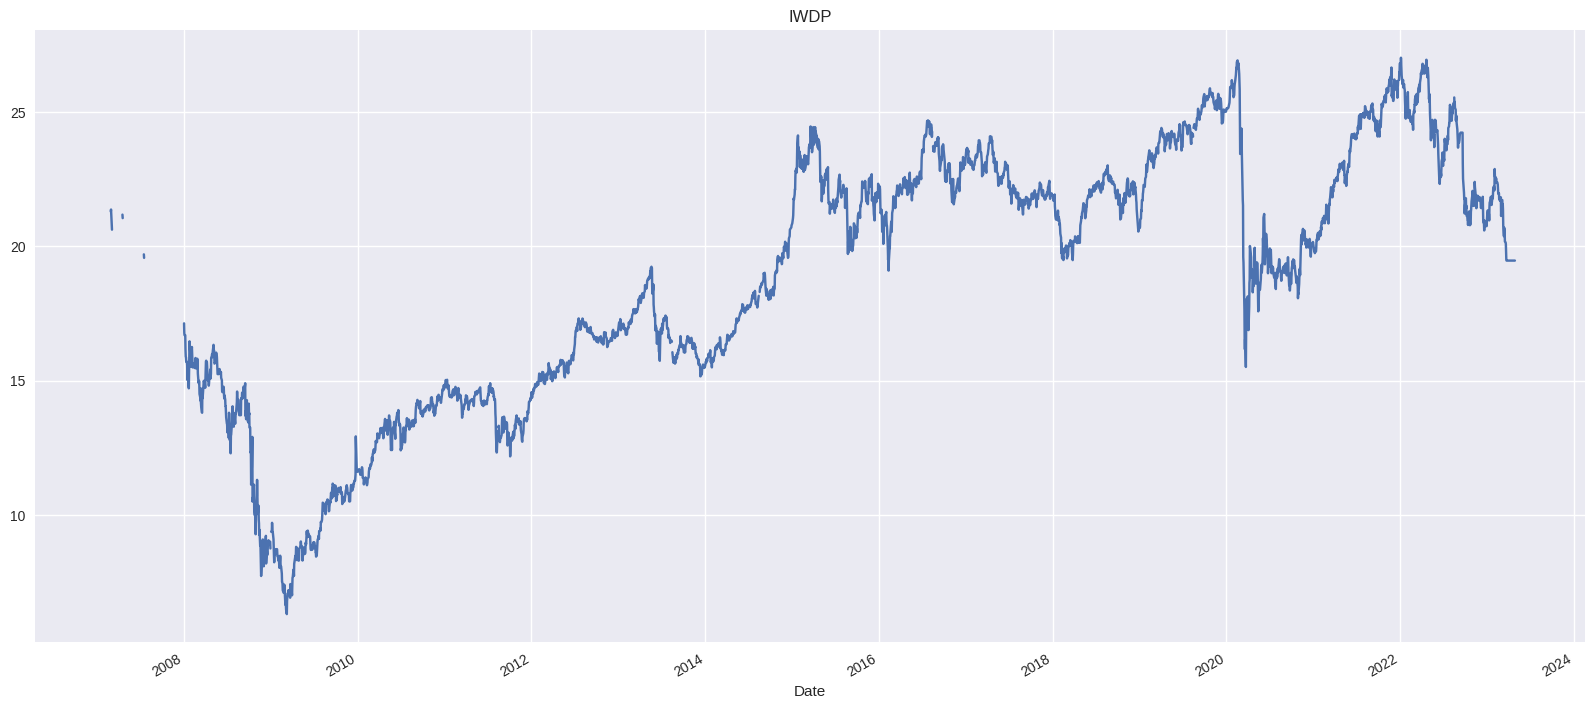

In [ ]:
for c in dati.columns:
  plt.figure()
  plt.title(c)
  dati[c].plot(figsize=(20,9))
  plt.show()

36BZ -> da 6-2018

EXSA -> da 1-2013

CMOD -> da 9-2017



In [ ]:
if "36BZ" in dati.columns:
  dati["36BZ"].loc[:pd.to_datetime("2018-06-01")]=np.nan
if "EXSA" in dati.columns:
  dati["EXSA"].loc[:pd.to_datetime("2013-01-01")]=np.nan
if "CMOD" in dati.columns:
  dati["CMOD"].loc[:pd.to_datetime("2017-09-01")]=np.nan

In [ ]:
# riempio i missing di al massimo una settimana
dati.ffill(limit=5,inplace=True)

In [ ]:
rendimenti = dati.pct_change(1)
(rendimenti.mean()+1)**253-1

INAA    0.102462
EXSA    0.054419
EMXC    0.049477
36BZ    0.073135
VDTA   -0.008955
XGLE    0.025719
IBCI    0.023434
XBLC    0.014404
SGLD    0.088349
CMOD    0.075995
BTCE    0.139308
IWDP    0.015668
dtype: float64

<Axes: >

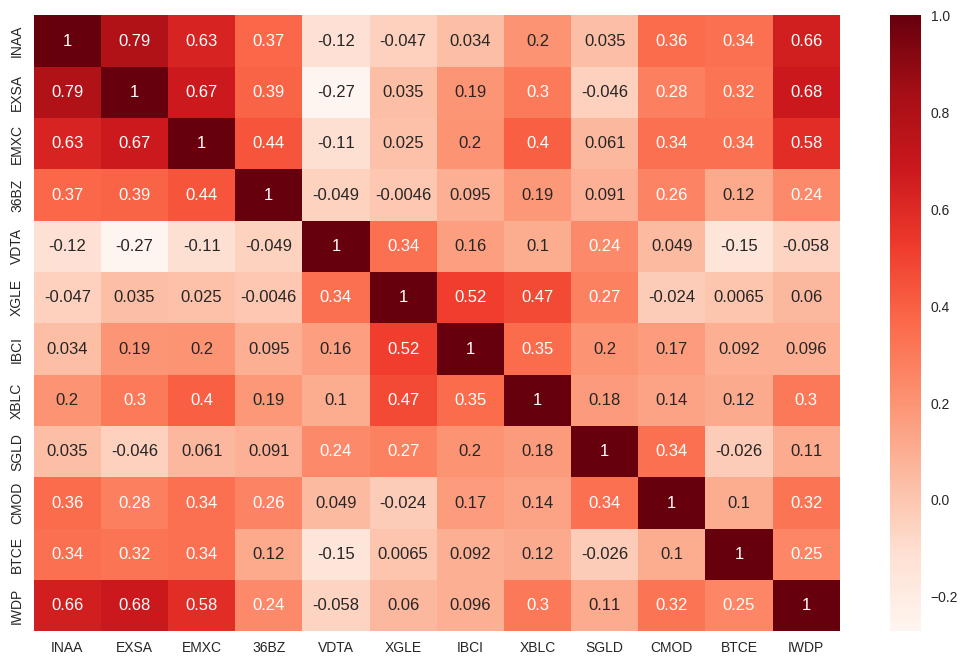

In [ ]:
plt.figure(figsize=(13,8))
#seaborn.set(font_scale=1.2)
seaborn.heatmap(rendimenti.corr(),cmap="Reds", annot=True, annot_kws={"size":12})

In [ ]:
# se io volessi analizzare tutti i portafogli equally weighted di N etf, quanti casi dovrei analizzare?
x=np.math.factorial(len(dati.columns))
for i in range(2,len(dati.columns)):
  print(i,x/np.math.factorial(len(dati.columns)-i))

2 132.0
3 1320.0
4 11880.0
5 95040.0
6 665280.0
7 3991680.0
8 19958400.0
9 79833600.0
10 239500800.0
11 479001600.0


In [ ]:
quante=10000
cov = rendimenti.cov()*100*253
medie = ((rendimenti.mean()+1)**253-1)*100
tabella = pd.DataFrame(columns=["rendimento","varianza","quasi Sharpe"]+nomi)
tabella1 = pd.DataFrame(columns=["rendimento","varianza","quasi Sharpe"]+nomi)
for k in range(len(dati.columns)):
  w = np.zeros(len(dati.columns))
  w[k]=1.00
  w = w/sum(w)
  rend = np.dot(medie,w)
  vol = np.dot(w,np.dot(cov,w))
  tabella1.loc[k]=[rend,vol,rend/vol]+list(w*100)
for k in range(quante):
#  w = np.random.random(len(dati.columns))
  w=np.random.normal(1,0.2,len(dati.columns))
  w[w>1]=w[w>1]-1
  w = w/sum(w)
  rend = np.dot(medie,w)
  vol = np.dot(w,np.dot(cov,w))
  tabella.loc[k]=[rend,vol,rend/vol]+list(w*100)
  if k%1000==0:
    print(k)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


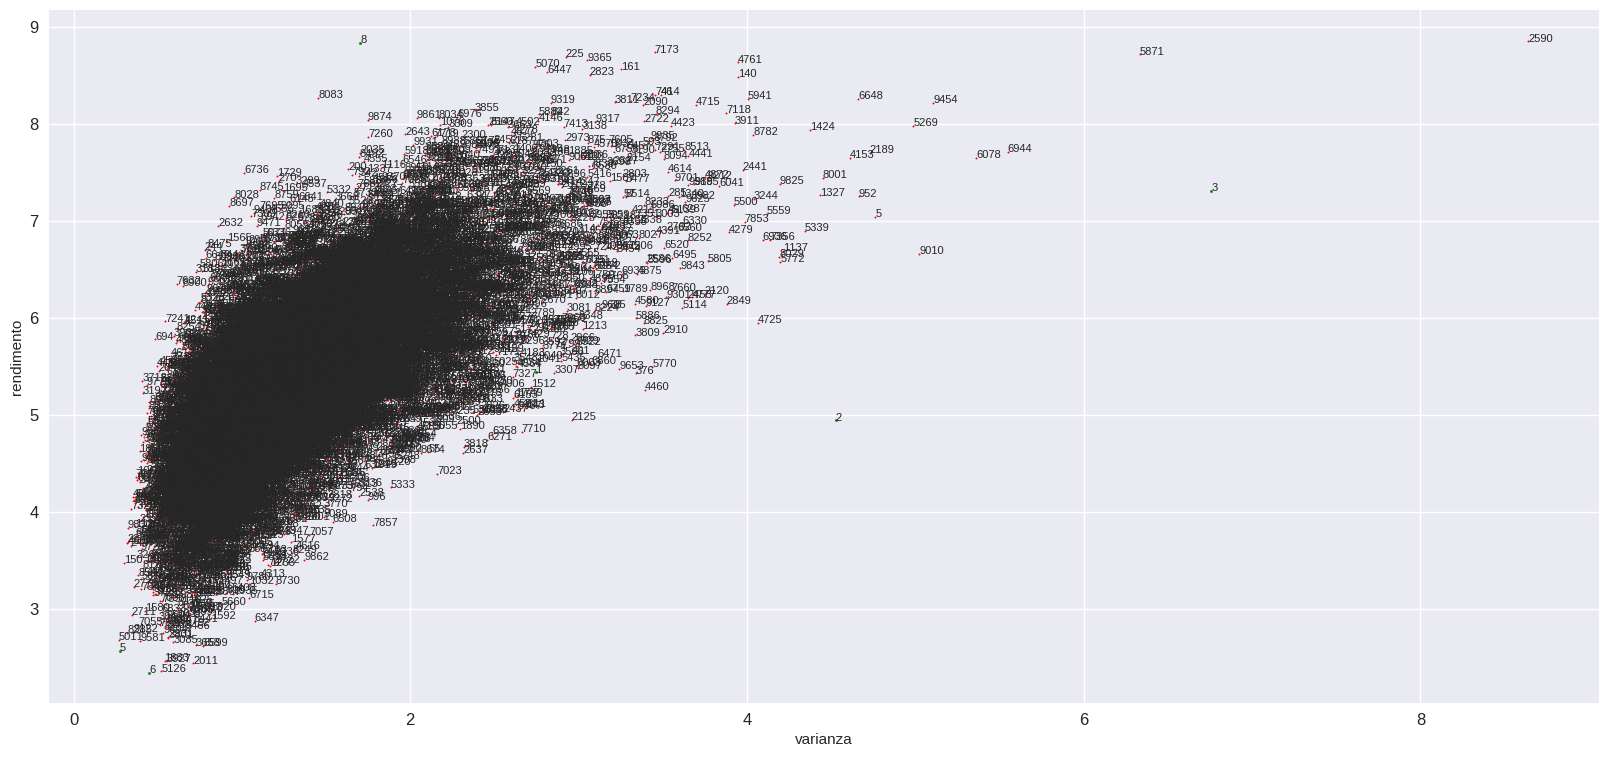

In [ ]:
ax = tabella.plot.scatter(x="varianza",y="rendimento", figsize=(20,9),fontsize=12,s=1,color="r")
axes = plt.gca()
x=axes.get_xlim()
y=axes.get_ylim()
tabella1.plot.scatter(ax=ax,x="varianza",y="rendimento", figsize=(20,9),fontsize=12,s=3,color="g",xlim=x,ylim=y)
for i in tabella.index:
    plt.annotate(i,xy=(tabella.loc[i,"varianza"],tabella.loc[i,"rendimento"]),size=8)
for i in tabella1.index:
    plt.annotate(i,xy=(tabella1.loc[i,"varianza"],tabella1.loc[i,"rendimento"]),size=8)

In [ ]:
tabella1

rendimento   varianza  quasi Sharpe  iShares MSCI North America  \
0    10.246201   3.570461      2.869714                       100.0   
1     5.441864   2.743674      1.983422                         0.0   
2     4.947691   4.527517      1.092805                         0.0   
3     7.313501   6.758786      1.082073                         0.0   
4    -0.895534   0.898529     -0.996666                         0.0   
5     2.571863   0.275200      9.345439                         0.0   
6     2.343425   0.447658      5.234860                         0.0   
7     1.440367   0.182879      7.876065                         0.0   
8     8.834892   1.702841      5.188325                         0.0   
9     7.599530   2.462479      3.086130                         0.0   
10   13.930785  40.814063      0.341323                         0.0   
11    1.566845   4.860725      0.322348                         0.0   

    iShares STOXX Europe 600  Lyxor MSCI Emerging Markets Ex China  \
0                        0.0                                   0.0   
1                      100.0                                   0.0   
2                        0.0                                 100.0   
3                        0.0                                   0.0   
4                        0.0                                   0.0   
5                        0.0                                   0.0   
6                        0.0                                   0.0   
7                        0.0                                   0.0   
8                        0.0                                   0.0   
9                        0.0                                   0.0   
10                       0.0                                   0.0   
11                       0.0                                   0.0   

    iShares MSCI China A  Vanguard USD Treasury Bond  \
0                    0.0                         0.0   
1                    0.0                         0.0   
2                    0.0                         0.0   
3                  100.0                         0.0   
4                    0.0                       100.0   
5                    0.0                         0.0   
6                    0.0                         0.0   
7                    0.0                         0.0   
8                    0.0                         0.0   
9                    0.0                         0.0   
10                   0.0                         0.0   
11                   0.0                         0.0   

    Xtrackers Eurozone Government Bond  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   
5                                100.0   
6                                  0.0   
7                                  0.0   
8                                  0.0   
9                                  0.0   
10                                 0.0   
11                                 0.0   

    iShares Euro Inflation Linked Government Bond  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   
5                                             0.0   
6                                           100.0   
7                                             0.0   
8                                             0.0   
9                                             0.0   
10                                            0.0   
11                                            0.0   

    Xtrackers II EUR Corporate Bond  Invesco Physical Gold  \
0                               0.0                    0.0   
1                               0.0                    0.0   
2                

In [ ]:
tabella.loc[8083]

rendimento                                        8.273858
varianza                                          1.454043
quasi Sharpe                                      5.690243
iShares MSCI North America                       26.227371
iShares STOXX Europe 600                          2.541913
Lyxor MSCI Emerging Markets Ex China              3.033809
iShares MSCI China A                              1.363474
Vanguard USD Treasury Bond                        0.914241
Xtrackers Eurozone Government Bond                3.961818
iShares Euro Inflation Linked Government Bond     8.344035
Xtrackers II EUR Corporate Bond                   0.541698
Invesco Physical Gold                            23.512095
Invesco Bloomberg Commodity                      18.746366
ETC Group Physical Bitcoin                        9.948503
iShares Developed Markets Property Yield          0.864677
Name: 8083, dtype: float64

In [ ]:
tabella["rendimento"].idxmax(),tabella.loc[tabella["rendimento"].idxmax()]

(2590,
 rendimento                                        8.855422
 varianza                                          8.639209
 quasi Sharpe                                      1.025027
 iShares MSCI North America                        8.330665
 iShares STOXX Europe 600                          0.904429
 Lyxor MSCI Emerging Markets Ex China              0.398676
 iShares MSCI China A                             10.927911
 Vanguard USD Treasury Bond                        0.628059
 Xtrackers Eurozone Government Bond                2.088818
 iShares Euro Inflation Linked Government Bond    11.221724
 Xtrackers II EUR Corporate Bond                  10.171714
 Invesco Physical Gold                             5.030931
 Invesco Bloomberg Commodity                       1.249802
 ETC Group Physical Bitcoin                       43.417859
 iShares Developed Markets Property Yield          5.629412
 Name: 2590, dtype: float64)

In [ ]:
tabella["varianza"].idxmin(),tabella.loc[tabella["varianza"].idxmin()]

(5011,
 rendimento                                        2.682501
 varianza                                          0.269672
 quasi Sharpe                                      9.947264
 iShares MSCI North America                        2.006410
 iShares STOXX Europe 600                          0.198444
 Lyxor MSCI Emerging Markets Ex China              1.484104
 iShares MSCI China A                              0.856548
 Vanguard USD Treasury Bond                       21.780131
 Xtrackers Eurozone Government Bond                3.554756
 iShares Euro Inflation Linked Government Bond    24.422966
 Xtrackers II EUR Corporate Bond                  22.600345
 Invesco Physical Gold                             7.727156
 Invesco Bloomberg Commodity                       9.888534
 ETC Group Physical Bitcoin                        0.127555
 iShares Developed Markets Property Yield          5.353051
 Name: 5011, dtype: float64)

In [ ]:
tabella["quasi Sharpe"].idxmax(),tabella.loc[tabella["quasi Sharpe"].idxmax()]

(3718,
 rendimento                                        5.352116
 varianza                                          0.408443
 quasi Sharpe                                     13.103690
 iShares MSCI North America                        6.984195
 iShares STOXX Europe 600                          2.155194
 Lyxor MSCI Emerging Markets Ex China              0.006881
 iShares MSCI China A                              1.111327
 Vanguard USD Treasury Bond                        6.021400
 Xtrackers Eurozone Government Bond               28.271684
 iShares Euro Inflation Linked Government Bond     9.792872
 Xtrackers II EUR Corporate Bond                   2.859458
 Invesco Physical Gold                            28.841432
 Invesco Bloomberg Commodity                      11.097159
 ETC Group Physical Bitcoin                        0.465166
 iShares Developed Markets Property Yield          2.393234
 Name: 3718, dtype: float64)

# Il mio portafoglio

In [ ]:
etf=[["iShares MSCI North America","INAA"],["iShares STOXX Europe 600","EXSA"],
     ["Lyxor MSCI Emerging Markets Ex China","EMXC"],["iShares MSCI China A","36BZ"],
     ["Vanguard USD Treasury Bond","VDTA"],
     ["Xtrackers Eurozone Government Bond","XGLE"],["iShares Euro Inflation Linked Government Bond","IBCI"],["Xtrackers II EUR Corporate Bond","XBLC"],
     ["Invesco Physical Gold","SGLD"],["Invesco Bloomberg Commodity","CMOD"],["ETC Group Physical Bitcoin","BTCE"],
     ["iShares Developed Markets Property Yield","IWDP"]] 

nomi=list(np.array(etf)[:,0])
tickers=list(np.array(etf)[:,1])
tickersMI=[t + ".MI" for t in tickers]
tickersF=[t + ".F" for t in tickers]
tickersPA=[t + ".PA" for t in tickers]

In [ ]:
datiMI=yf.download(tickersMI)["Adj Close"]
datiF=yf.download(tickersF)["Adj Close"]
datiPA=yf.download(tickersPA)["Adj Close"]

[*********************100%***********************]  12 of 12 completed

2 Failed downloads:
- BTCE.MI: No timezone found, symbol may be delisted
- 36BZ.MI: No timezone found, symbol may be delisted
[*********************100%***********************]  12 of 12 completed

7 Failed downloads:
- VDTA.F: No timezone found, symbol may be delisted
- IWDP.F: No timezone found, symbol may be delisted
- SGLD.F: No timezone found, symbol may be delisted
- CMOD.F: No timezone found, symbol may be delisted
- XBLC.F: No timezone found, symbol may be delisted
- INAA.F: No timezone found, symbol may be delisted
- BTCE.F: No timezone found, symbol may be delisted
[*********************100%***********************]  12 of 12 completed

9 Failed downloads:
- XBLC.PA: No timezone found, symbol may be delisted
- EMXC.PA: No timezone found, symbol may be delisted
- SGLD.PA: No timezone found, symbol may be delisted
- XGLE.PA: No timezone found, symbol may be delisted
- INAA.PA: 1d data not available for start

In [ ]:
# rimetto a posto le colonne che non ho capito perché me le scombina
datiMI=datiMI.reindex(tickersMI, axis=1)
datiPA=datiPA.reindex(tickersPA, axis=1)
datiF=datiF.reindex(tickersF, axis=1)
# cambio i nomi alle colonne mettendoli uguali
datiMI.rename(columns = dict(zip(tickersMI, tickers)),inplace=True)
datiF.rename(columns = dict(zip(tickersF, tickers)),inplace=True)
datiPA.rename(columns = dict(zip(tickersPA, tickers)),inplace=True)
# stesso indice per tutti!
dati = datiMI.reindex( index=datiMI.index.union(datiPA.index).union(datiF.index) )
datiPA = datiPA.reindex( index=dati.index )
datiF = datiF.reindex( index=dati.index )

In [ ]:
# BRA.F non è BRA.MI.... 'azzo di tickers e chi li ha inventati!
if "BRA" in tickers:
  datiF["BRA"]=np.nan

# mi vergogno di questo pezzo qui sotto...
for i in dati.index:
  for c in dati:
    if np.isnan(dati[c].loc[i]):
      if not np.isnan(datiF[c].loc[i]):
        dati[c].loc[i] = datiF[c].loc[i]
      elif not np.isnan(datiPA[c].loc[i]):
        dati[c].loc[i] = datiPA[c].loc[i]
dati        

INAA  EXSA    EMXC    36BZ    VDTA        XGLE        IBCI  \
Date                                                                          
2005-11-21        NaN   NaN     NaN     NaN     NaN         NaN  155.800003   
2005-11-22        NaN   NaN     NaN     NaN     NaN         NaN  155.800003   
2005-11-23        NaN   NaN     NaN     NaN     NaN         NaN  157.600006   
2005-11-24        NaN   NaN     NaN     NaN     NaN         NaN  158.500000   
2005-11-25        NaN   NaN     NaN     NaN     NaN         NaN  159.100006   
...               ...   ...     ...     ...     ...         ...         ...   
2023-04-24  67.709999  43.5  19.788  4.3810  23.605  210.179993  223.350006   
2023-04-25  67.709999  43.5  19.788  4.3360  23.605  210.179993  223.350006   
2023-04-26  67.709999  43.5  19.788  4.3310  23.605  210.179993  223.350006   
2023-04-27  67.709999  43.5  19.788  4.3605  23.605  210.179993  223.350006   
2023-04-28  67.709999  43.5  19.788  4.4035  23.605  210.179993  223.350006   

                  XBLC        SGLD  CMOD       BTCE    IWDP  
Date                                                         
2005-11-21         NaN         NaN   NaN        NaN     NaN  
2005-11-22         NaN         NaN   NaN        NaN     NaN  
2005-11-23         NaN         NaN   NaN        NaN     NaN  
2005-11-24         NaN         NaN   NaN        NaN     NaN  
2005-11-25         NaN         NaN   NaN        NaN     NaN  
...                ...         ...   ...        ...     ...  
2023-04-24  142.369995  178.229996  20.5  23.469999  19.468  
2023-04-25  142.369995  178.229996  20.5  23.379999  19.468  
2023-04-26  142.369995  178.229996  20.5  25.344000  19.468  
2023-04-27  142.369995  178.229996  20.5  24.896000  19.468  
2023-04-28  142.369995  178.229996  20.5  25.124001  19.468  

[4356 rows x 12 columns]

In [ ]:
dati.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4356 entries, 2005-11-21 00:00:00 to 2023-04-28 00:00:00
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   INAA    3876 non-null   float64
 1   EXSA    3859 non-null   float64
 2   EMXC    971 non-null    float64
 3   36BZ    2048 non-null   float64
 4   VDTA    1068 non-null   float64
 5   XGLE    3605 non-null   float64
 6   IBCI    4349 non-null   float64
 7   XBLC    2435 non-null   float64
 8   SGLD    2110 non-null   float64
 9   CMOD    1597 non-null   float64
 10  BTCE    494 non-null    float64
 11  IWDP    3930 non-null   float64
dtypes: float64(12)
memory usage: 571.4+ KB


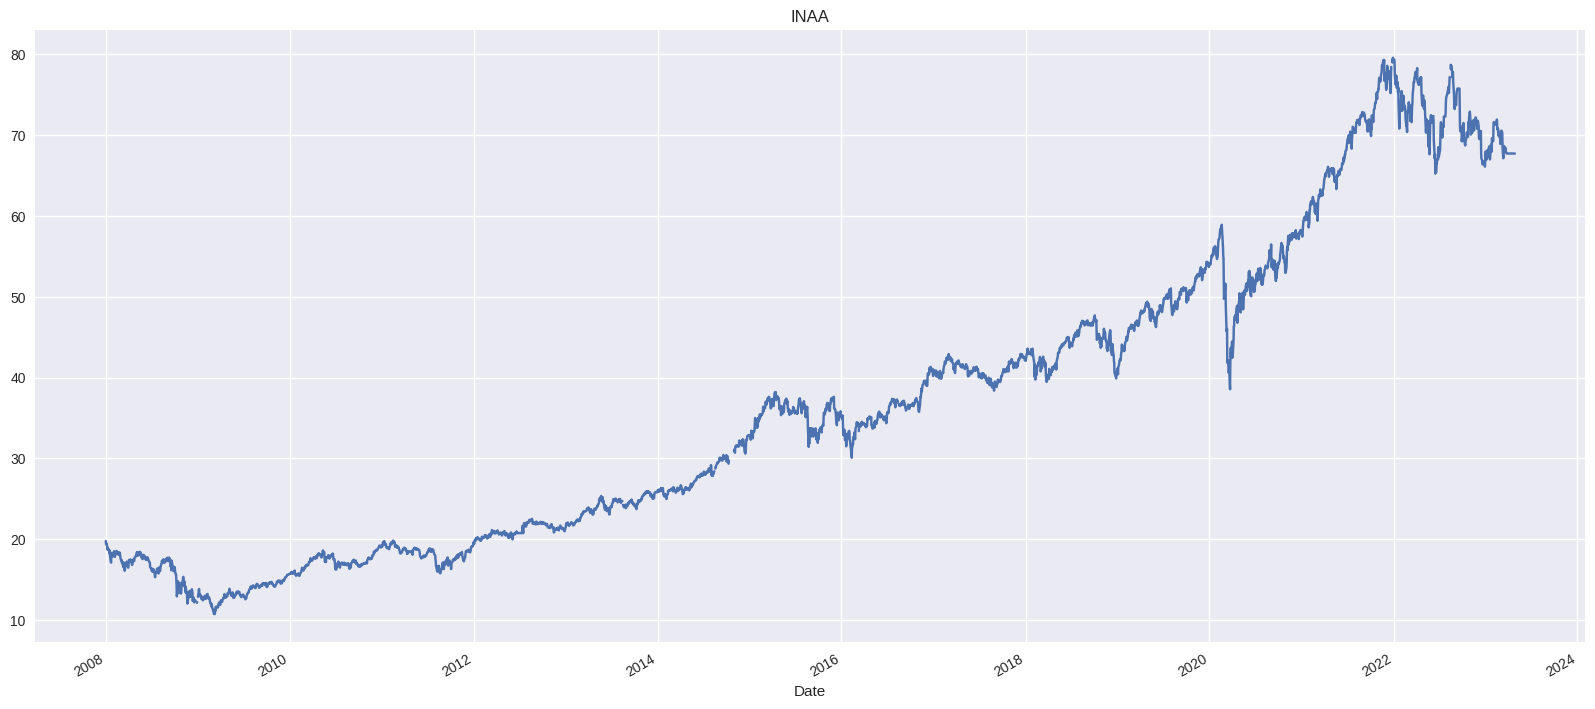

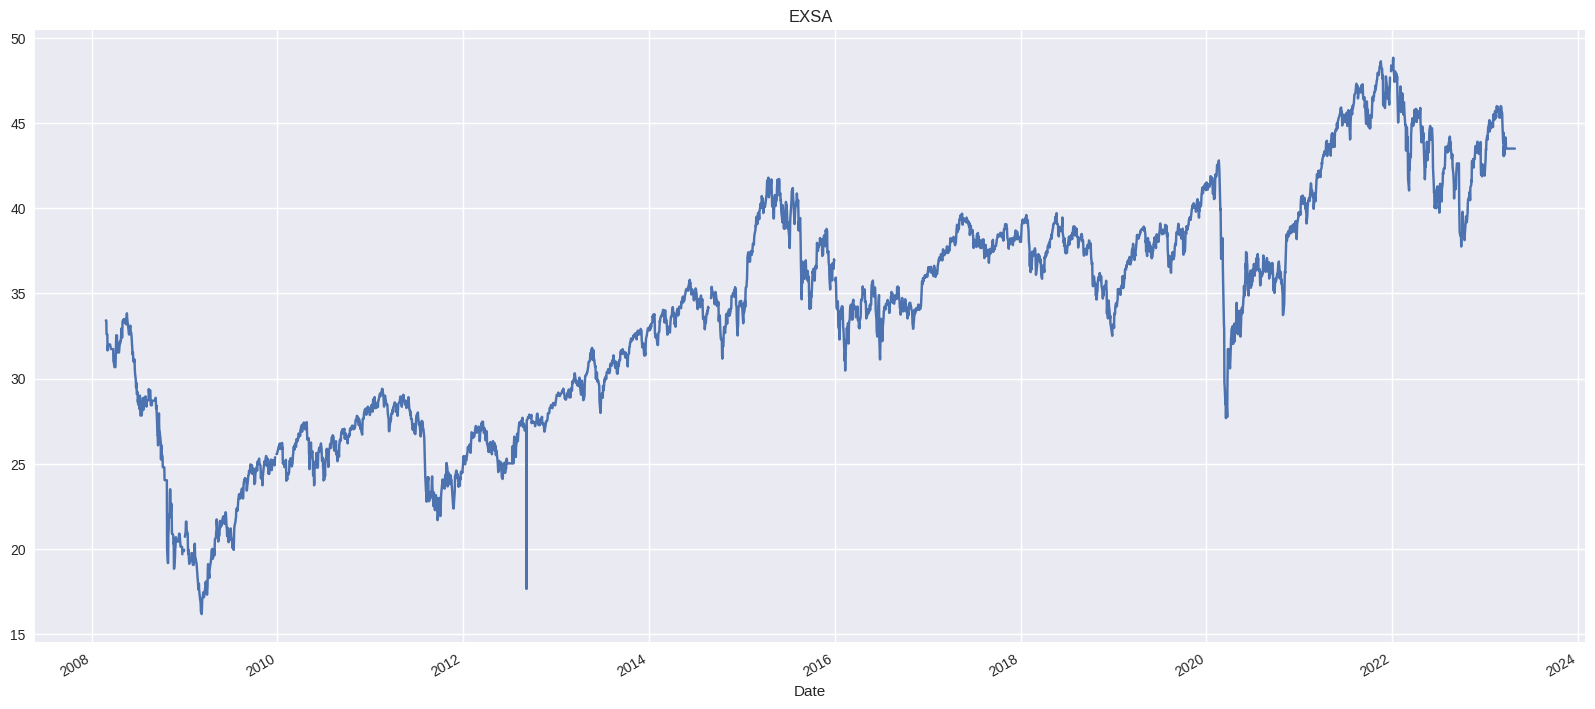

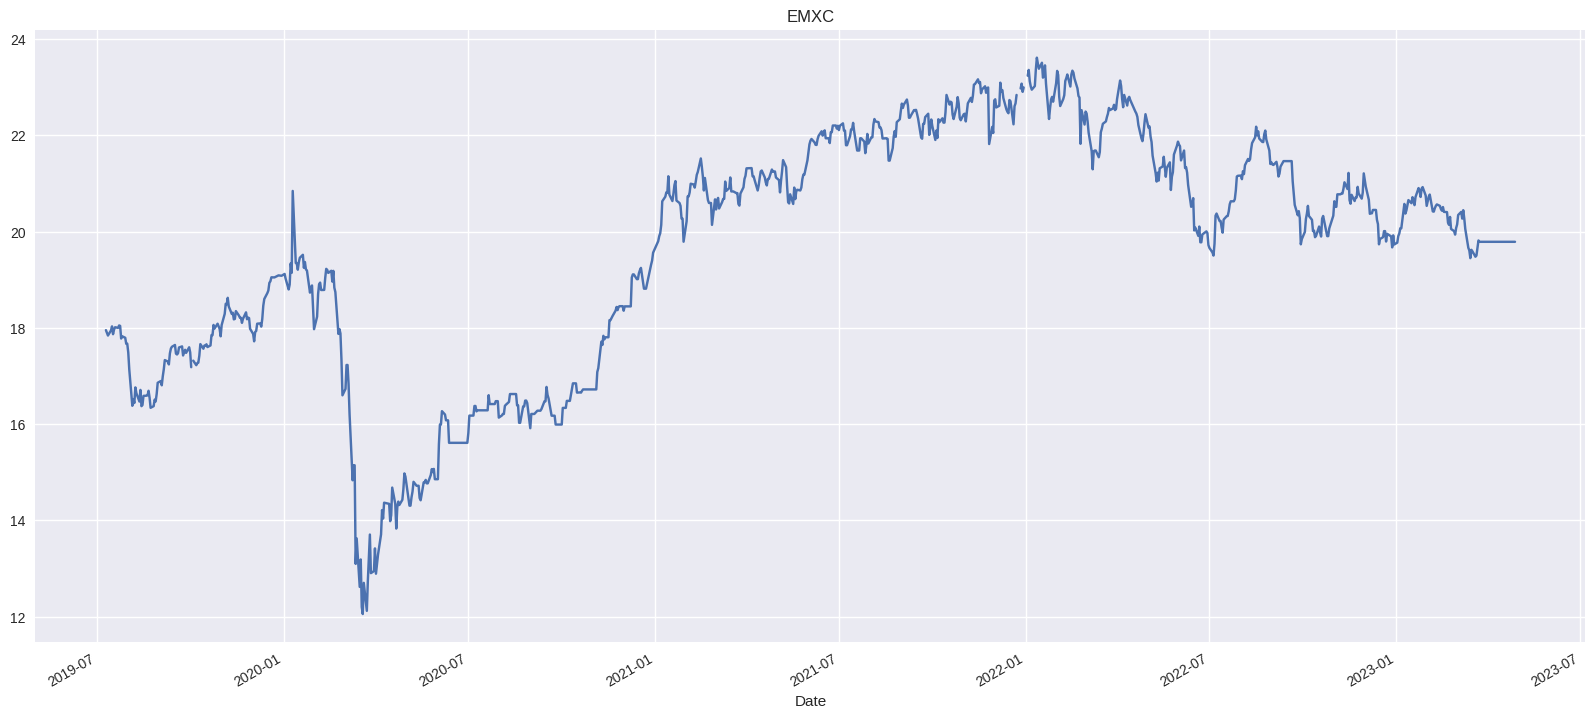

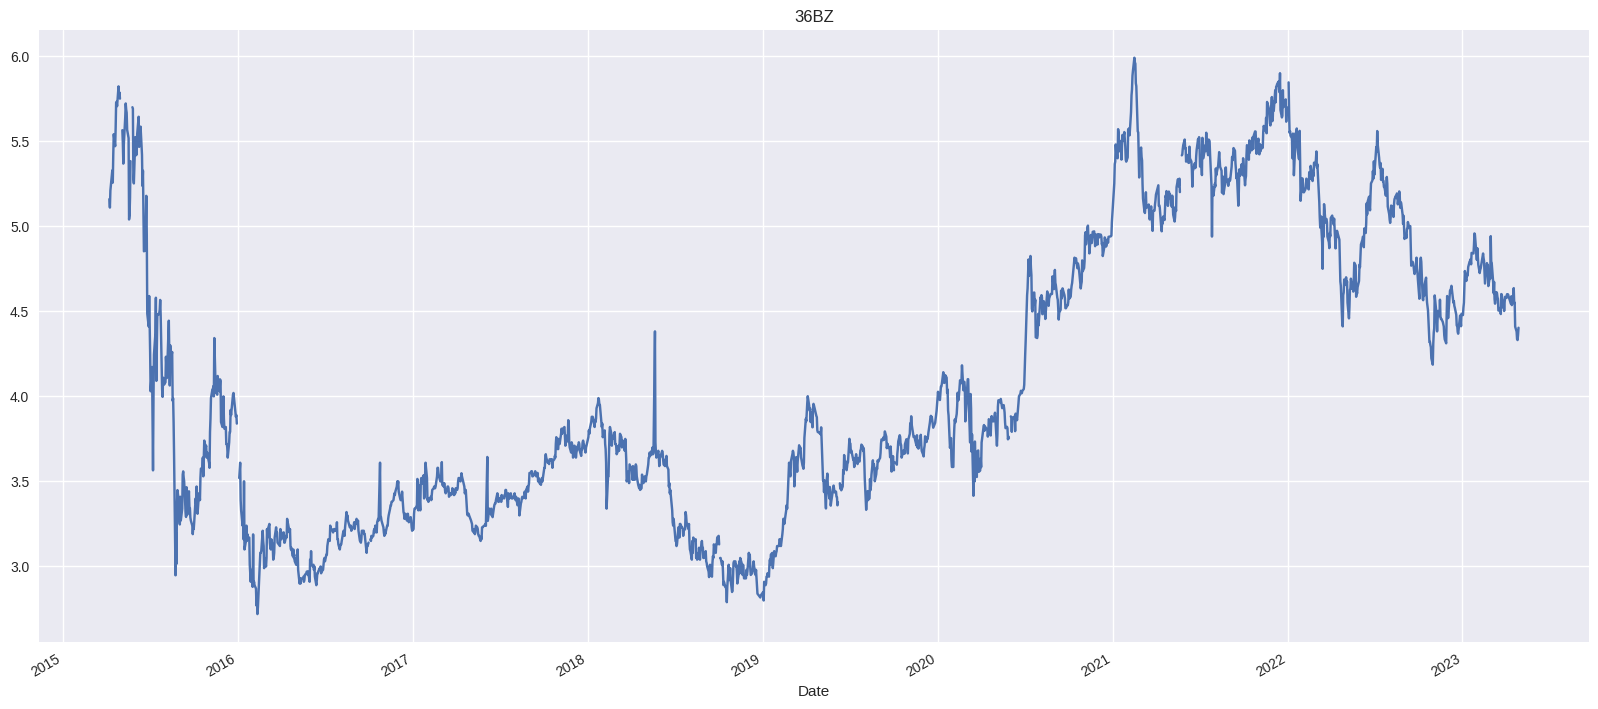

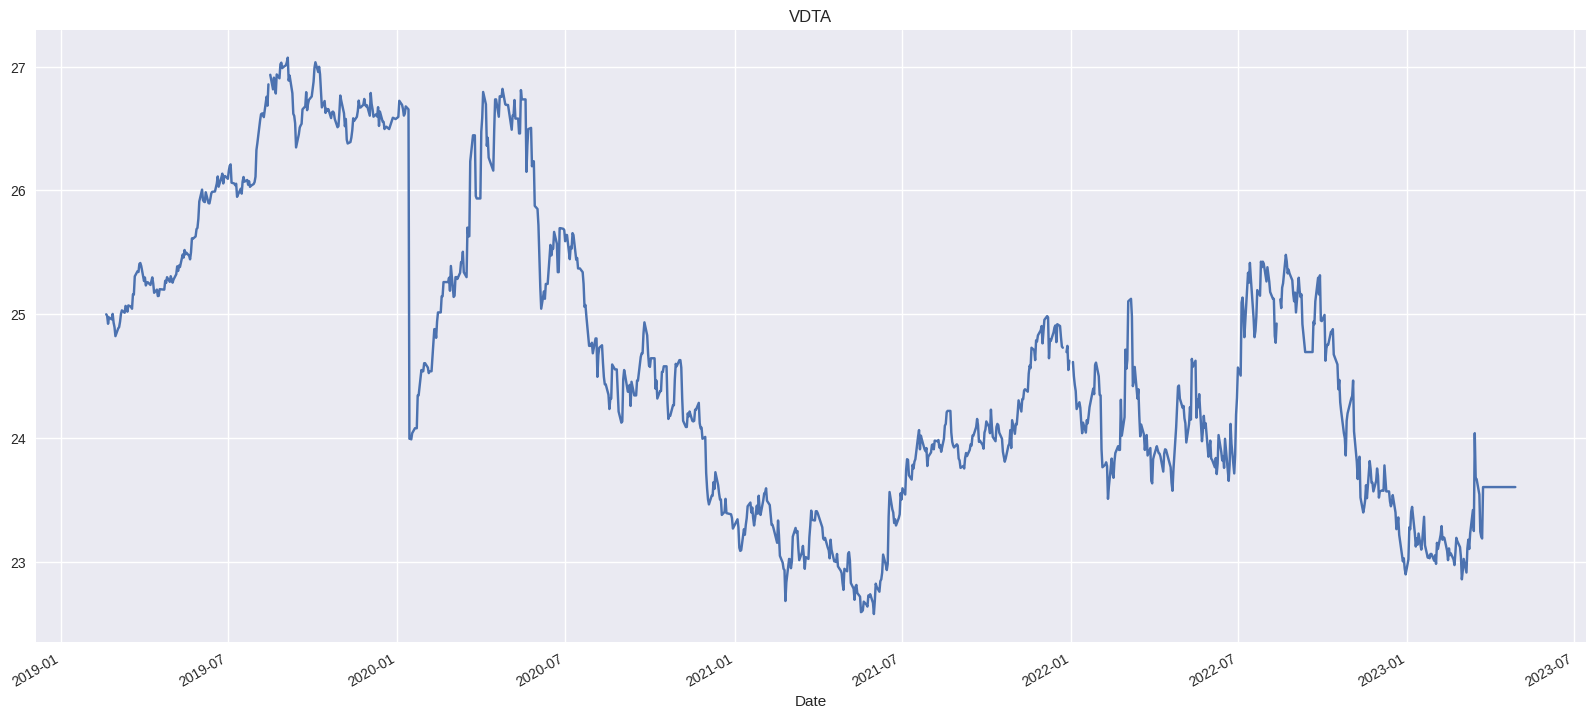

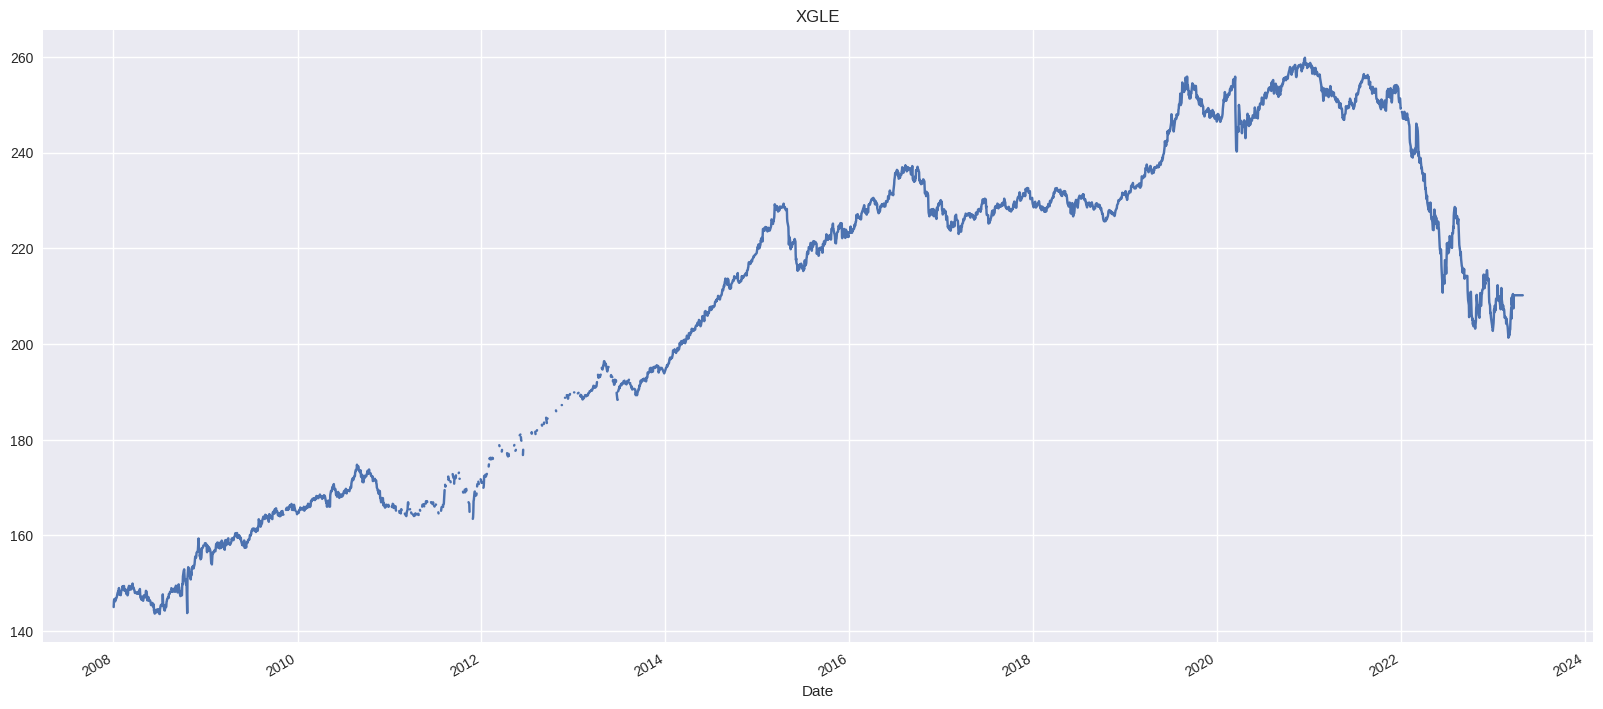

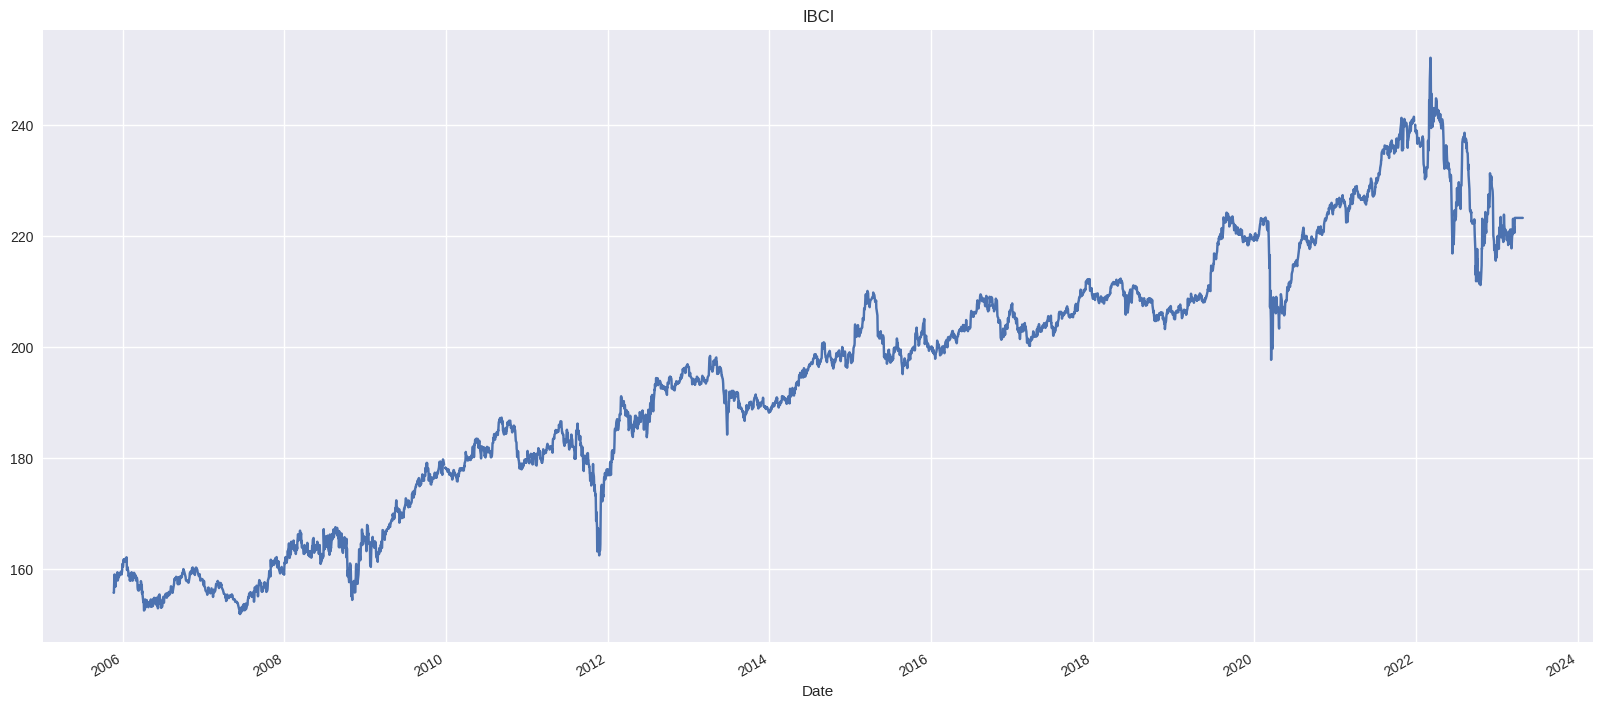

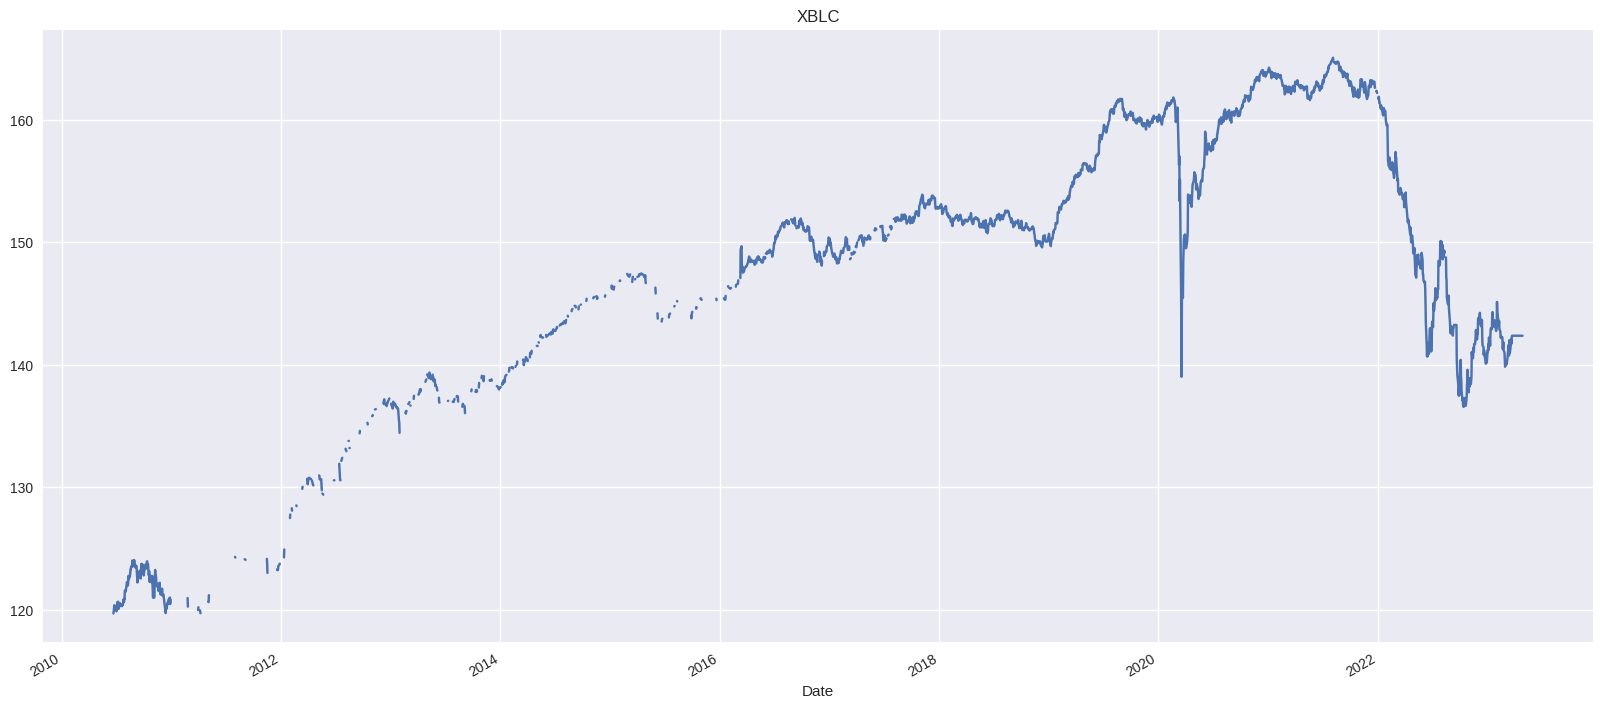

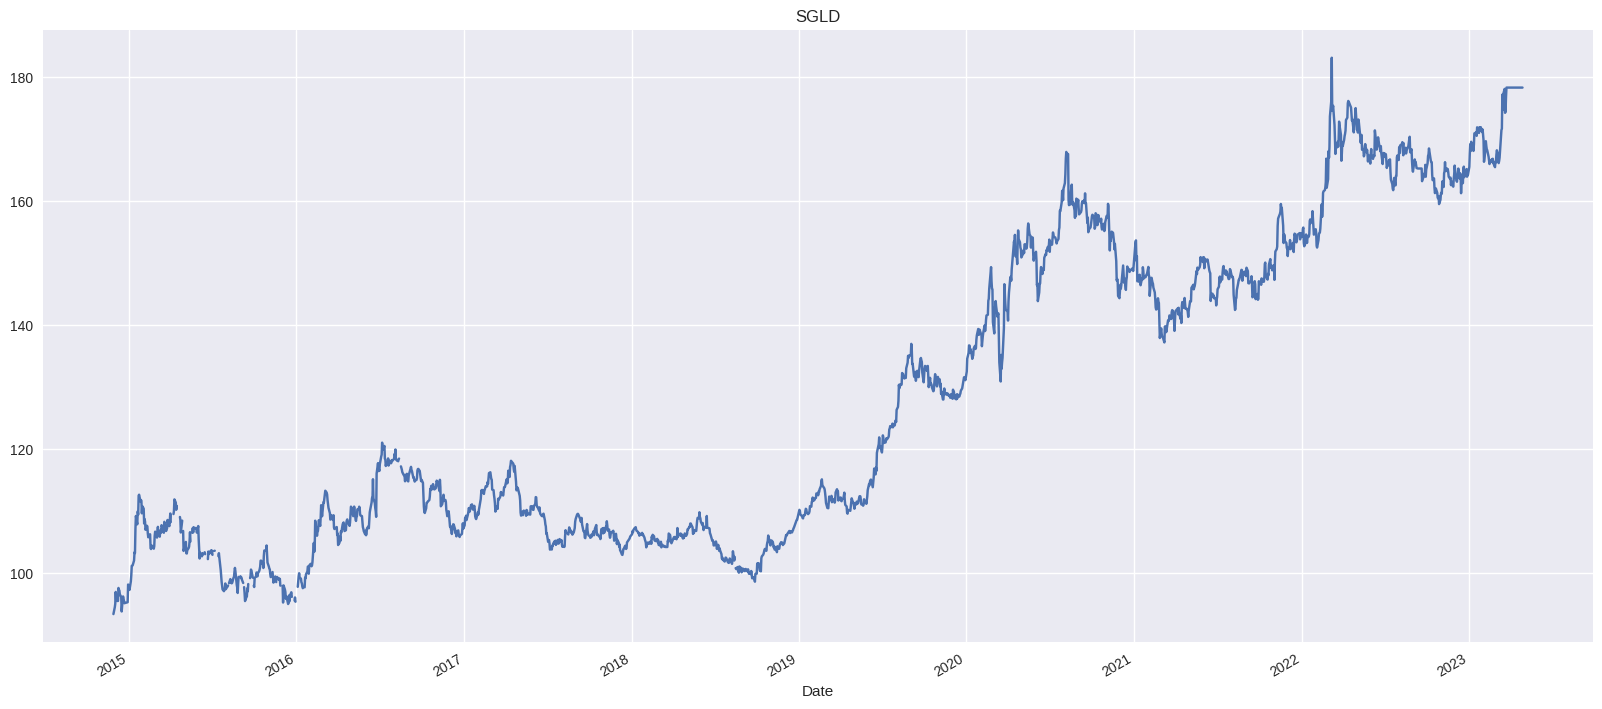

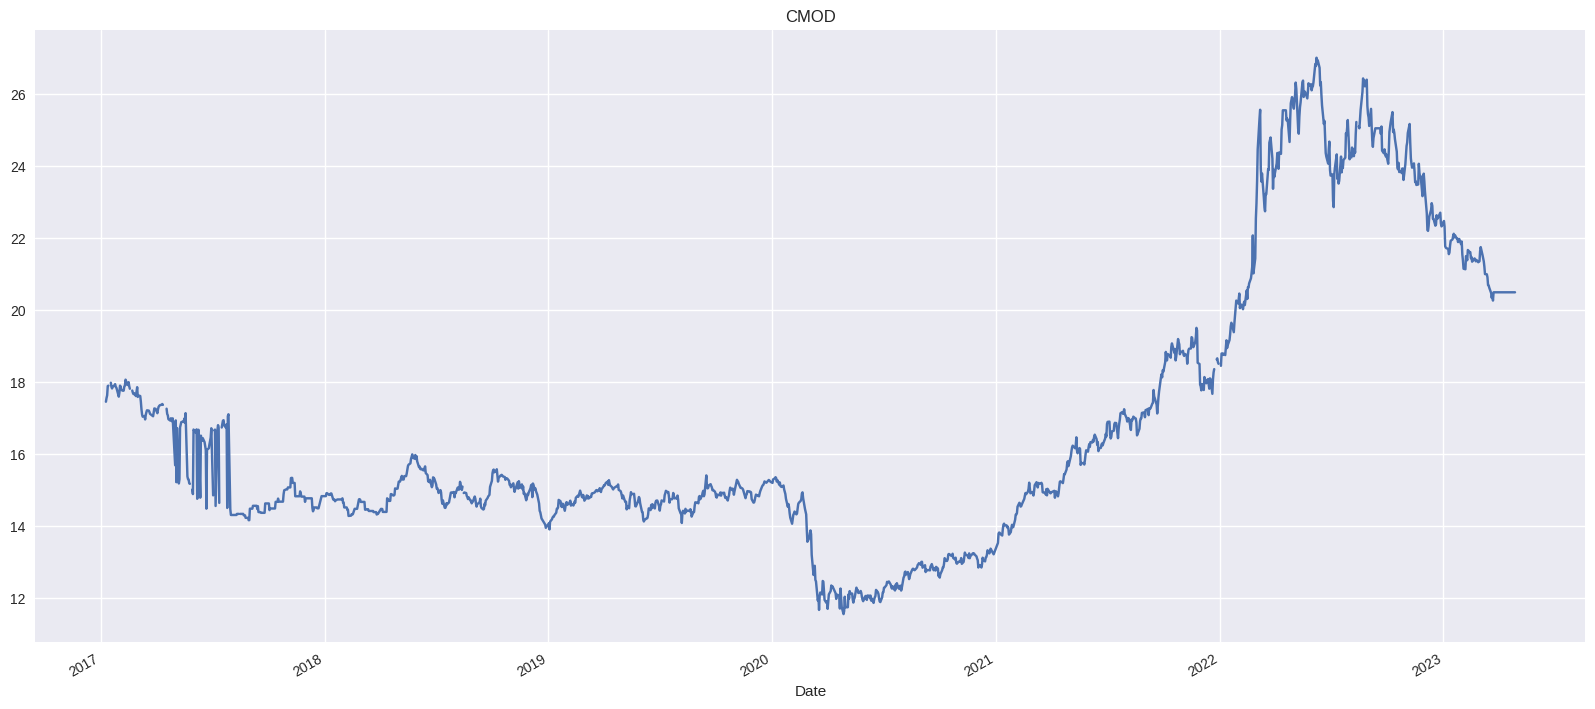

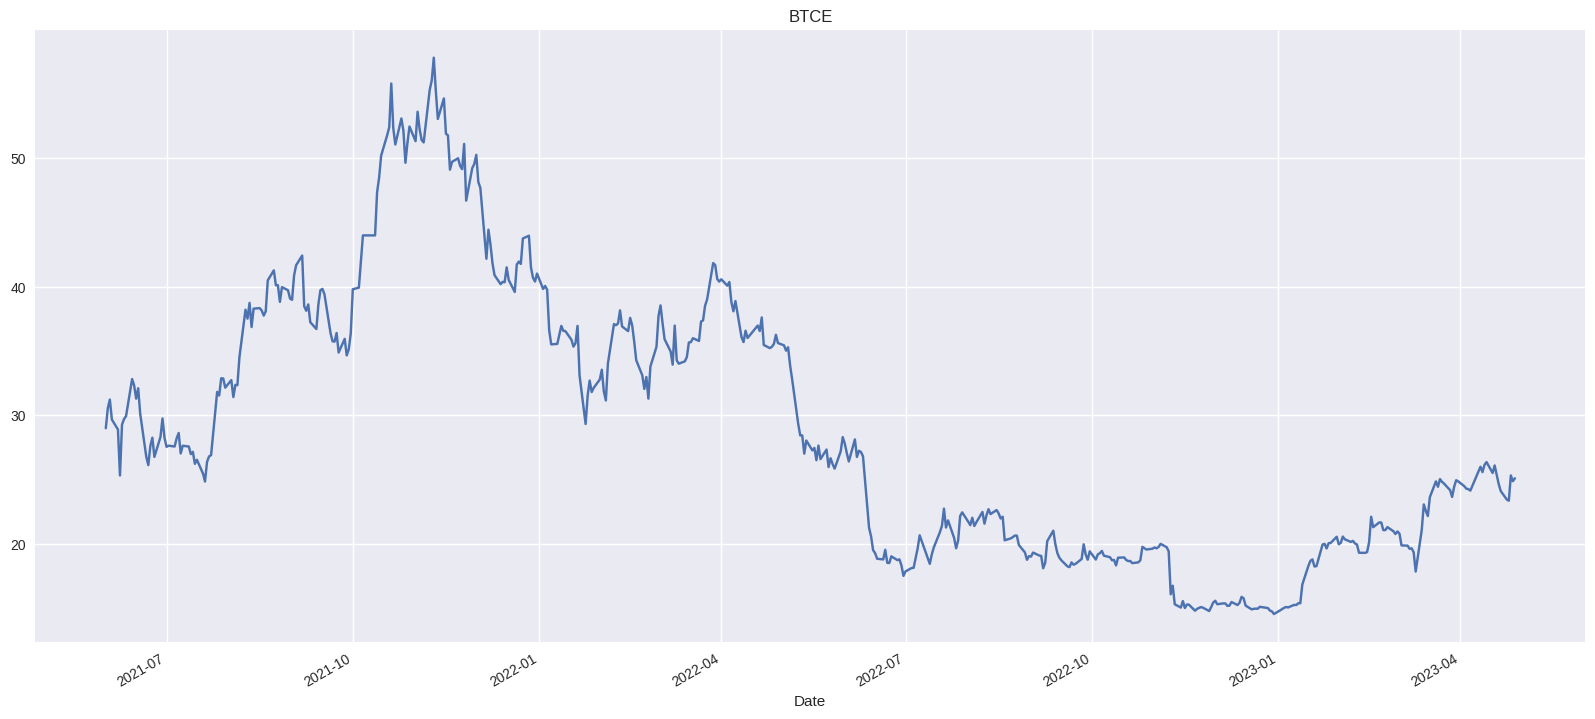

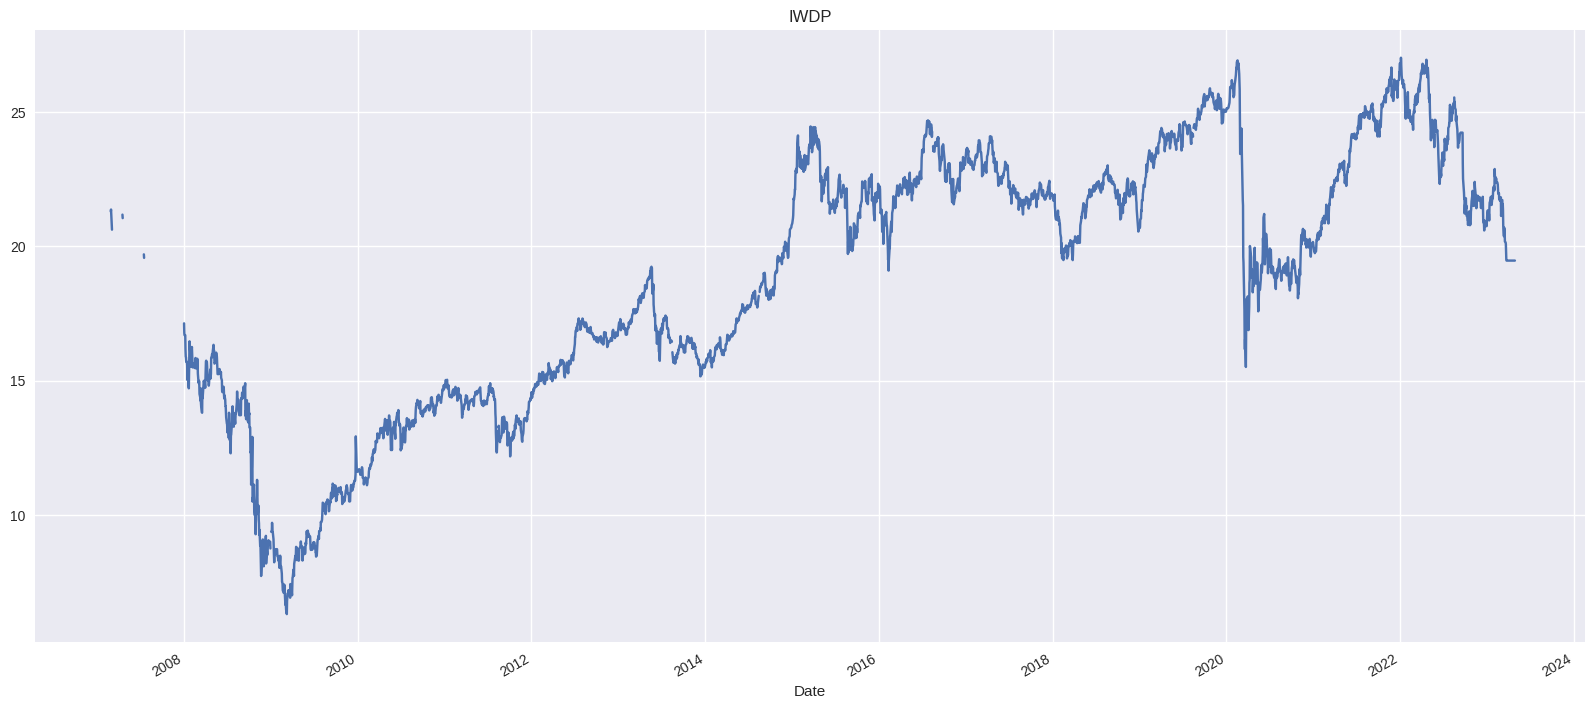

In [ ]:
for c in dati.columns:
  plt.figure()
  plt.title(c)
  dati[c].plot(figsize=(20,9))
  plt.show()

36BZ -> da 6-2018

EXSA -> da 1-2013

CMOD -> da 9-2017



In [ ]:
if "36BZ" in dati.columns:
  dati["36BZ"].loc[:pd.to_datetime("2018-06-01")]=np.nan
if "EXSA" in dati.columns:
  dati["EXSA"].loc[:pd.to_datetime("2013-01-01")]=np.nan
if "CMOD" in dati.columns:
  dati["CMOD"].loc[:pd.to_datetime("2017-09-01")]=np.nan

In [ ]:
# riempio i missing di al massimo una settimana
dati.ffill(limit=5,inplace=True)

In [ ]:
rendimenti = dati.pct_change(1)
(rendimenti.mean()+1)**253-1

INAA    0.102462
EXSA    0.054419
EMXC    0.049477
36BZ    0.073135
VDTA   -0.008955
XGLE    0.025719
IBCI    0.023434
XBLC    0.014404
SGLD    0.088349
CMOD    0.075995
BTCE    0.139308
IWDP    0.015668
dtype: float64

<Axes: >

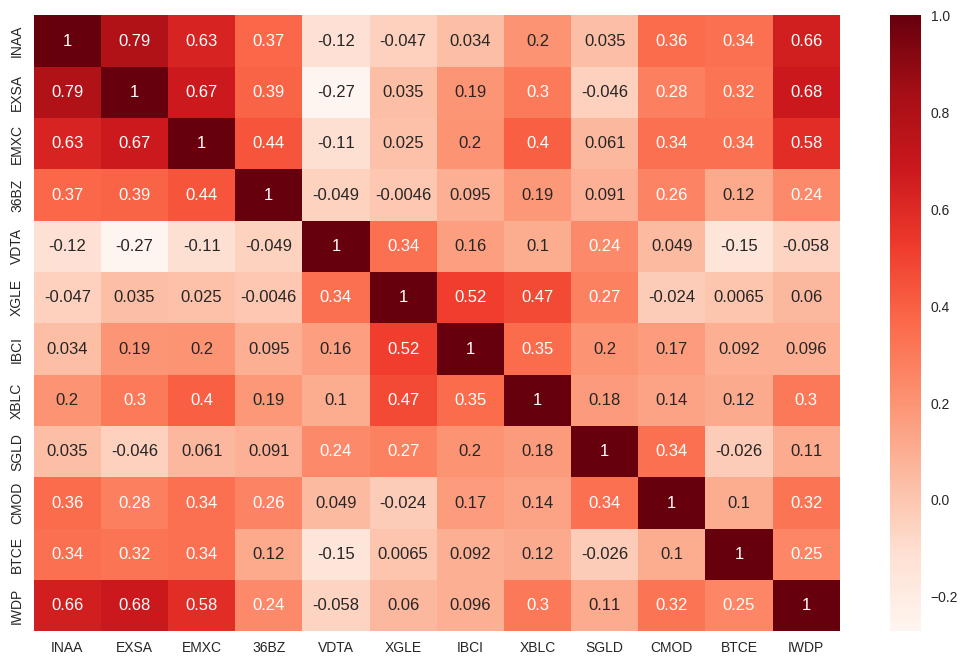

In [ ]:
plt.figure(figsize=(13,8))
#seaborn.set(font_scale=1.2)
seaborn.heatmap(rendimenti.corr(),cmap="Reds", annot=True, annot_kws={"size":12})

In [ ]:
# se io volessi analizzare tutti i portafogli equally weighted di N etf, quanti casi dovrei analizzare?
x=np.math.factorial(len(dati.columns))
for i in range(2,len(dati.columns)):
  print(i,x/np.math.factorial(len(dati.columns)-i))

2 132.0
3 1320.0
4 11880.0
5 95040.0
6 665280.0
7 3991680.0
8 19958400.0
9 79833600.0
10 239500800.0
11 479001600.0


In [ ]:
quante=10000
cov = rendimenti.cov()*100*253
medie = ((rendimenti.mean()+1)**253-1)*100
tabella = pd.DataFrame(columns=["rendimento","varianza","quasi Sharpe"]+nomi)
tabella1 = pd.DataFrame(columns=["rendimento","varianza","quasi Sharpe"]+nomi)
for k in range(len(dati.columns)):
  w = np.zeros(len(dati.columns))
  w[k]=1.00
  w = w/sum(w)
  rend = np.dot(medie,w)
  vol = np.dot(w,np.dot(cov,w))
  tabella1.loc[k]=[rend,vol,rend/vol]+list(w*100)
for k in range(quante):
#  w = np.random.random(len(dati.columns))
  w=np.random.normal(1,0.2,len(dati.columns))
  w[w>1]=w[w>1]-1
  w = w/sum(w)
  rend = np.dot(medie,w)
  vol = np.dot(w,np.dot(cov,w))
  tabella.loc[k]=[rend,vol,rend/vol]+list(w*100)
  if k%1000==0:
    print(k)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


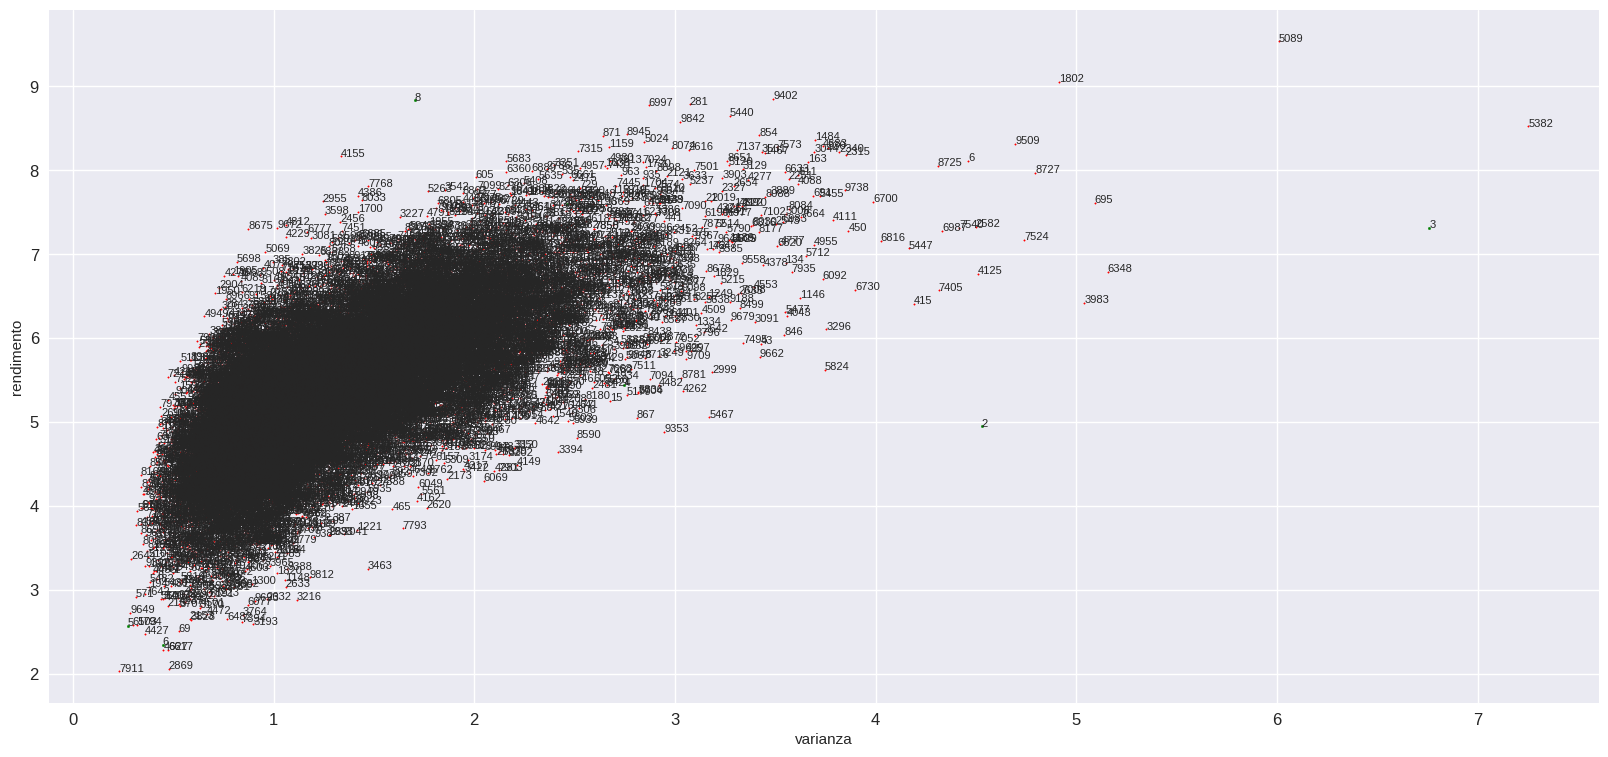

In [ ]:
ax = tabella.plot.scatter(x="varianza",y="rendimento", figsize=(20,9),fontsize=12,s=1,color="r")
axes = plt.gca()
x=axes.get_xlim()
y=axes.get_ylim()
tabella1.plot.scatter(ax=ax,x="varianza",y="rendimento", figsize=(20,9),fontsize=12,s=3,color="g",xlim=x,ylim=y)
for i in tabella.index:
    plt.annotate(i,xy=(tabella.loc[i,"varianza"],tabella.loc[i,"rendimento"]),size=8)
for i in tabella1.index:
    plt.annotate(i,xy=(tabella1.loc[i,"varianza"],tabella1.loc[i,"rendimento"]),size=8)

In [ ]:
tabella1

rendimento   varianza  quasi Sharpe  iShares MSCI North America  \
0    10.246201   3.570461      2.869714                       100.0   
1     5.441864   2.743674      1.983422                         0.0   
2     4.947691   4.527517      1.092805                         0.0   
3     7.313501   6.758786      1.082073                         0.0   
4    -0.895534   0.898529     -0.996666                         0.0   
5     2.571863   0.275200      9.345439                         0.0   
6     2.343425   0.447658      5.234860                         0.0   
7     1.440367   0.182879      7.876065                         0.0   
8     8.834892   1.702841      5.188325                         0.0   
9     7.599530   2.462479      3.086130                         0.0   
10   13.930785  40.814063      0.341323                         0.0   
11    1.566845   4.860725      0.322348                         0.0   

    iShares STOXX Europe 600  Lyxor MSCI Emerging Markets Ex China  \
0                        0.0                                   0.0   
1                      100.0                                   0.0   
2                        0.0                                 100.0   
3                        0.0                                   0.0   
4                        0.0                                   0.0   
5                        0.0                                   0.0   
6                        0.0                                   0.0   
7                        0.0                                   0.0   
8                        0.0                                   0.0   
9                        0.0                                   0.0   
10                       0.0                                   0.0   
11                       0.0                                   0.0   

    iShares MSCI China A  Vanguard USD Treasury Bond  \
0                    0.0                         0.0   
1                    0.0                         0.0   
2                    0.0                         0.0   
3                  100.0                         0.0   
4                    0.0                       100.0   
5                    0.0                         0.0   
6                    0.0                         0.0   
7                    0.0                         0.0   
8                    0.0                         0.0   
9                    0.0                         0.0   
10                   0.0                         0.0   
11                   0.0                         0.0   

    Xtrackers Eurozone Government Bond  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   
5                                100.0   
6                                  0.0   
7                                  0.0   
8                                  0.0   
9                                  0.0   
10                                 0.0   
11                                 0.0   

    iShares Euro Inflation Linked Government Bond  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   
5                                             0.0   
6                                           100.0   
7                                             0.0   
8                                             0.0   
9                                             0.0   
10                                            0.0   
11                                            0.0   

    Xtrackers II EUR Corporate Bond  Invesco Physical Gold  \
0                               0.0                    0.0   
1                               0.0                    0.0   
2                

In [ ]:
tabella1.loc[8228]

rendimento                                        5.006134
varianza                                          1.434859
quasi Sharpe                                      3.488939
iShares MSCI North America                        0.514144
iShares STOXX Europe 600                         12.121582
Lyxor MSCI Emerging Markets Ex China             11.702362
iShares MSCI China A                              9.041540
Vanguard USD Treasury Bond                       10.260111
Xtrackers Eurozone Government Bond                8.124113
iShares Euro Inflation Linked Government Bond     2.843029
Xtrackers II EUR Corporate Bond                  11.123618
Invesco Physical Gold                             8.771335
Invesco Bloomberg Commodity                       2.784052
ETC Group Physical Bitcoin                       11.058390
iShares Developed Markets Property Yield         11.655724
Name: 8228, dtype: float64

In [ ]:
tabella1["rendimento"].idxmax(),tabella1.loc[tabella1["rendimento"].idxmax()]

(5089,
 rendimento                                        9.538629
 varianza                                          6.006770
 quasi Sharpe                                      1.587980
 iShares MSCI North America                       33.595480
 iShares STOXX Europe 600                          0.919884
 Lyxor MSCI Emerging Markets Ex China              3.989048
 iShares MSCI China A                              8.227579
 Vanguard USD Treasury Bond                        1.687439
 Xtrackers Eurozone Government Bond                9.389843
 iShares Euro Inflation Linked Government Bond     2.969687
 Xtrackers II EUR Corporate Bond                   1.222634
 Invesco Physical Gold                             3.510737
 Invesco Bloomberg Commodity                       1.213824
 ETC Group Physical Bitcoin                       32.431976
 iShares Developed Markets Property Yield          0.841868
 Name: 5089, dtype: float64)

In [ ]:
tabella1["varianza"].idxmin(),tabella1.loc[tabella1["varianza"].idxmin()]

(7911,
 rendimento                                        2.030392
 varianza                                          0.230638
 quasi Sharpe                                      8.803391
 iShares MSCI North America                        0.518894
 iShares STOXX Europe 600                          3.153276
 Lyxor MSCI Emerging Markets Ex China              4.535674
 iShares MSCI China A                              1.307212
 Vanguard USD Treasury Bond                       25.377101
 Xtrackers Eurozone Government Bond               12.110344
 iShares Euro Inflation Linked Government Bond    23.389766
 Xtrackers II EUR Corporate Bond                  24.271878
 Invesco Physical Gold                             4.264744
 Invesco Bloomberg Commodity                       0.015341
 ETC Group Physical Bitcoin                        0.883165
 iShares Developed Markets Property Yield          0.172605
 Name: 7911, dtype: float64)

In [ ]:
tabella1["quasi Sharpe"].idxmax(),tabella1.loc[tabella1["quasi Sharpe"].idxmax()]

(8166,
 rendimento                                        4.369413
 varianza                                          0.339143
 quasi Sharpe                                     12.883702
 iShares MSCI North America                       15.632112
 iShares STOXX Europe 600                          3.475376
 Lyxor MSCI Emerging Markets Ex China              0.434260
 iShares MSCI China A                              0.017458
 Vanguard USD Treasury Bond                       13.849688
 Xtrackers Eurozone Government Bond               15.500508
 iShares Euro Inflation Linked Government Bond    13.035327
 Xtrackers II EUR Corporate Bond                  16.555695
 Invesco Physical Gold                            12.979743
 Invesco Bloomberg Commodity                       5.586361
 ETC Group Physical Bitcoin                        0.970739
 iShares Developed Markets Property Yield          1.962734
 Name: 8166, dtype: float64)

# Cose che non servono vanno qui sotto